In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import missingno

In [2]:
df = pd.read_csv("../data/application_data.csv")
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [3]:
data_descriptions = pd.read_csv("../data/columns_description.csv", encoding='latin1')
data_descriptions.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [4]:
my_vars = pd.read_csv("../data/my_vars.csv")
my_vars_vec = my_vars['Row'].to_list()

In [5]:
my_df = df[my_vars_vec].copy()
my_df.head()

AMT_ANNUITY  AMT_GOODS_PRICE  OWN_CAR_AGE  CNT_FAM_MEMBERS  EXT_SOURCE_1  \
0      24700.5         351000.0          NaN              1.0      0.083037   
1      35698.5        1129500.0          NaN              2.0      0.311267   
2       6750.0         135000.0         26.0              1.0           NaN   
3      29686.5         297000.0          NaN              2.0           NaN   
4      21865.5         513000.0          NaN              1.0           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247            0.0369   
1      0.622246           NaN          0.0959            0.0529   
2      0.555912      0.729567             NaN               NaN   
3      0.650442           NaN             NaN               NaN   
4      0.322738           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  
0           0.00         0.0690         0.0833  
1           0.08         0.0345         0.2917  
2            NaN            NaN            NaN  
3            NaN            NaN            NaN  
4            NaN            NaN            NaN

In [6]:
aux = my_vars[my_vars['Category'] == 1]
my_vars_vec = aux['Row'].to_list()
first_df = df[my_vars_vec].copy()
aux = my_vars[my_vars['Category'] == 2]
my_vars_vec = aux['Row'].to_list()
second_df = df[my_vars_vec].copy()
aux = my_vars[my_vars['Category'] == 3]
my_vars_vec = aux['Row'].to_list()
third_df = df[my_vars_vec].copy()
aux = my_vars[my_vars['Category'] == 4]
my_vars_vec = aux['Row'].to_list()
fourth_df = df[my_vars_vec].copy()
aux = my_vars[my_vars['Category'] == 5]
my_vars_vec = aux['Row'].to_list()
fifth_df = df[my_vars_vec].copy()

<AxesSubplot: >

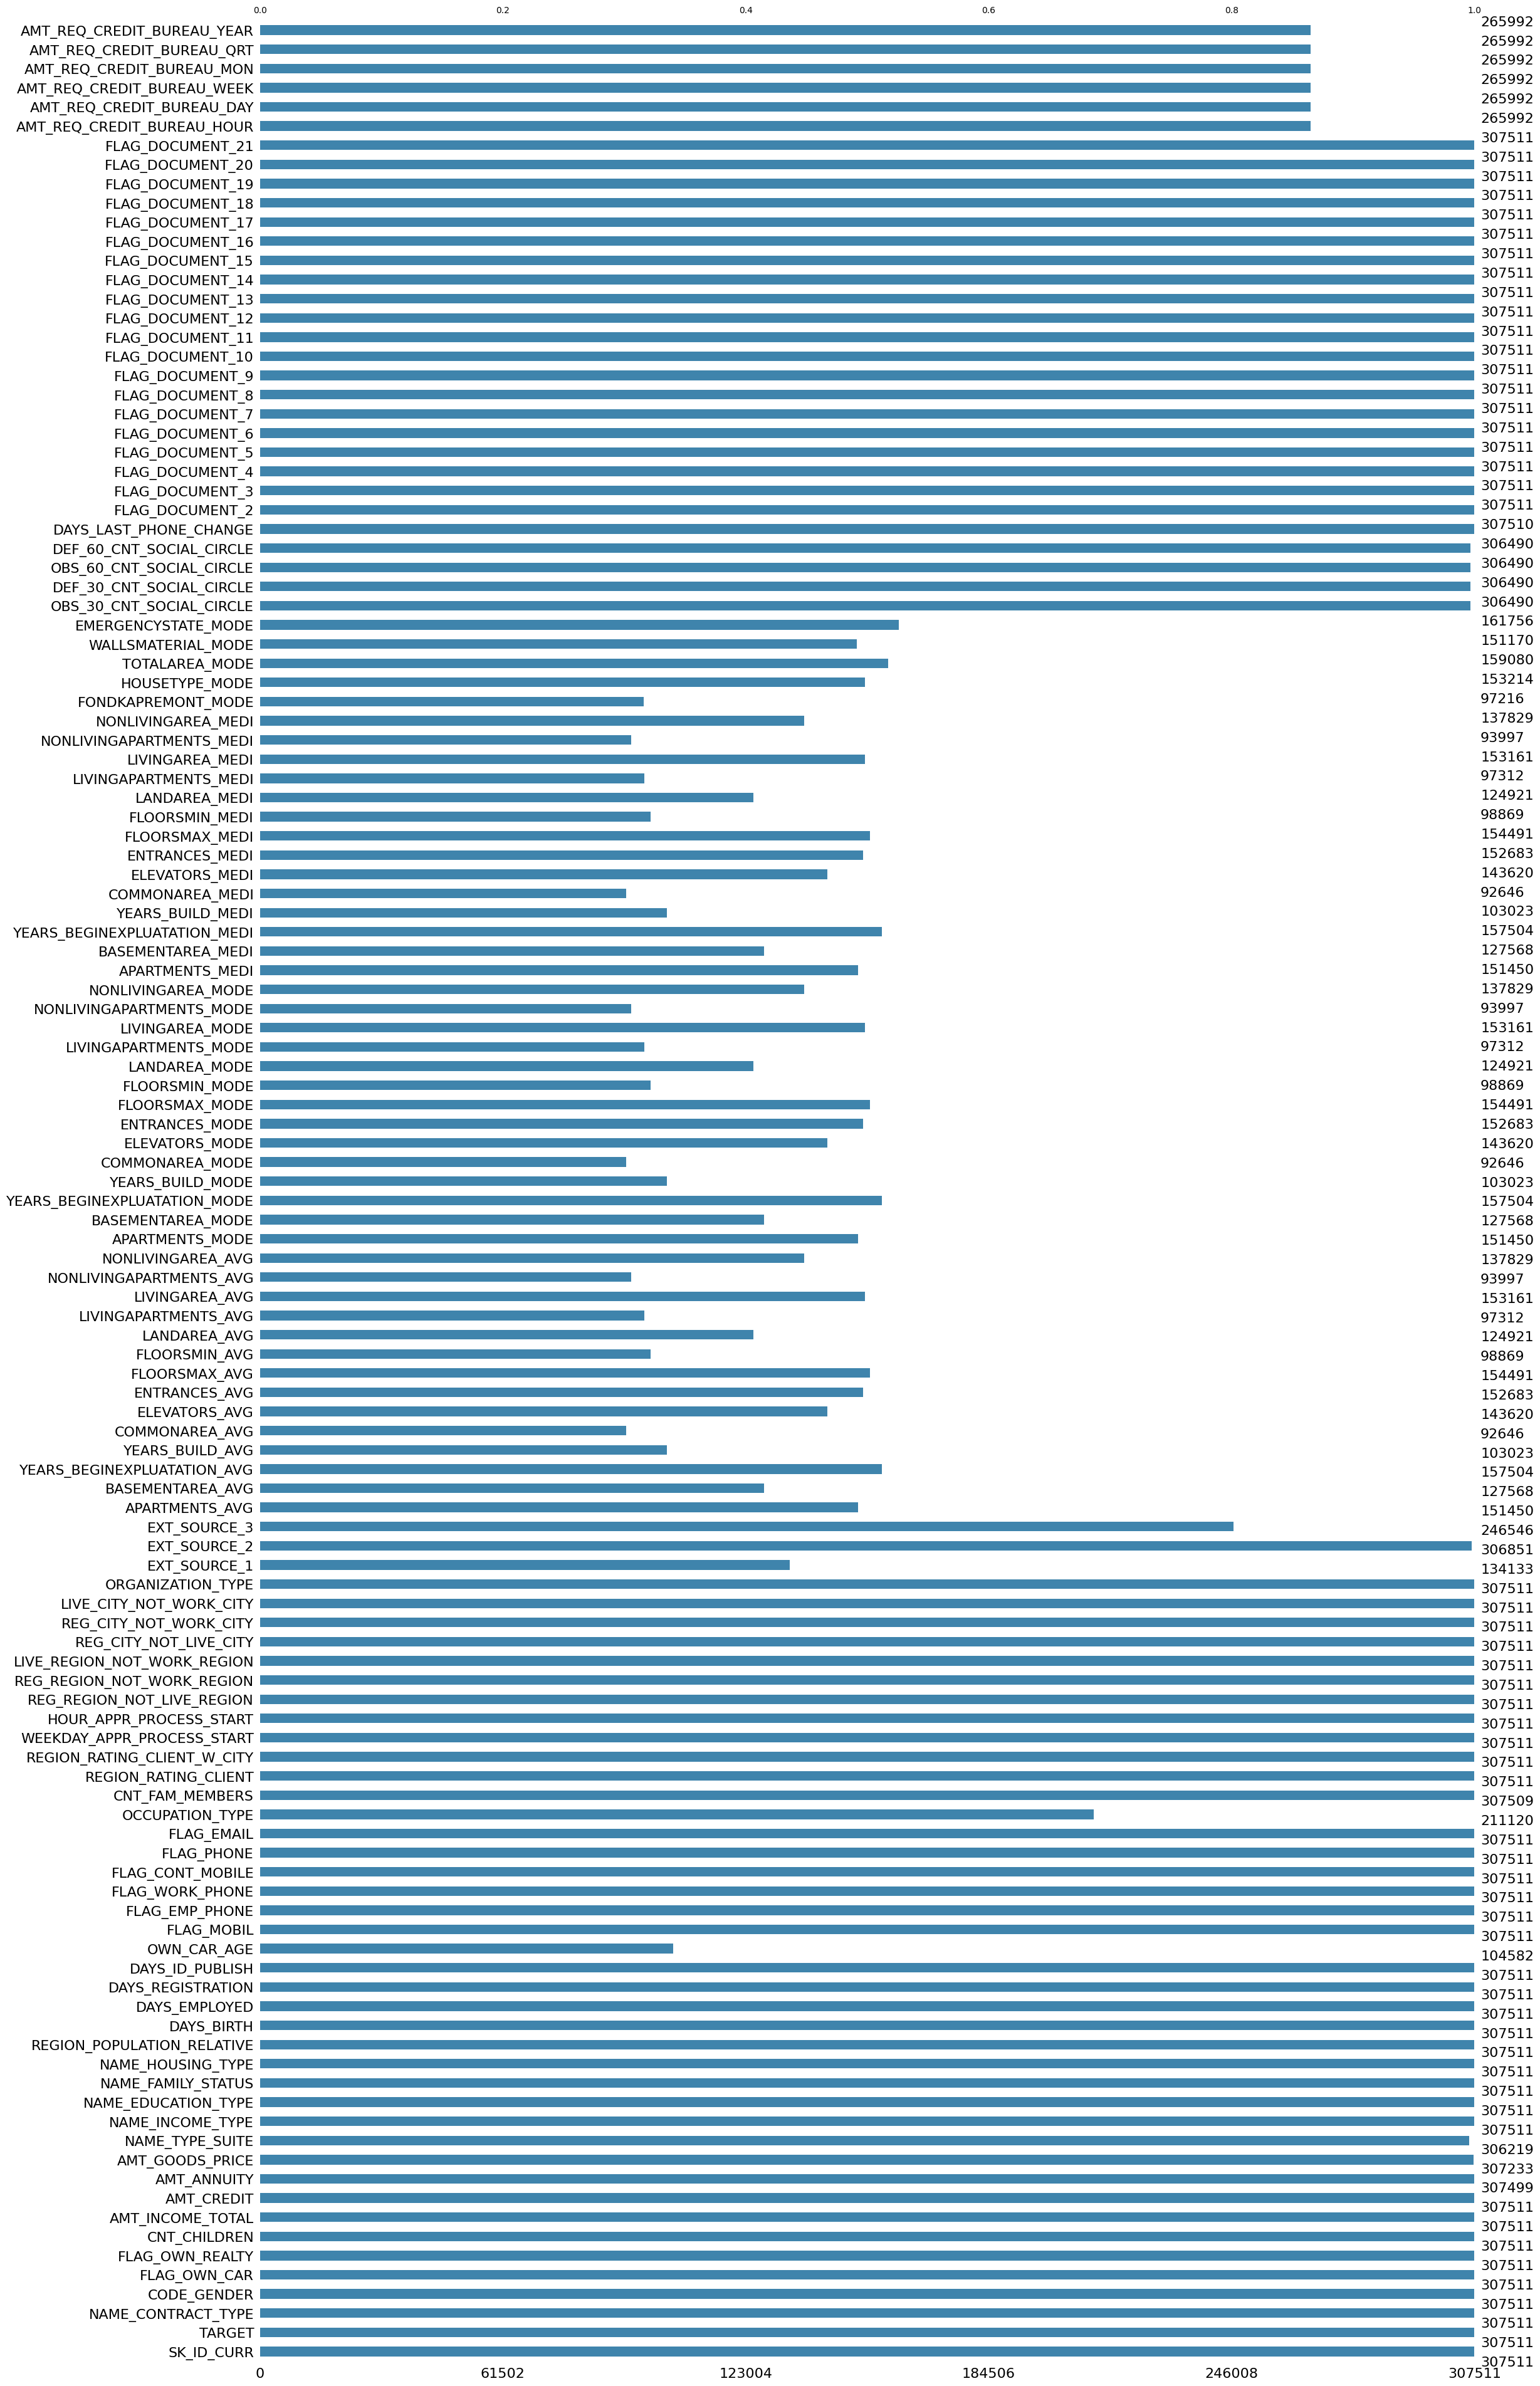

In [7]:
%matplotlib inline
missingno.bar(df, color=(63/255,132/255,172/255))

<AxesSubplot: >

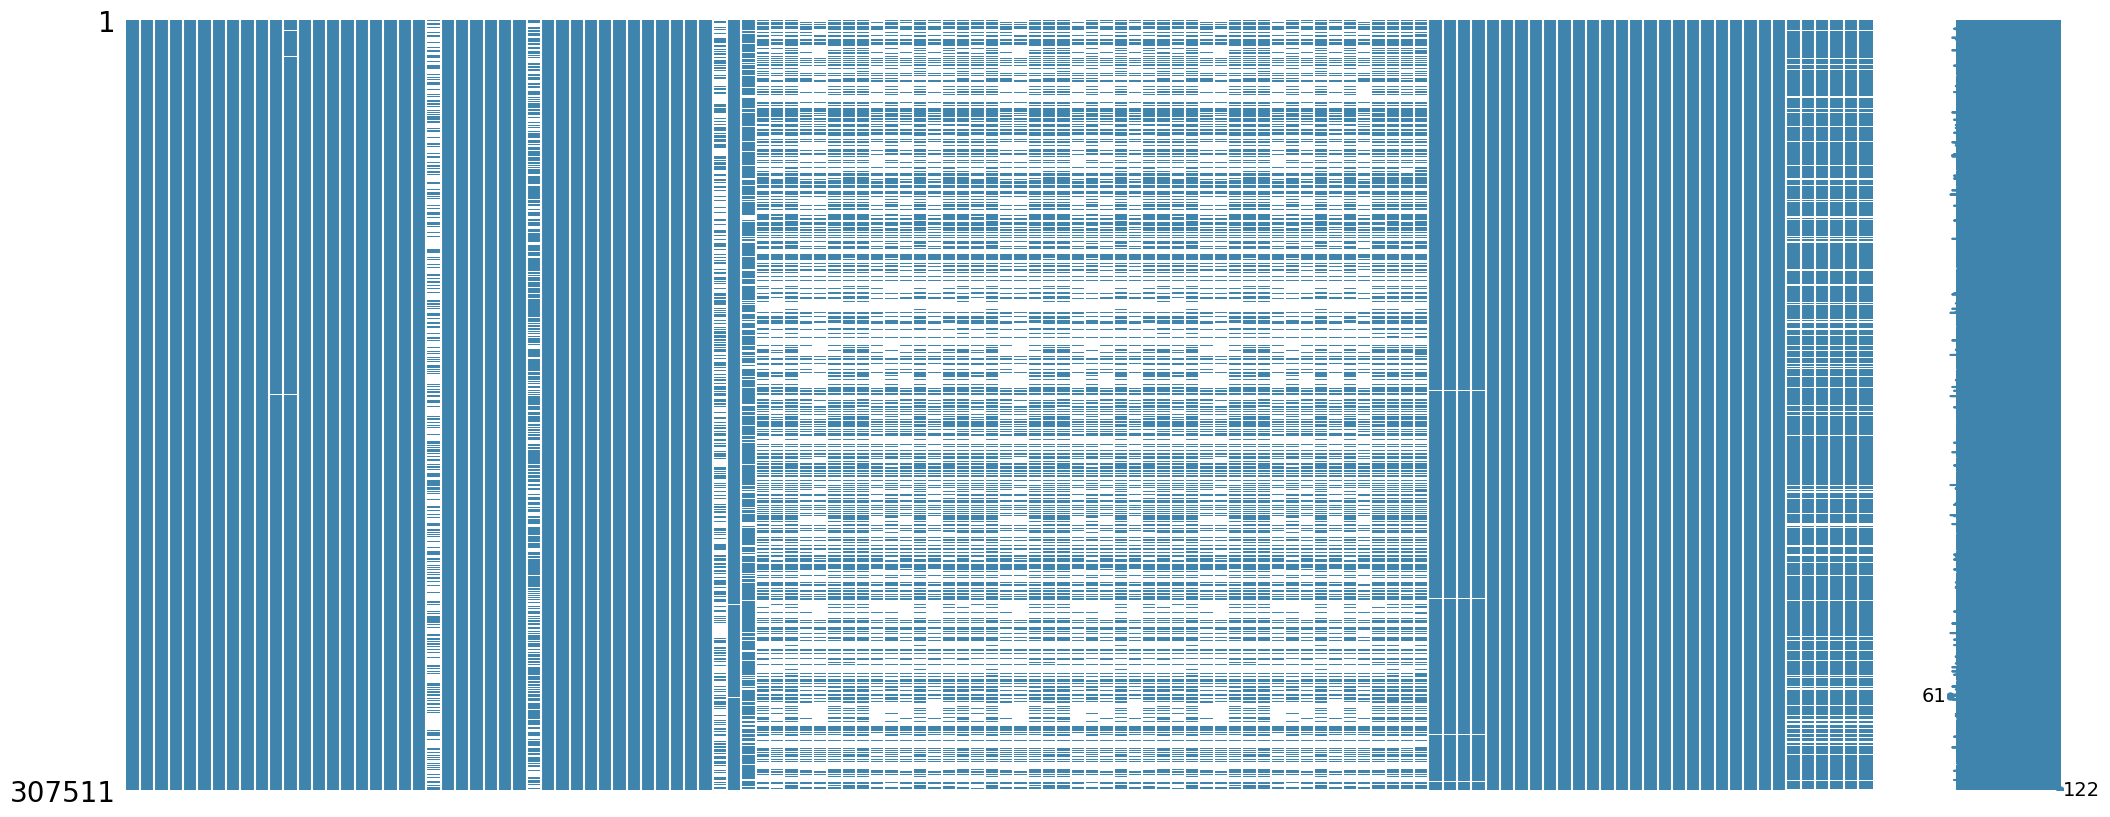

In [8]:
%matplotlib inline
missingno.matrix(df, color=(63/255,132/255,172/255))

<AxesSubplot: >

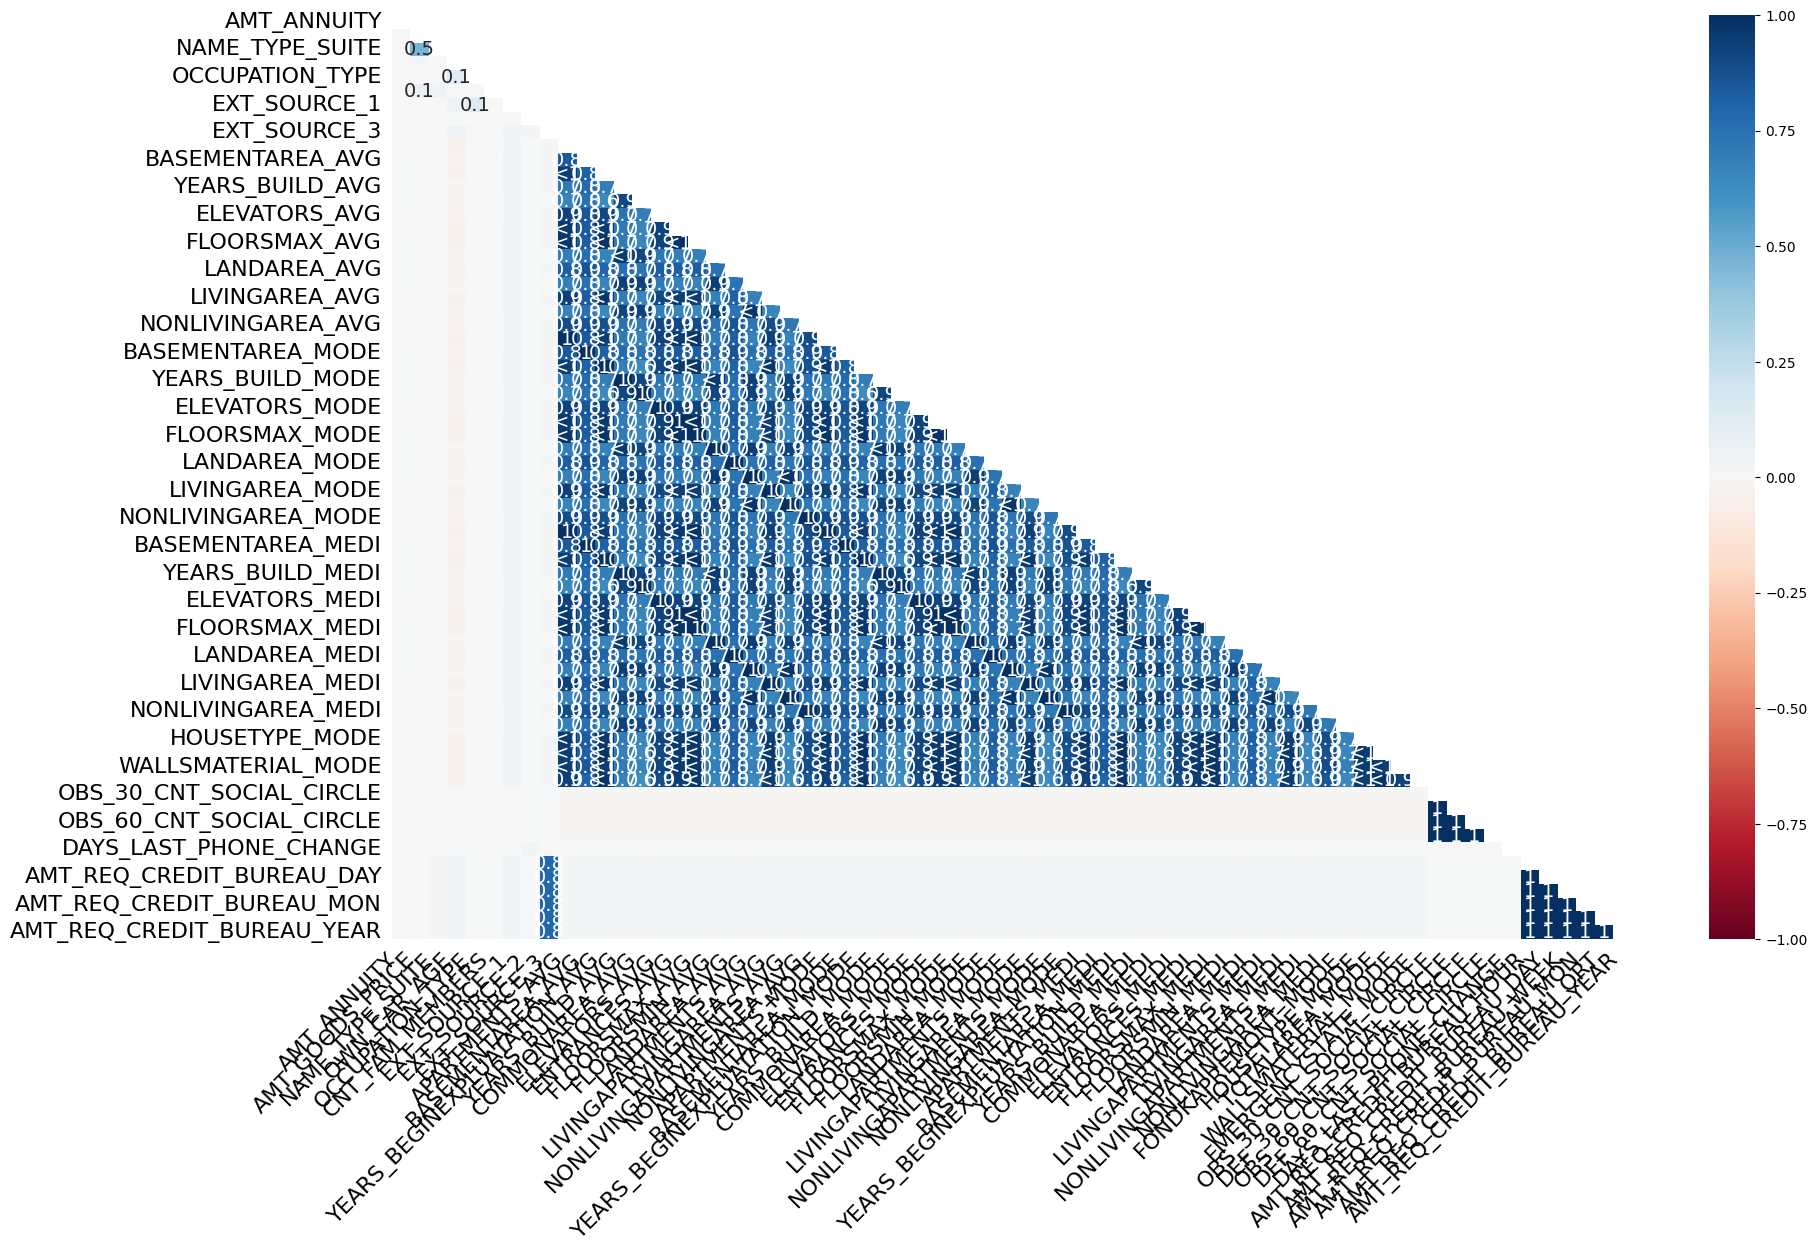

In [9]:
%matplotlib inline
missingno.heatmap(df)

<AxesSubplot: >

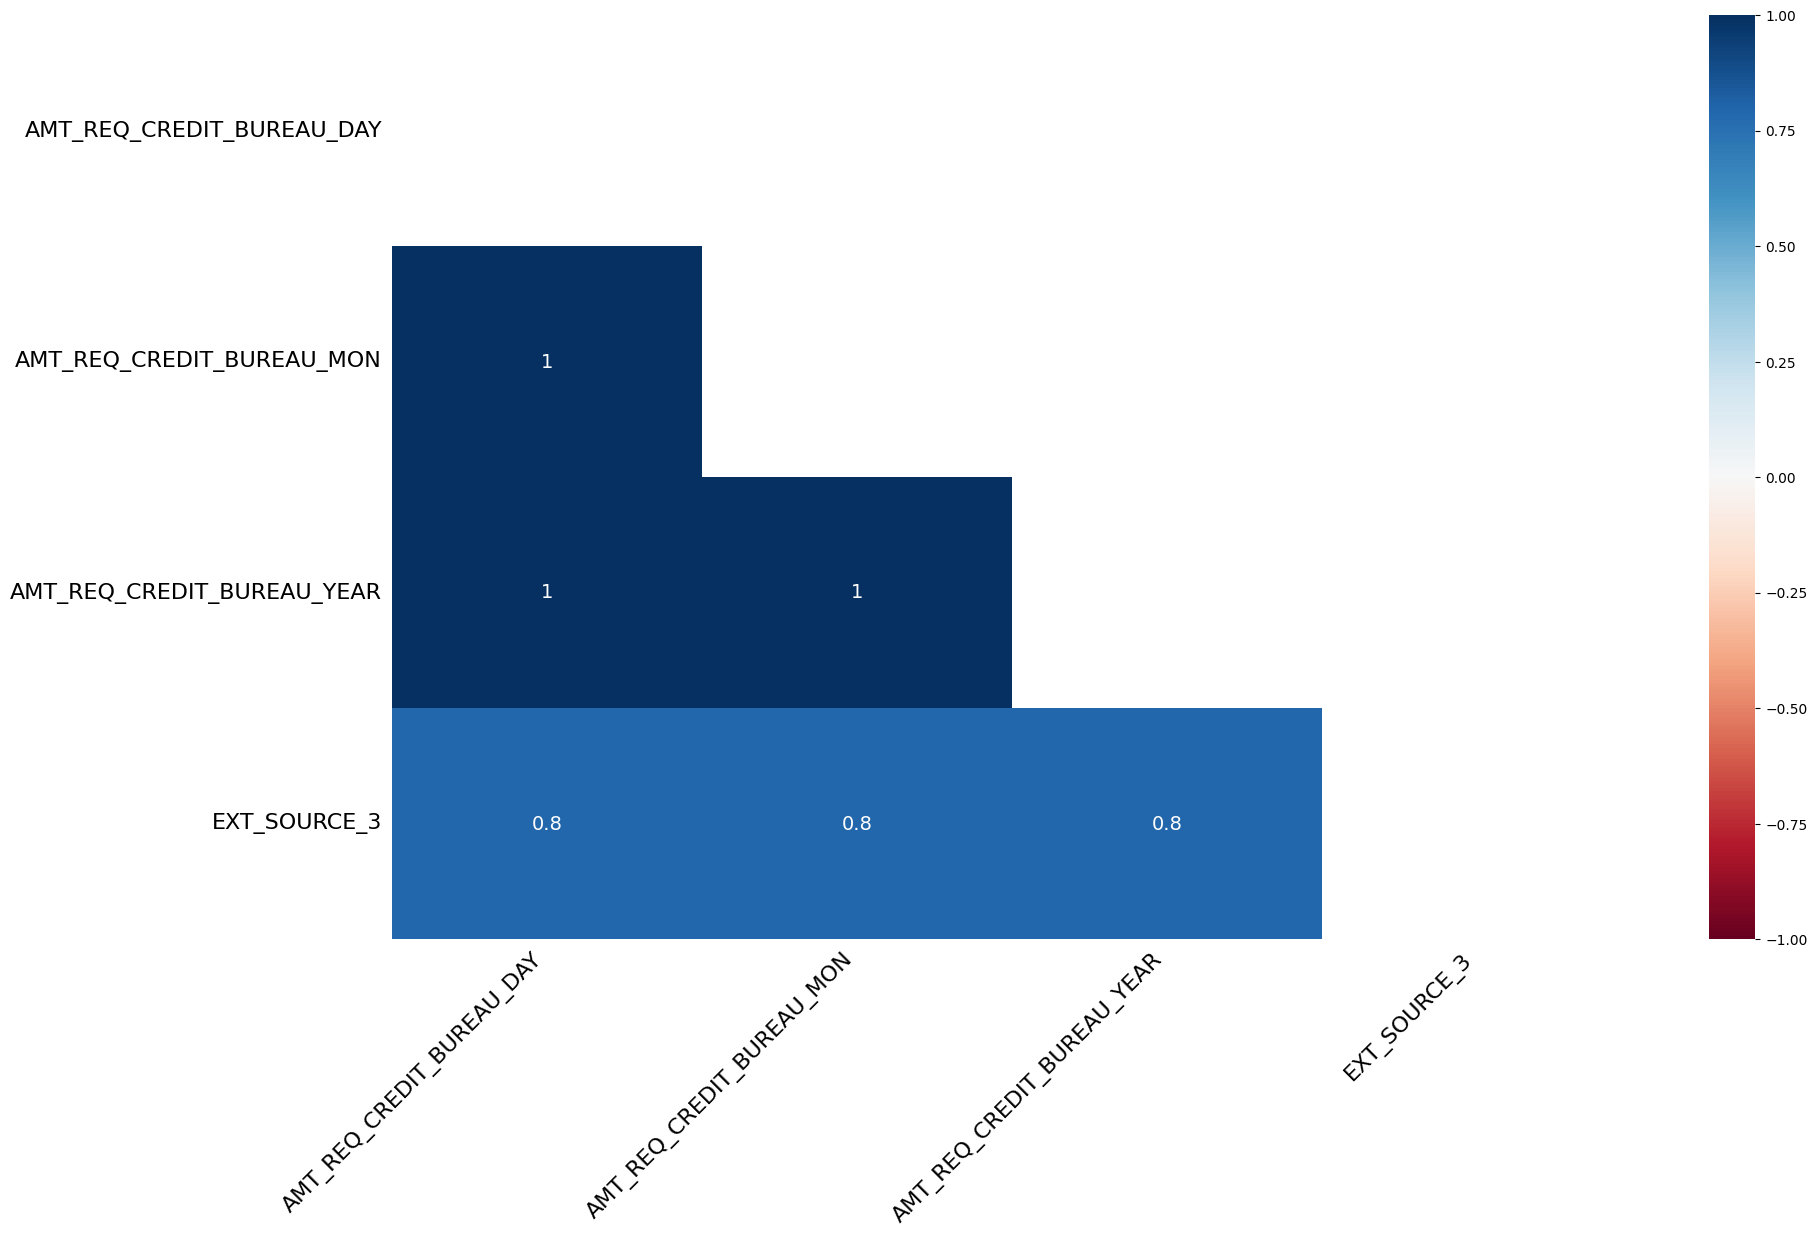

In [10]:
%matplotlib inline
missingno.heatmap(df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3']])

<AxesSubplot: >

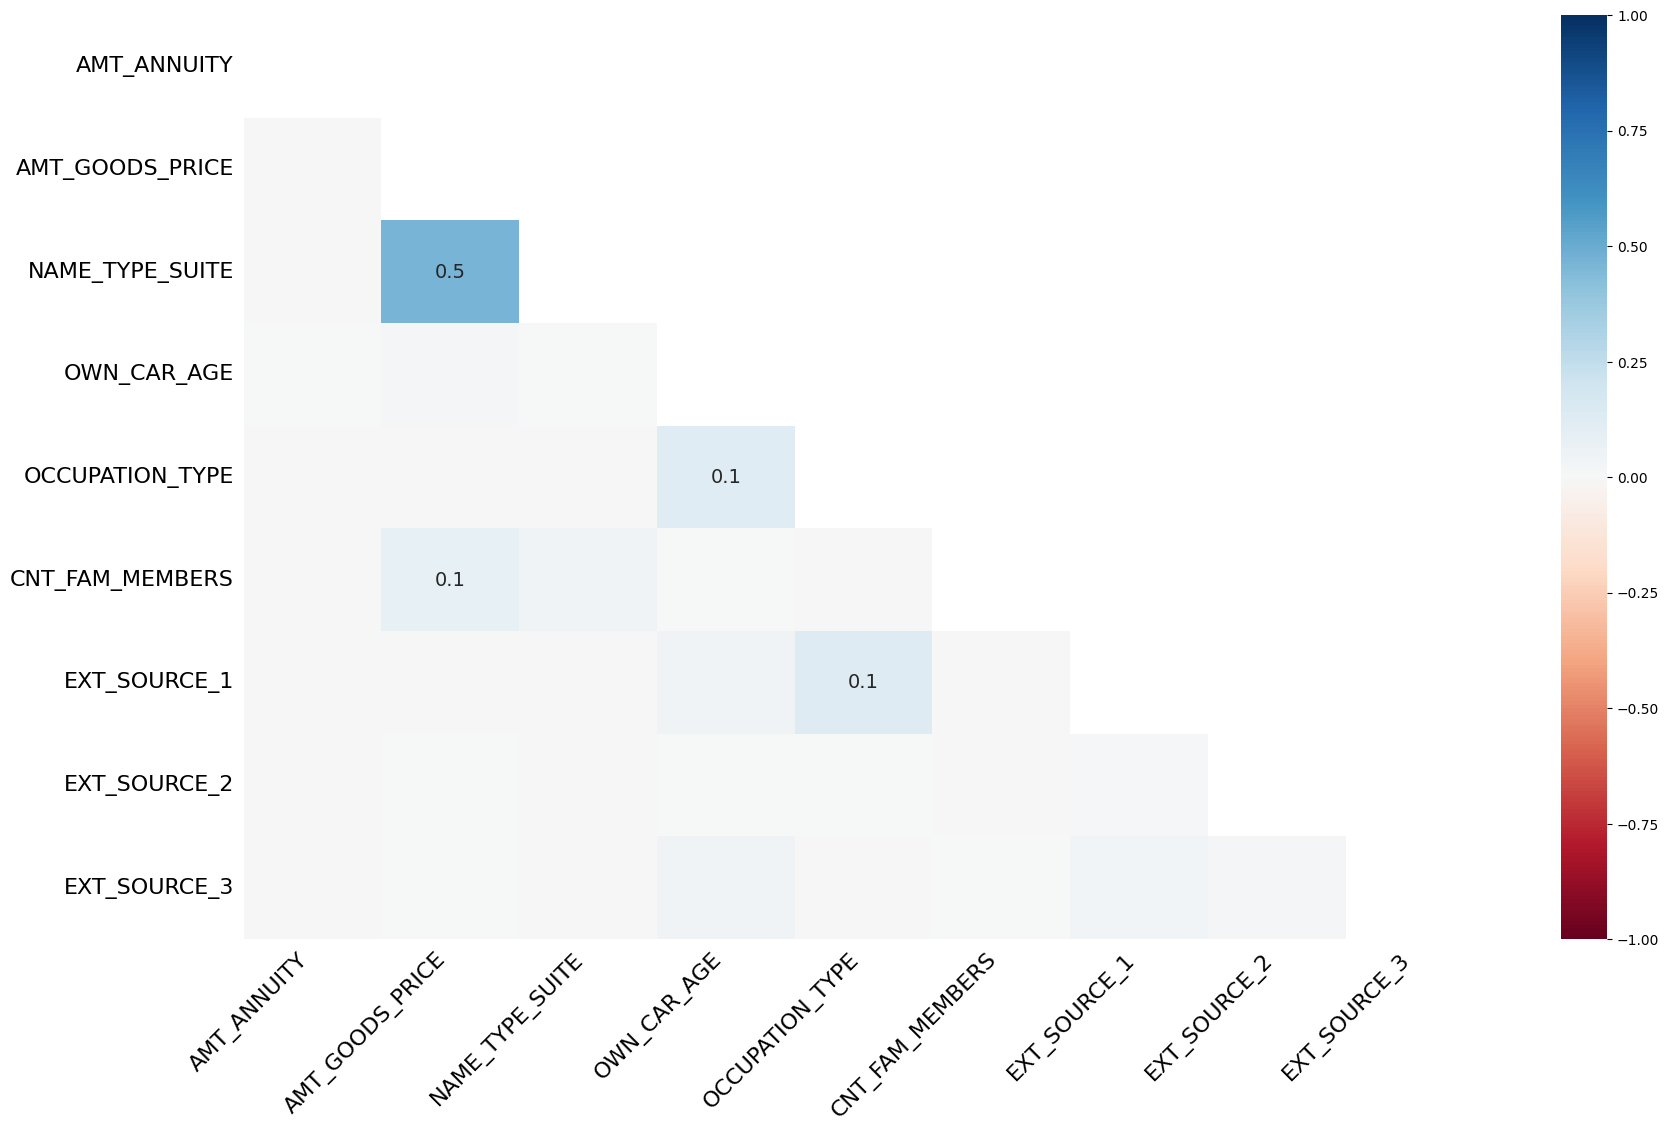

In [11]:
%matplotlib inline
missingno.heatmap(df[['AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','OWN_CAR_AGE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']])

<AxesSubplot: >

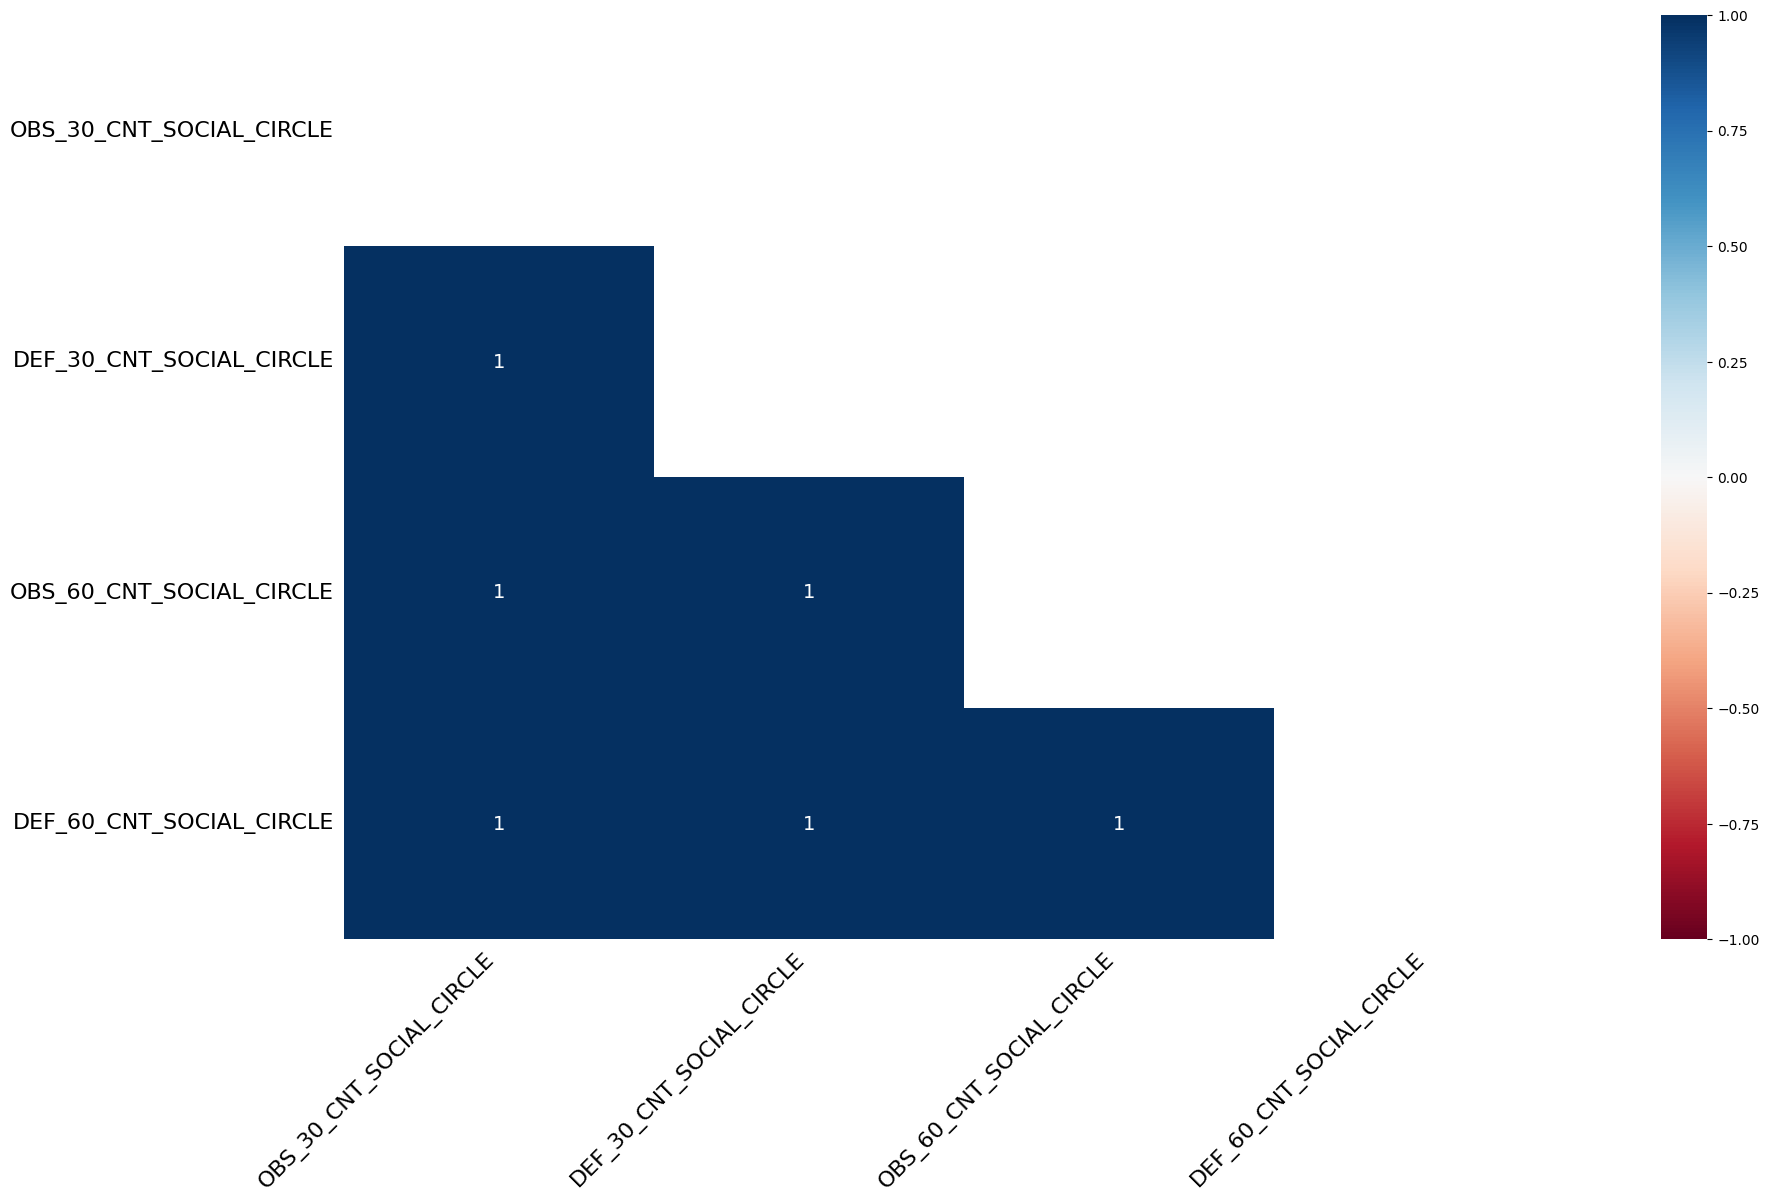

In [12]:
%matplotlib inline
missingno.heatmap(df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']])

<AxesSubplot: >

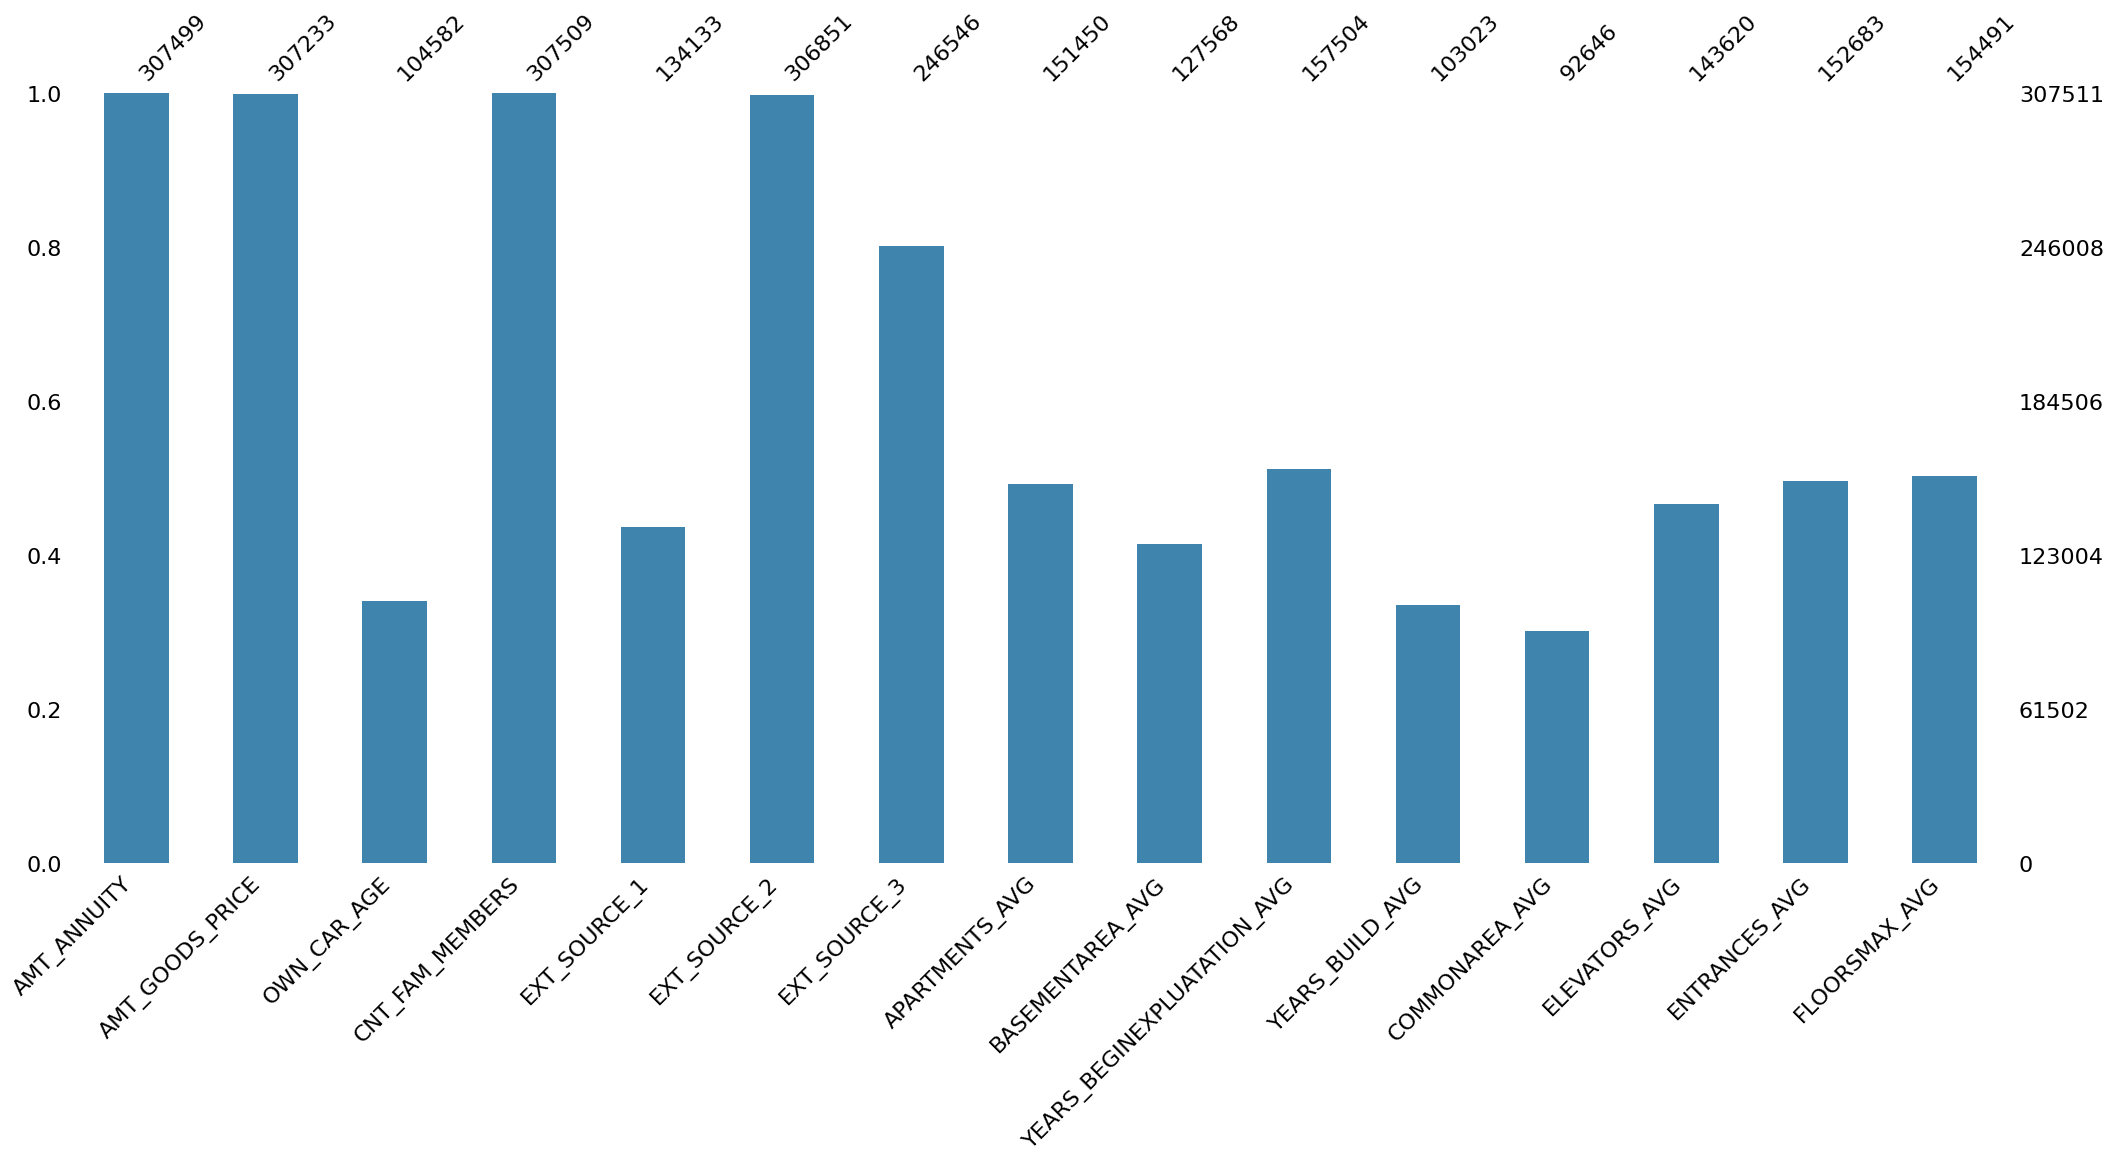

In [13]:
%matplotlib inline
missingno.bar(my_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

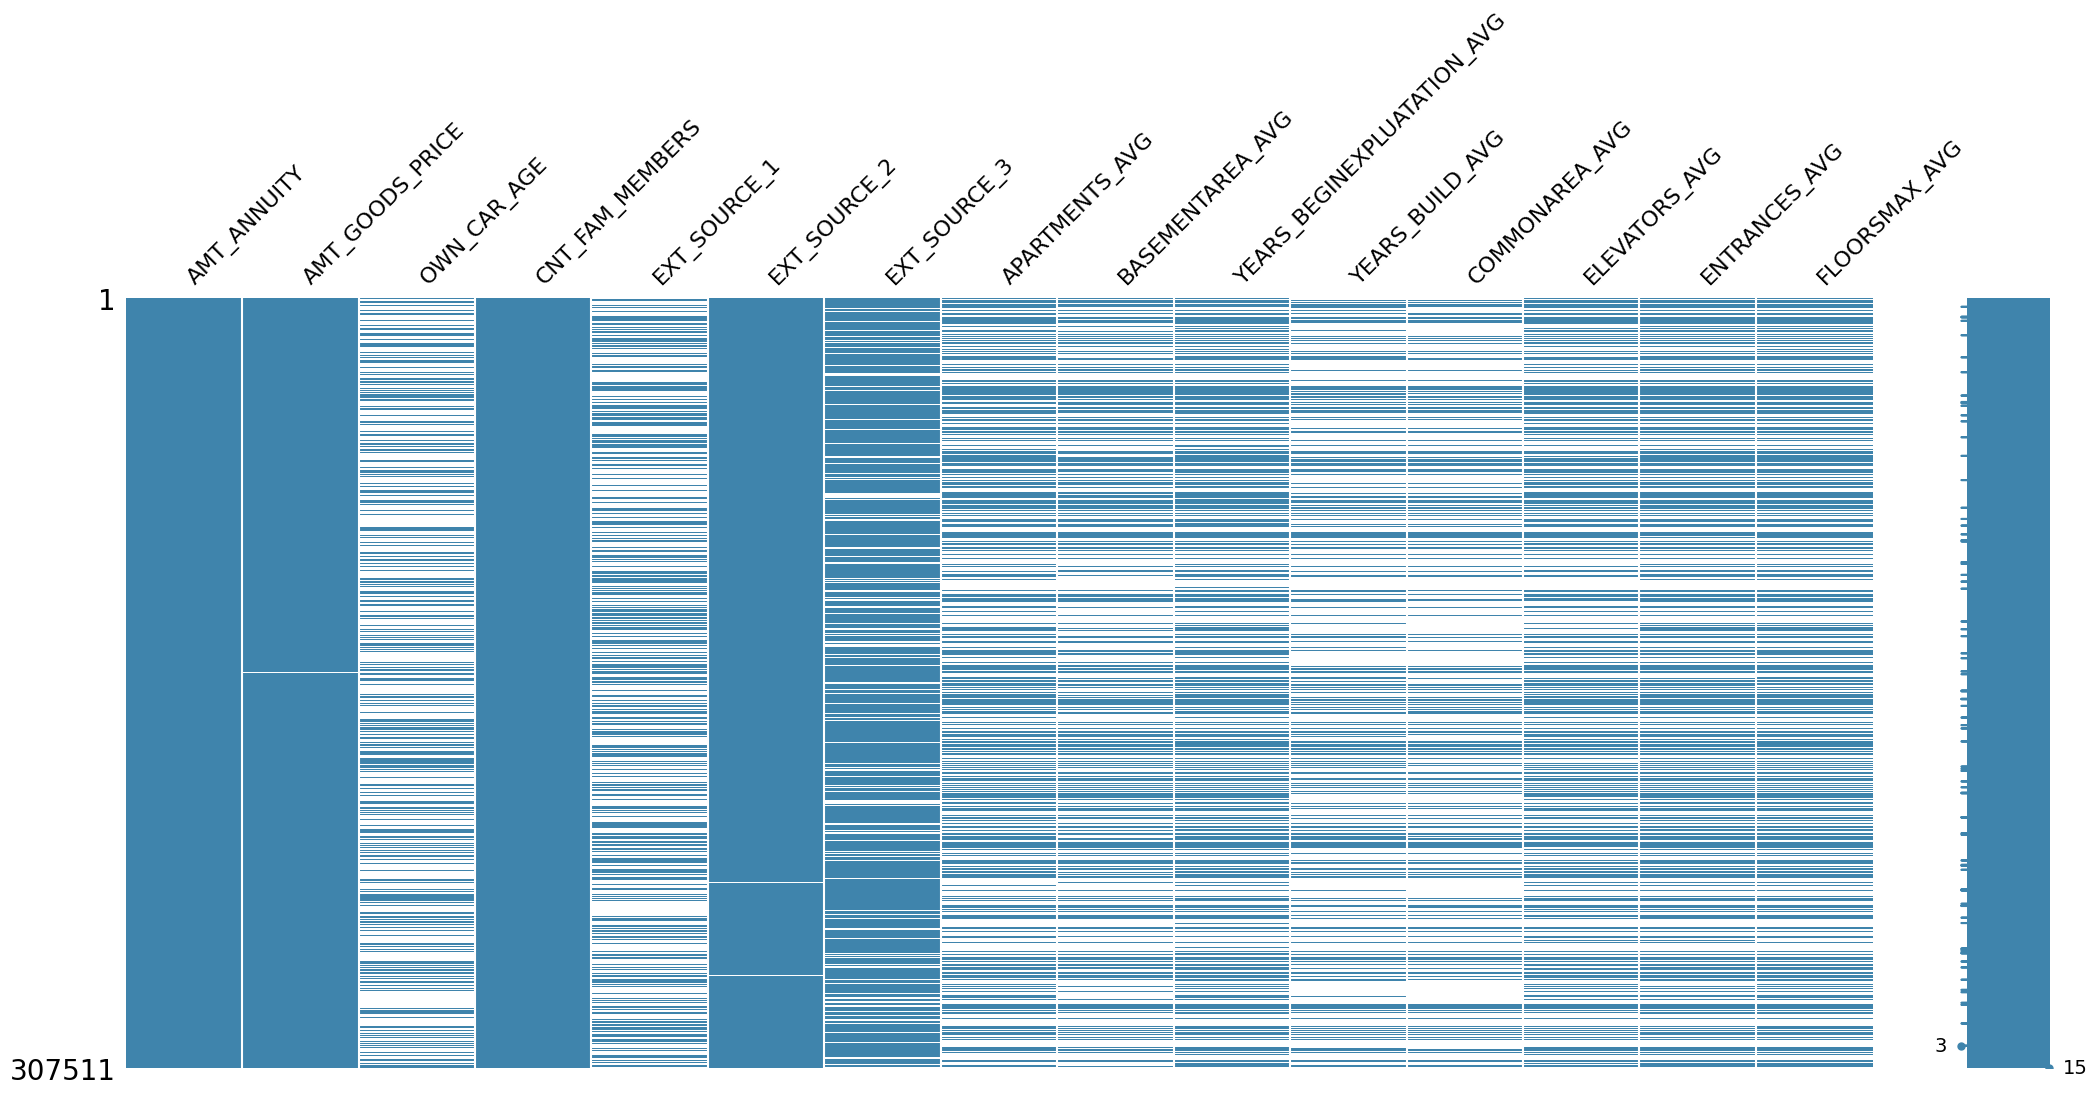

In [14]:
%matplotlib inline
missingno.matrix(my_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

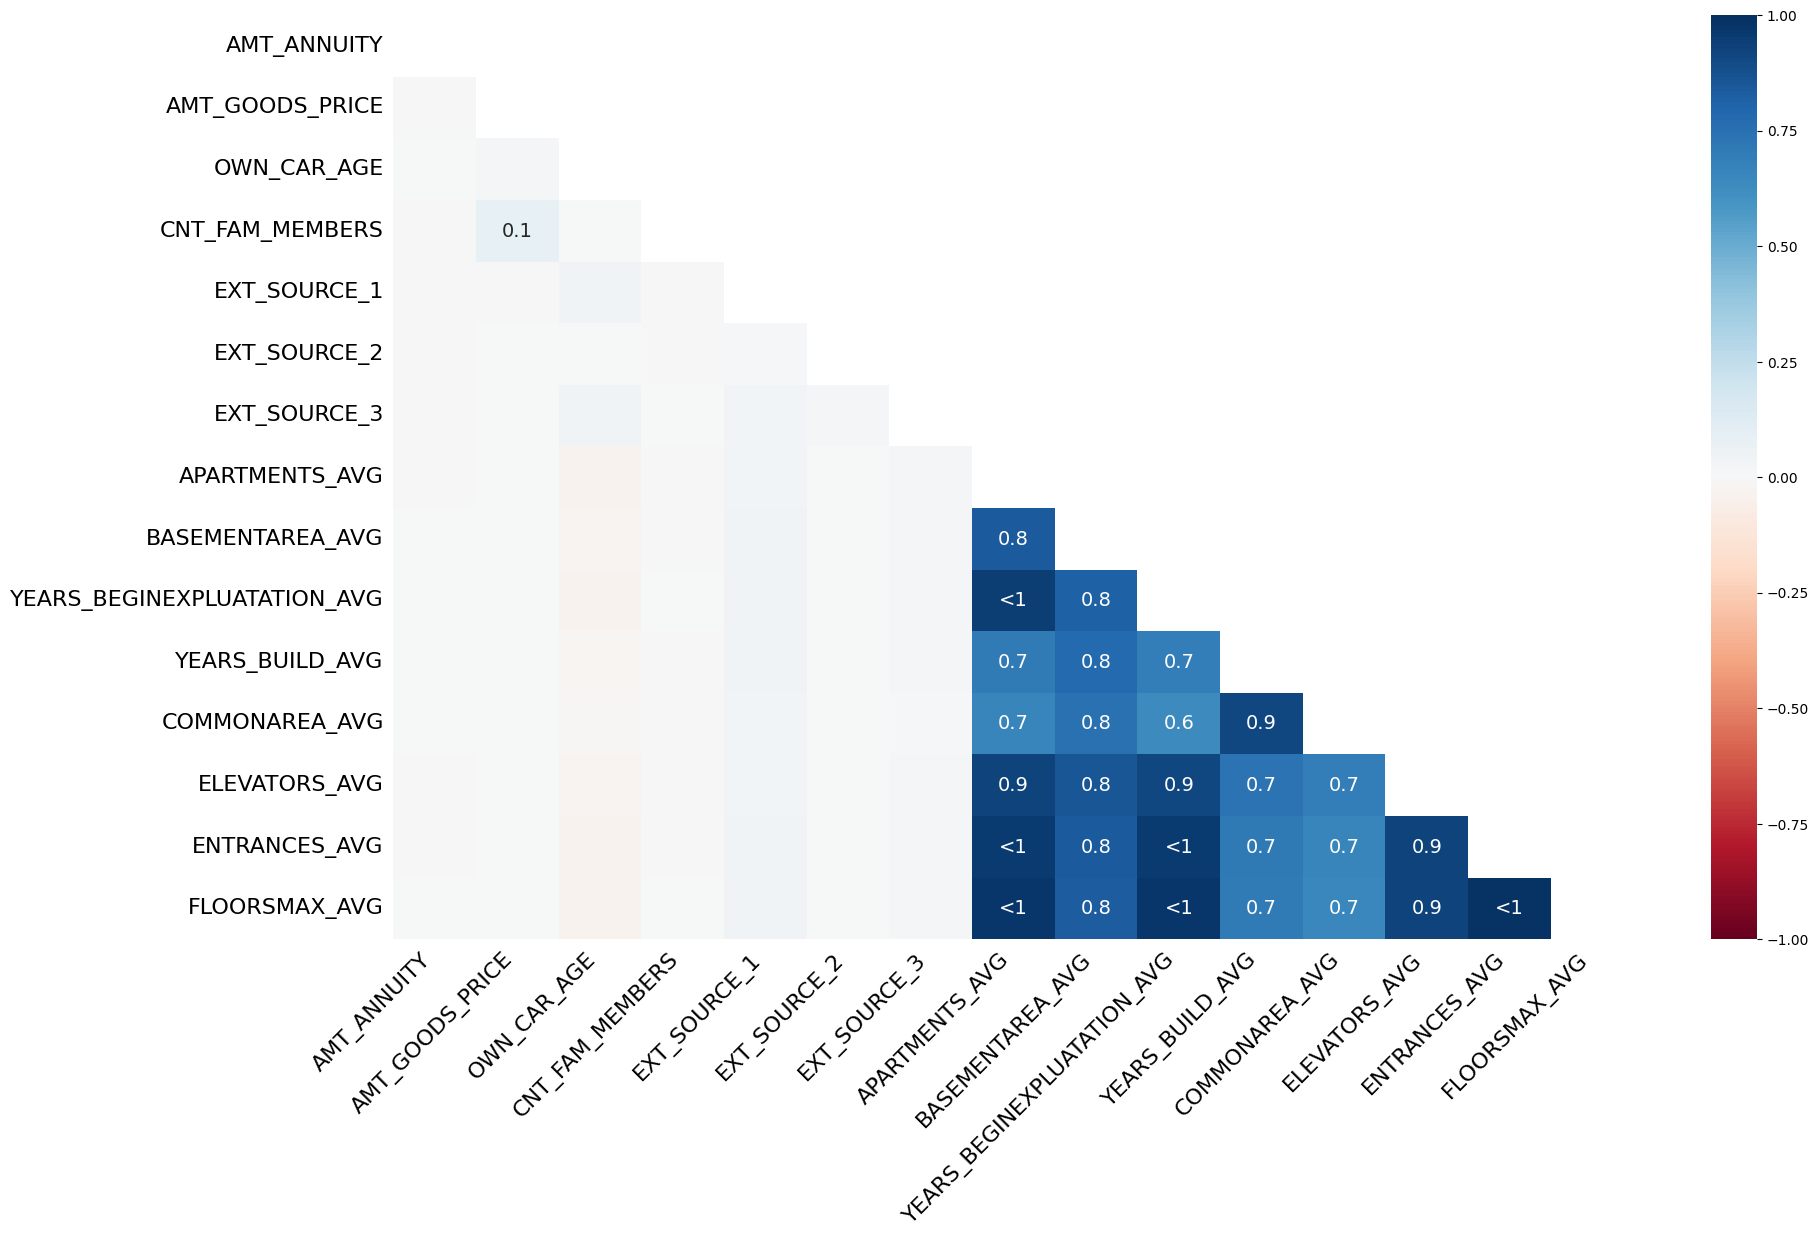

In [15]:
%matplotlib inline
missingno.heatmap(my_df)

<AxesSubplot: >

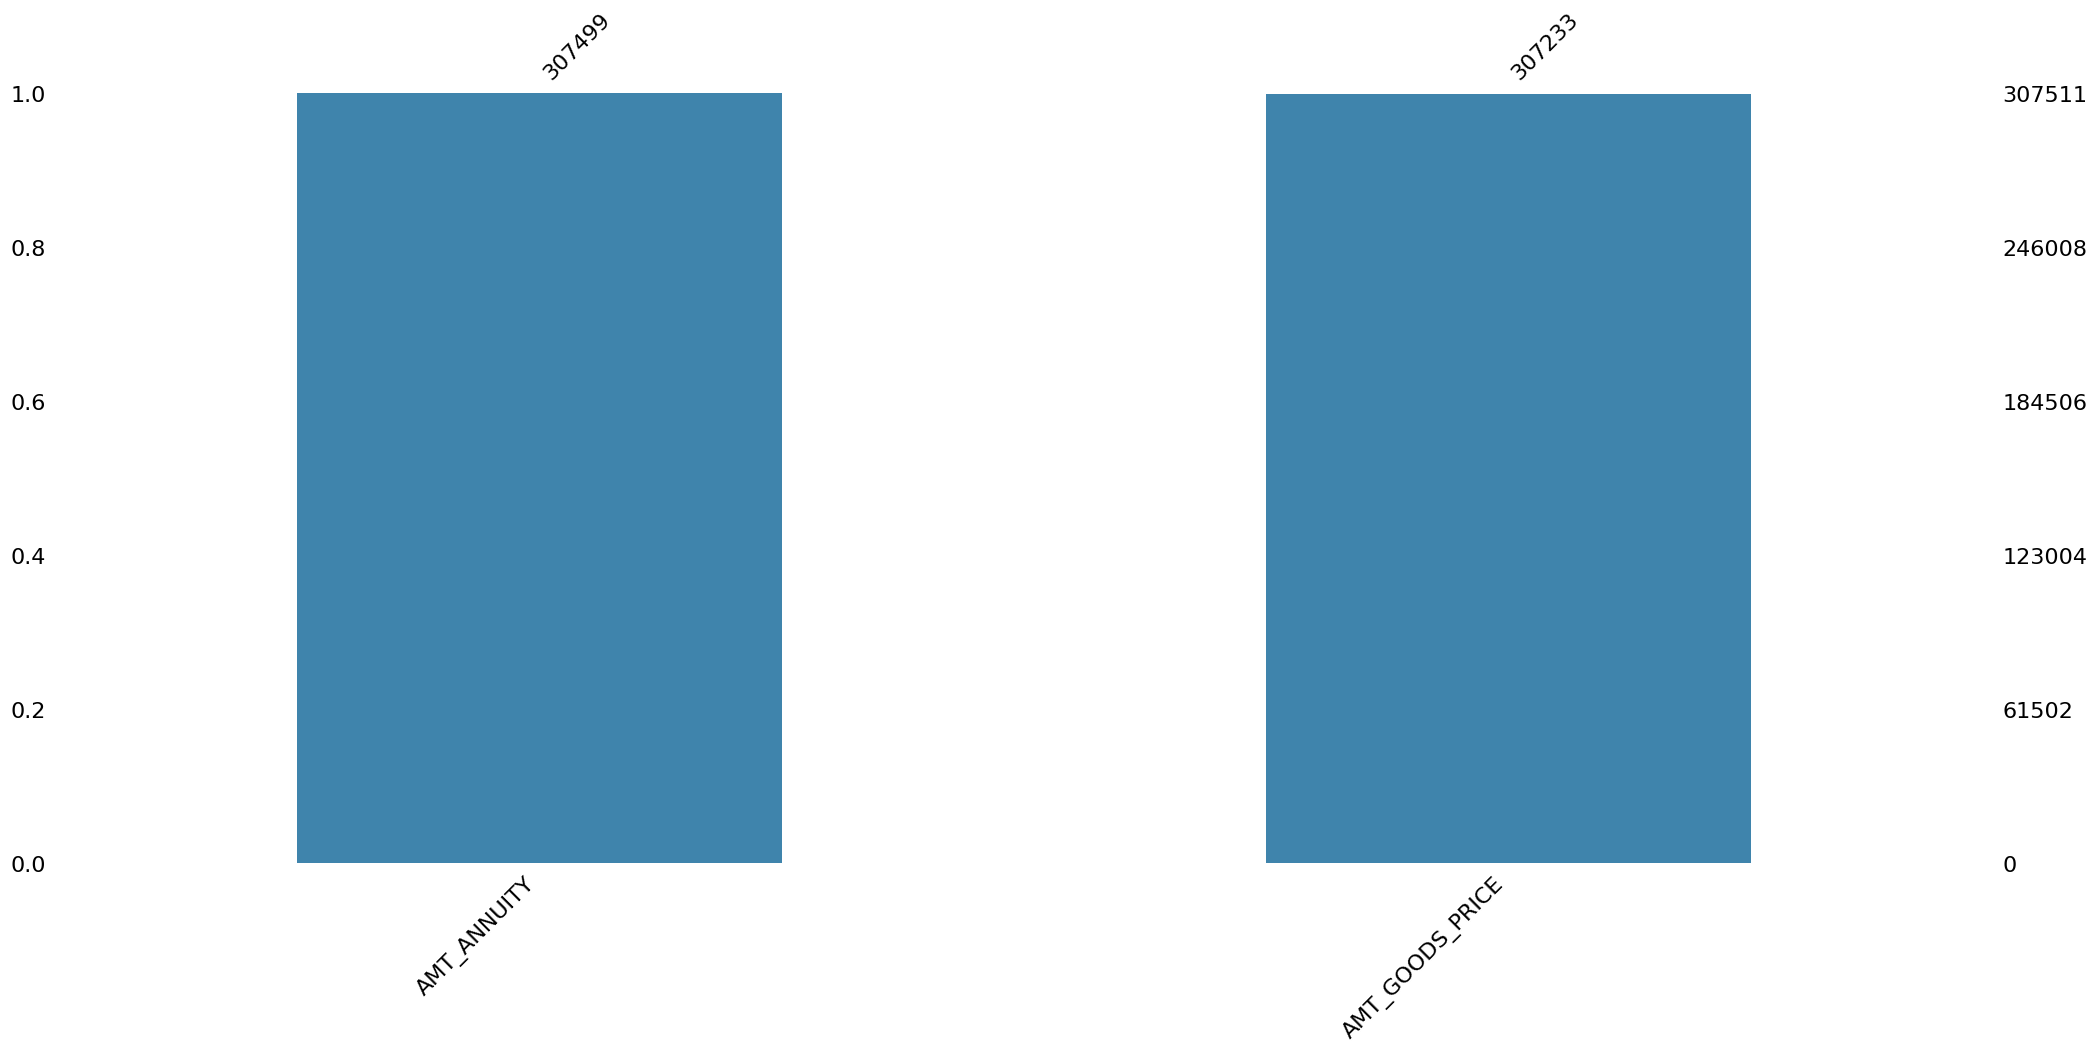

In [16]:
%matplotlib inline
missingno.bar(first_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

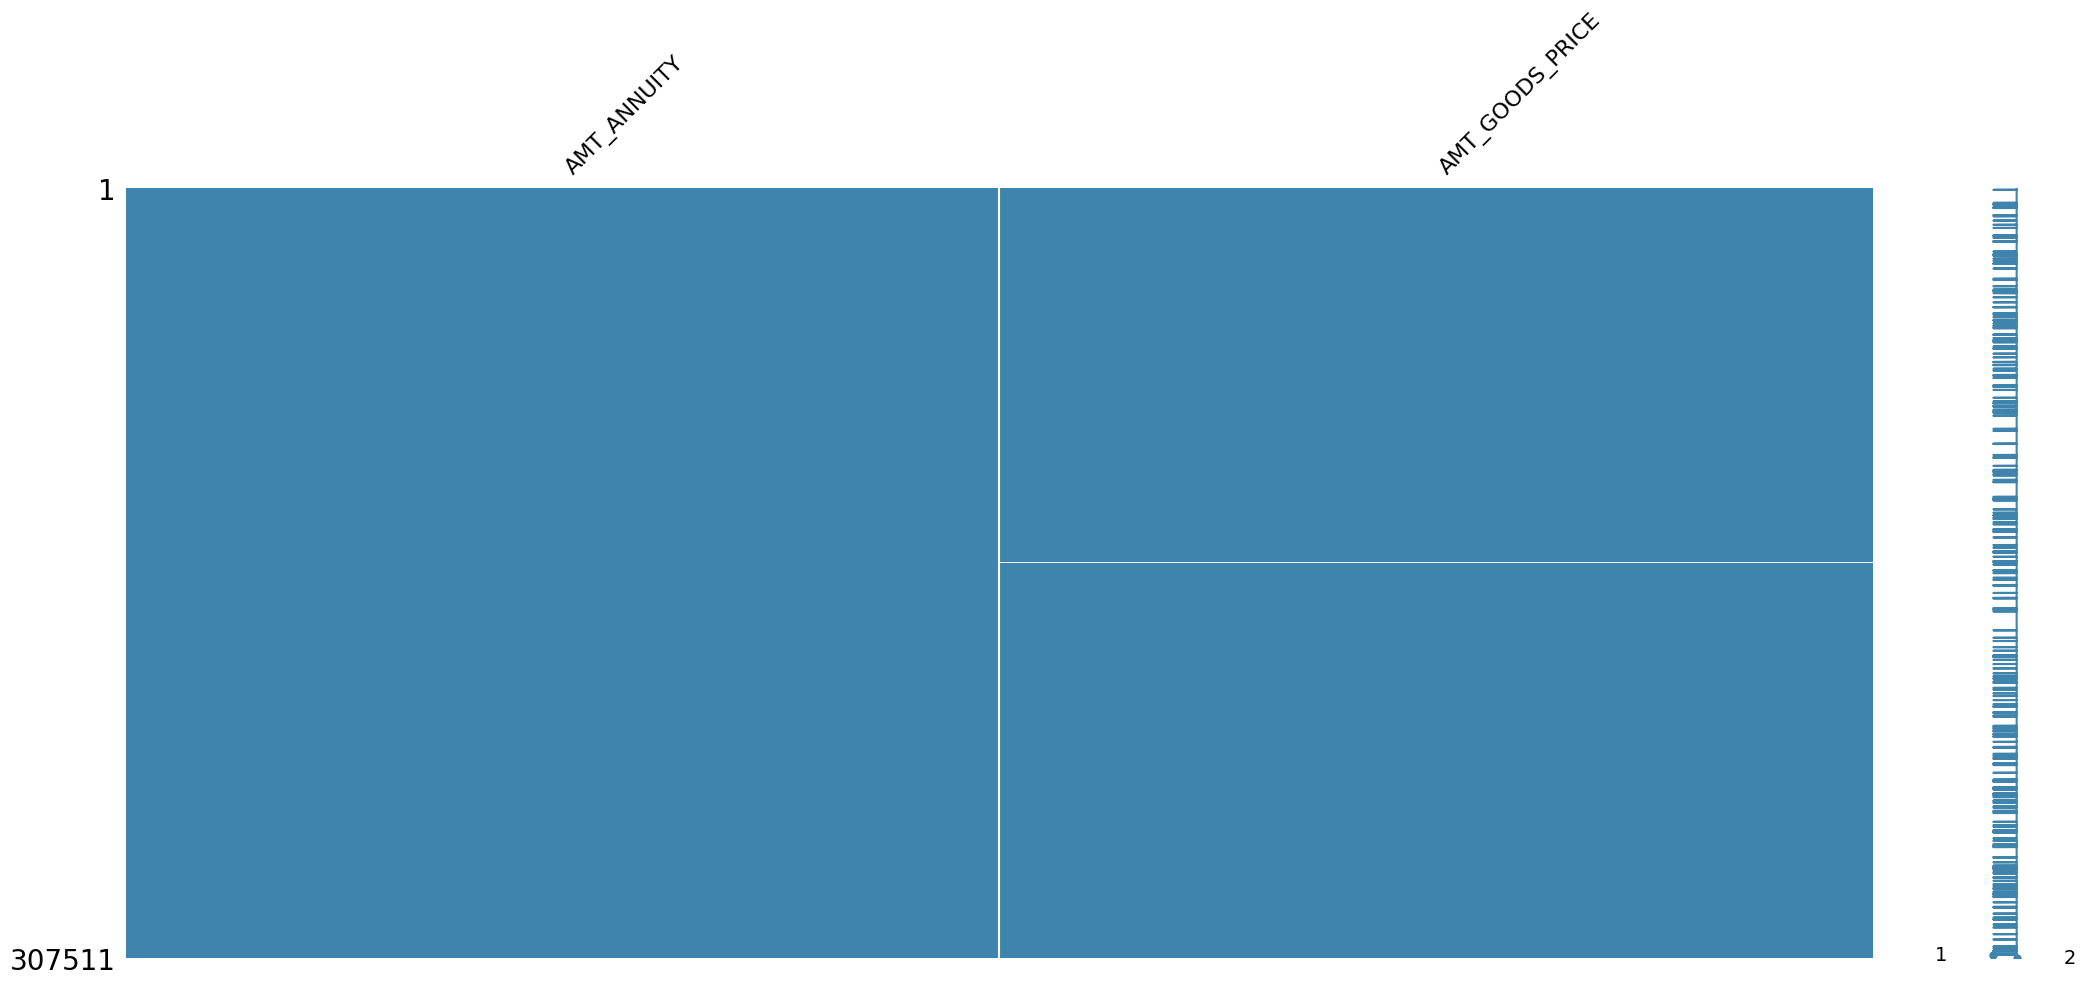

In [17]:
%matplotlib inline
missingno.matrix(first_df, color=(63/255,132/255,172/255))

In [18]:
print(data_descriptions[data_descriptions['Row'] == 'AMT_ANNUITY']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'AMT_ANNUITY']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'AMT_GOODS_PRICE']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'AMT_GOODS_PRICE']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'NAME_TYPE_SUITE']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'NAME_TYPE_SUITE']['Special'].to_list())

['Loan annuity']
[nan]
['For consumer loans it is the price of the goods for which the loan is given']
[nan]
['Who was accompanying client when he was applying for the loan']
[nan]


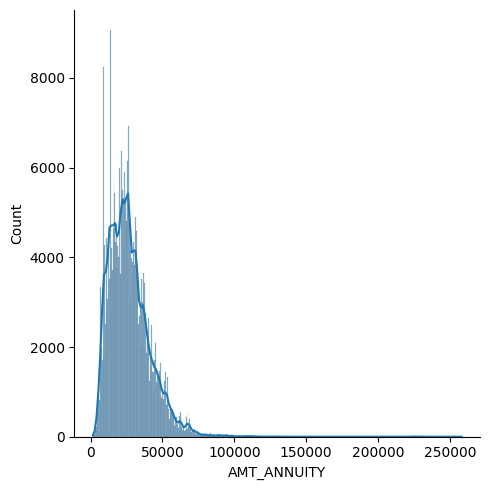

In [19]:
df_helper = df[['AMT_ANNUITY']].copy()
sns.displot(data=df_helper, x="AMT_ANNUITY", kde=True)

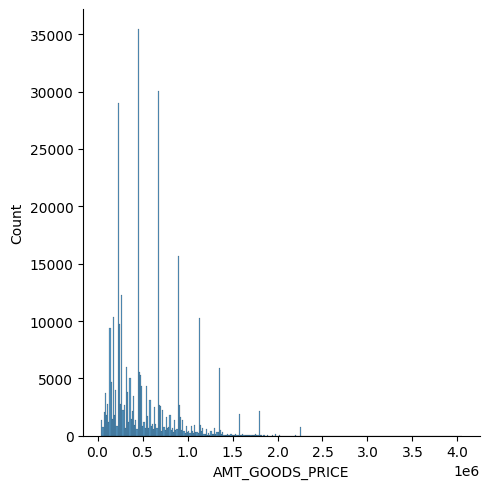

In [20]:
df_helper = df[['AMT_GOODS_PRICE']].copy()
sns.displot(data=df_helper, x="AMT_GOODS_PRICE", kde=False)

In [21]:
df_helper = df[['NAME_TYPE_SUITE']].copy()
df_helper.drop_duplicates(inplace=True)
df_helper

NAME_TYPE_SUITE
0      Unaccompanied
1             Family
5    Spouse, partner
8           Children
18           Other_A
64               NaN
174          Other_B
416  Group of people

In [22]:
pd.set_option('display.max_columns', None)
df[df['AMT_ANNUITY'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [23]:
pd.reset_option('max_columns')

Ci sono 12 entrate che hanno AMT_ANNUITY a NaN, sono numeri, e non sembra chiara una scelta da sostituire al NaN, soprattutto in vista della forma dell'istogramma, non riesco neanche a immaginarmi spiegazioni sensate del perché questo dato possa mancare se non errore di inserimento. Non riesco a trovare colonne del dataset che sembrano essere collegate alla mancanza di questo dato.

In [24]:
df_helper = df[df['AMT_GOODS_PRICE'].isna()].copy()
df_helper = df_helper[['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE']].drop_duplicates()
df_helper

AMT_GOODS_PRICE NAME_TYPE_SUITE
724              NaN             NaN

In [25]:
df_helper = df[df['AMT_GOODS_PRICE'].isna()].copy()
df_helper = df_helper[['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE']]
df_helper

AMT_GOODS_PRICE NAME_TYPE_SUITE
724                 NaN             NaN
5937                NaN             NaN
6425                NaN             NaN
6703                NaN             NaN
7647                NaN             NaN
...                 ...             ...
304678              NaN             NaN
304784              NaN             NaN
305833              NaN             NaN
306126              NaN             NaN
306273              NaN             NaN

[278 rows x 2 columns]

In [26]:
df_helper = df[df['NAME_TYPE_SUITE'].isna()].copy()
df_helper = df_helper[['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE']]
df_helper

AMT_GOODS_PRICE NAME_TYPE_SUITE
64             315000.0             NaN
724                 NaN             NaN
1199           477000.0             NaN
1669           832500.0             NaN
1862           243000.0             NaN
...                 ...             ...
306273              NaN             NaN
306544         894825.0             NaN
306615         225000.0             NaN
306636         585000.0             NaN
306725         675000.0             NaN

[1292 rows x 2 columns]

In tutte le entrate di AMT_GOODS_PRICE che contengono un NaN (278 righe) abbiamo che non è segnato neanche la persona accompagnatrice, che però è un dato mancante in 1292 righe. Infatti il viceversa non vale.
Non sembra chiaro il perché ci possa essere un collegamento tra le due cose, ma era già evidenziato dall'heatmap

<AxesSubplot: >

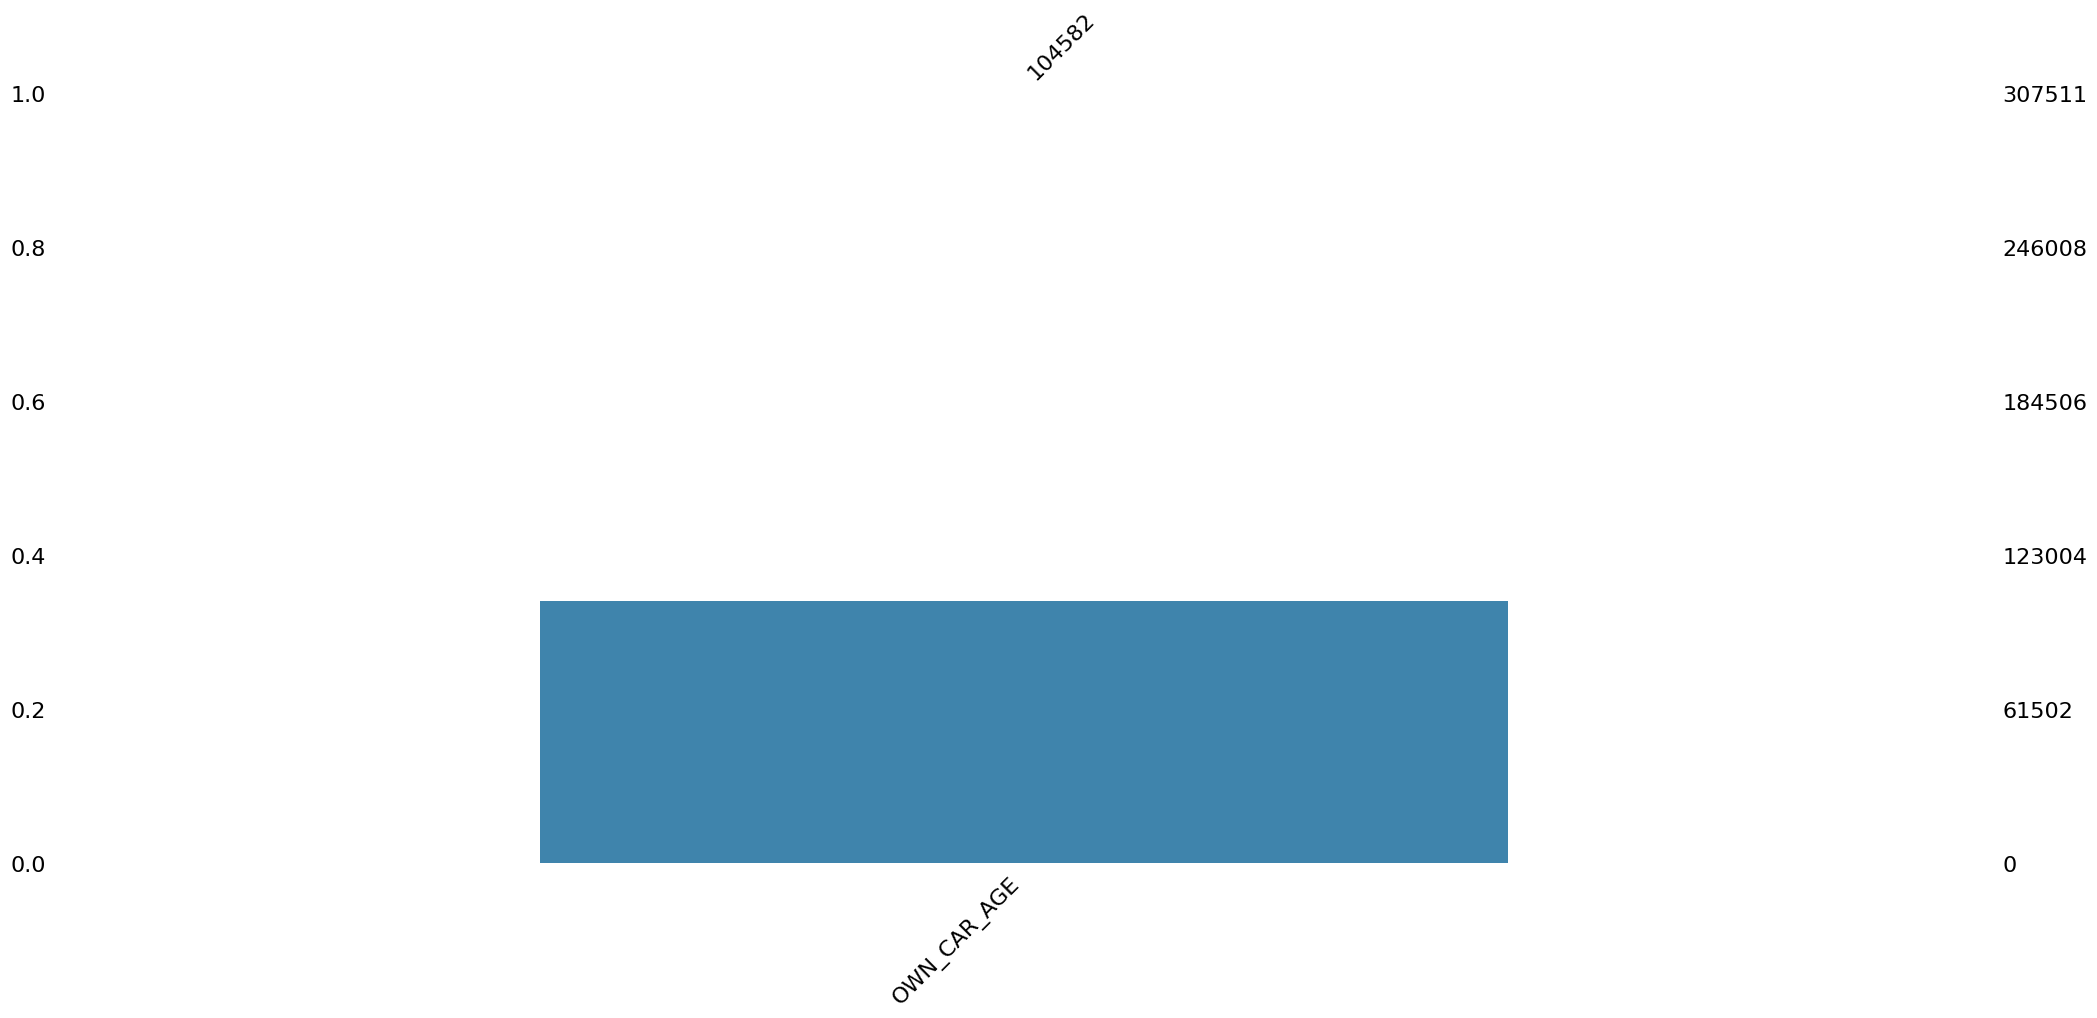

In [27]:
%matplotlib inline
missingno.bar(second_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

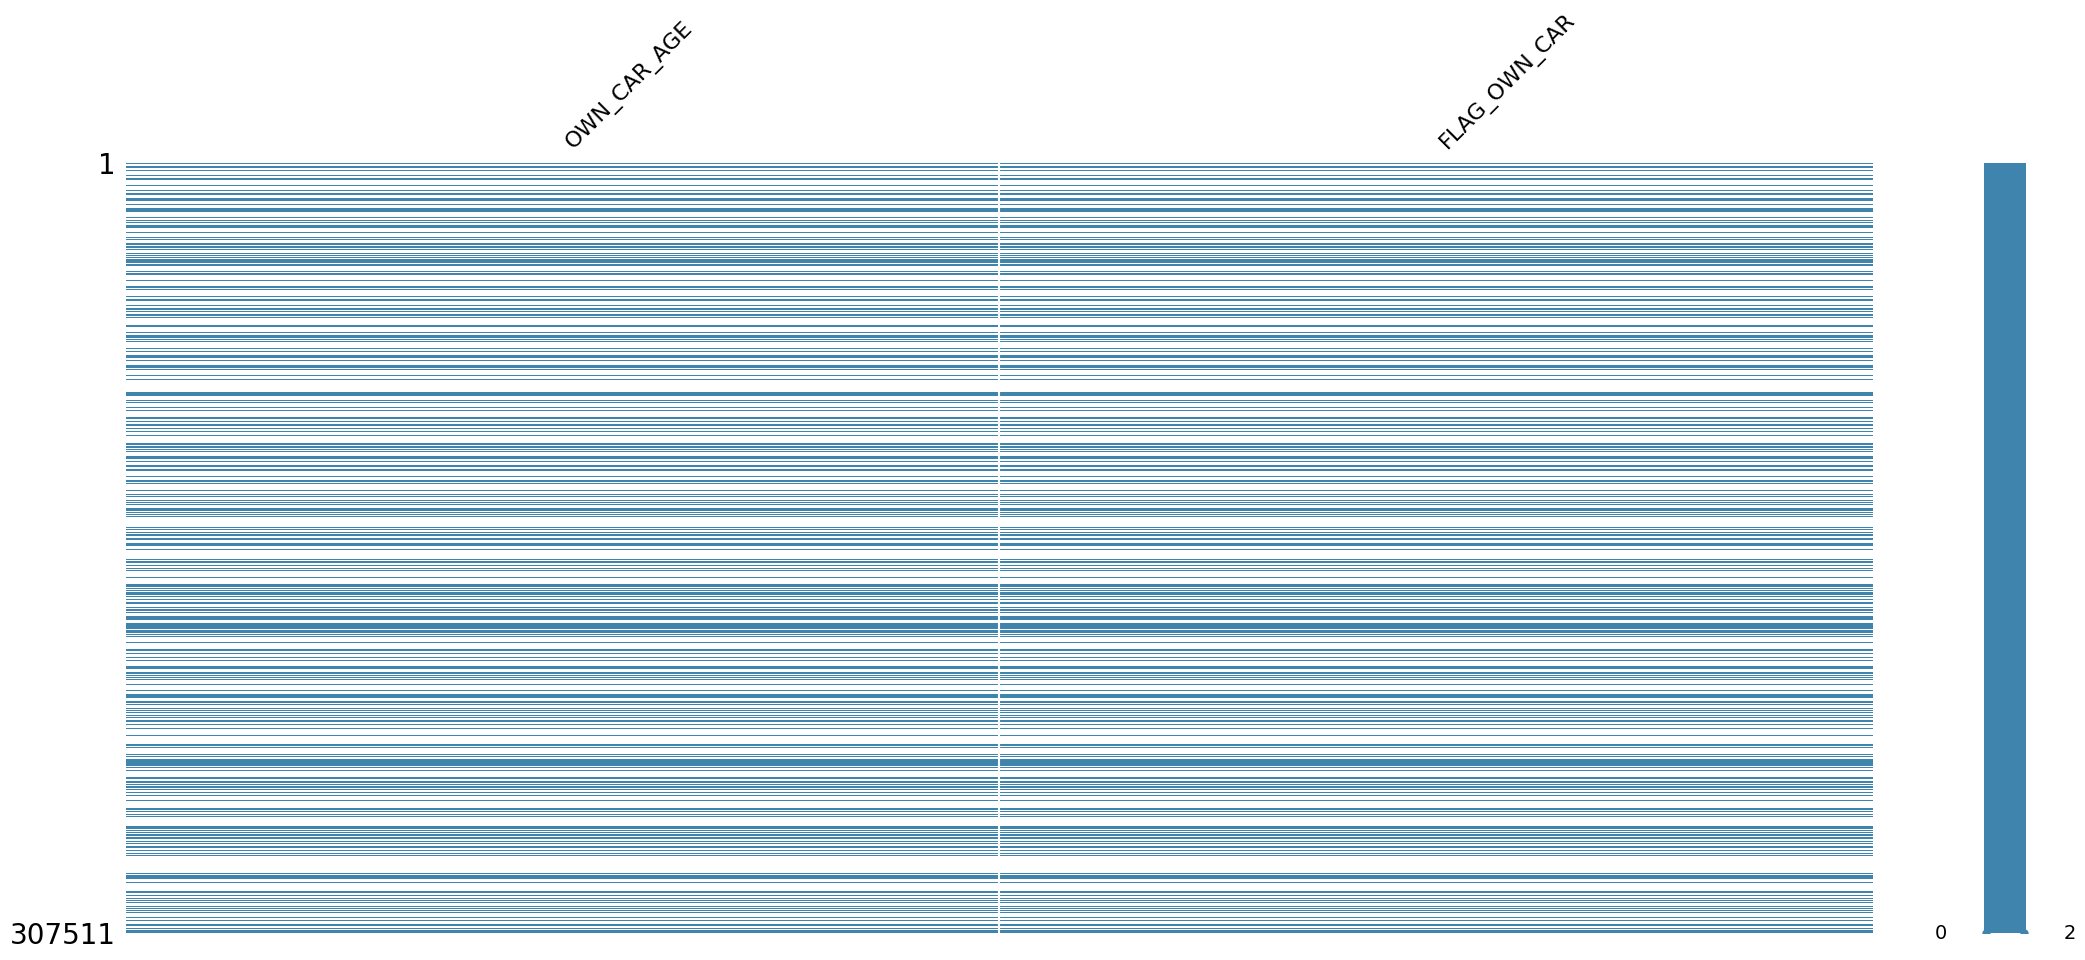

In [28]:
%matplotlib inline
second_df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].copy()
second_df['FLAG_OWN_CAR'].replace(to_replace='N',value=np.nan, inplace=True)
missingno.matrix(second_df, color=(63/255,132/255,172/255))

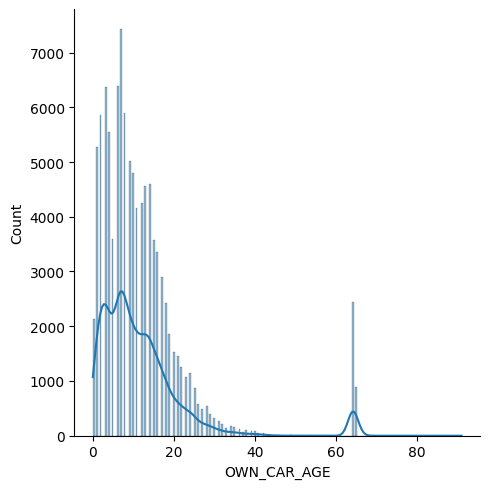

In [29]:
df_helper = df[['OWN_CAR_AGE']].copy()
sns.displot(data=df_helper, x="OWN_CAR_AGE", kde=True)

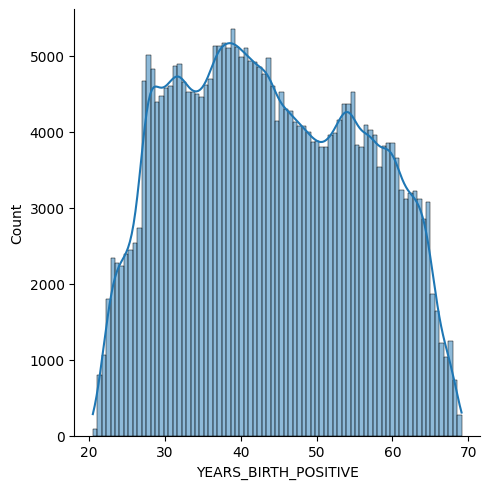

In [30]:
df_helper = df[['DAYS_BIRTH']].copy()
df_helper['YEARS_BIRTH_POSITIVE'] = df_helper.apply(lambda vec : np.abs(vec[:])/365)
sns.displot(data=df_helper, x="YEARS_BIRTH_POSITIVE", kde=True)

In [31]:
print(data_descriptions[data_descriptions['Row'] == 'OWN_CAR_AGE']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'OWN_CAR_AGE']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'FLAG_OWN_CAR']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'FLAG_OWN_CAR']['Special'].to_list())

["Age of client's car"]
[nan]
['Flag if the client owns a car']
[nan]


In [32]:
helper_df = df[df['OWN_CAR_AGE'].isna()].copy()
print(len(helper_df))
helper_df = helper_df[['FLAG_OWN_CAR','OWN_CAR_AGE']]
helper_df.drop_duplicates(inplace=True)
helper_df

202929


FLAG_OWN_CAR  OWN_CAR_AGE
0                N          NaN
30897            Y          NaN

In [33]:
helper_df = df[['FLAG_OWN_CAR','OWN_CAR_AGE']].copy()
helper_df = helper_df[(helper_df['FLAG_OWN_CAR'] == 'Y') & (helper_df['OWN_CAR_AGE'].isna())]
helper_df

FLAG_OWN_CAR  OWN_CAR_AGE
30897             Y          NaN
181231            Y          NaN
217549            Y          NaN
229867            Y          NaN
236868            Y          NaN

In [34]:
helper_df = df[['FLAG_OWN_CAR','OWN_CAR_AGE']].copy()
helper_df = helper_df[(helper_df['FLAG_OWN_CAR'] == 'N') & (helper_df['OWN_CAR_AGE'].notna())]
helper_df

Empty DataFrame
Columns: [FLAG_OWN_CAR, OWN_CAR_AGE]
Index: []

Per quanto riguarda OWN_CAR_AGE, abbiamo 202929 NaN che corrispondono quasi interamente a casi in cui FLAG_OWN_CAR è posto a N, quindi persone che non hanno una automobile.
Tuttavia in 5 casi risulta FLAG_OWN_CAR = Y e comunque OWN_CAR_AGE = None, questi sono casi in cui effettivamente il valore manca.
Il caso contrario, ovvero FLAG_OWN_CAR pari a N e OWN_CAR_AGE non nullo, invece, non capita mai.

<AxesSubplot: >

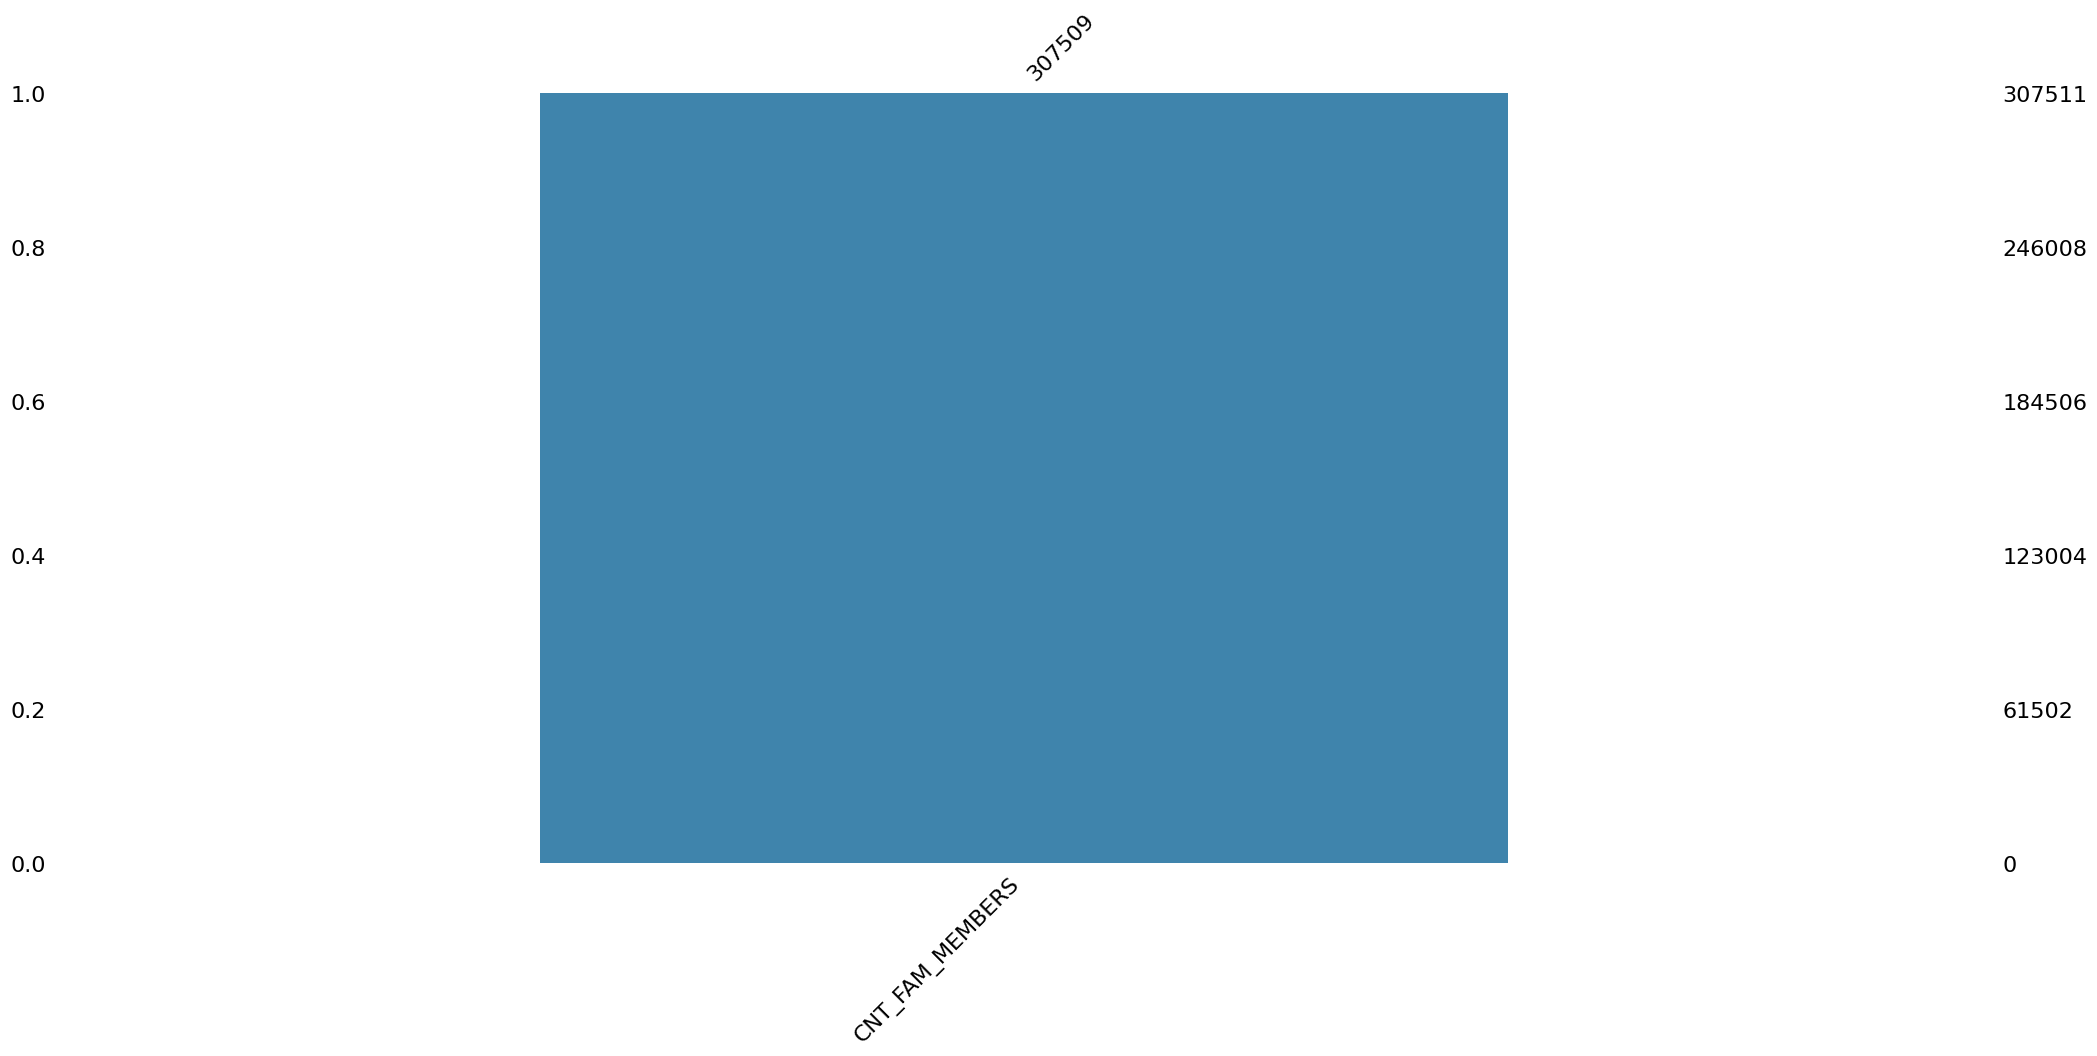

In [35]:
%matplotlib inline
missingno.bar(third_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

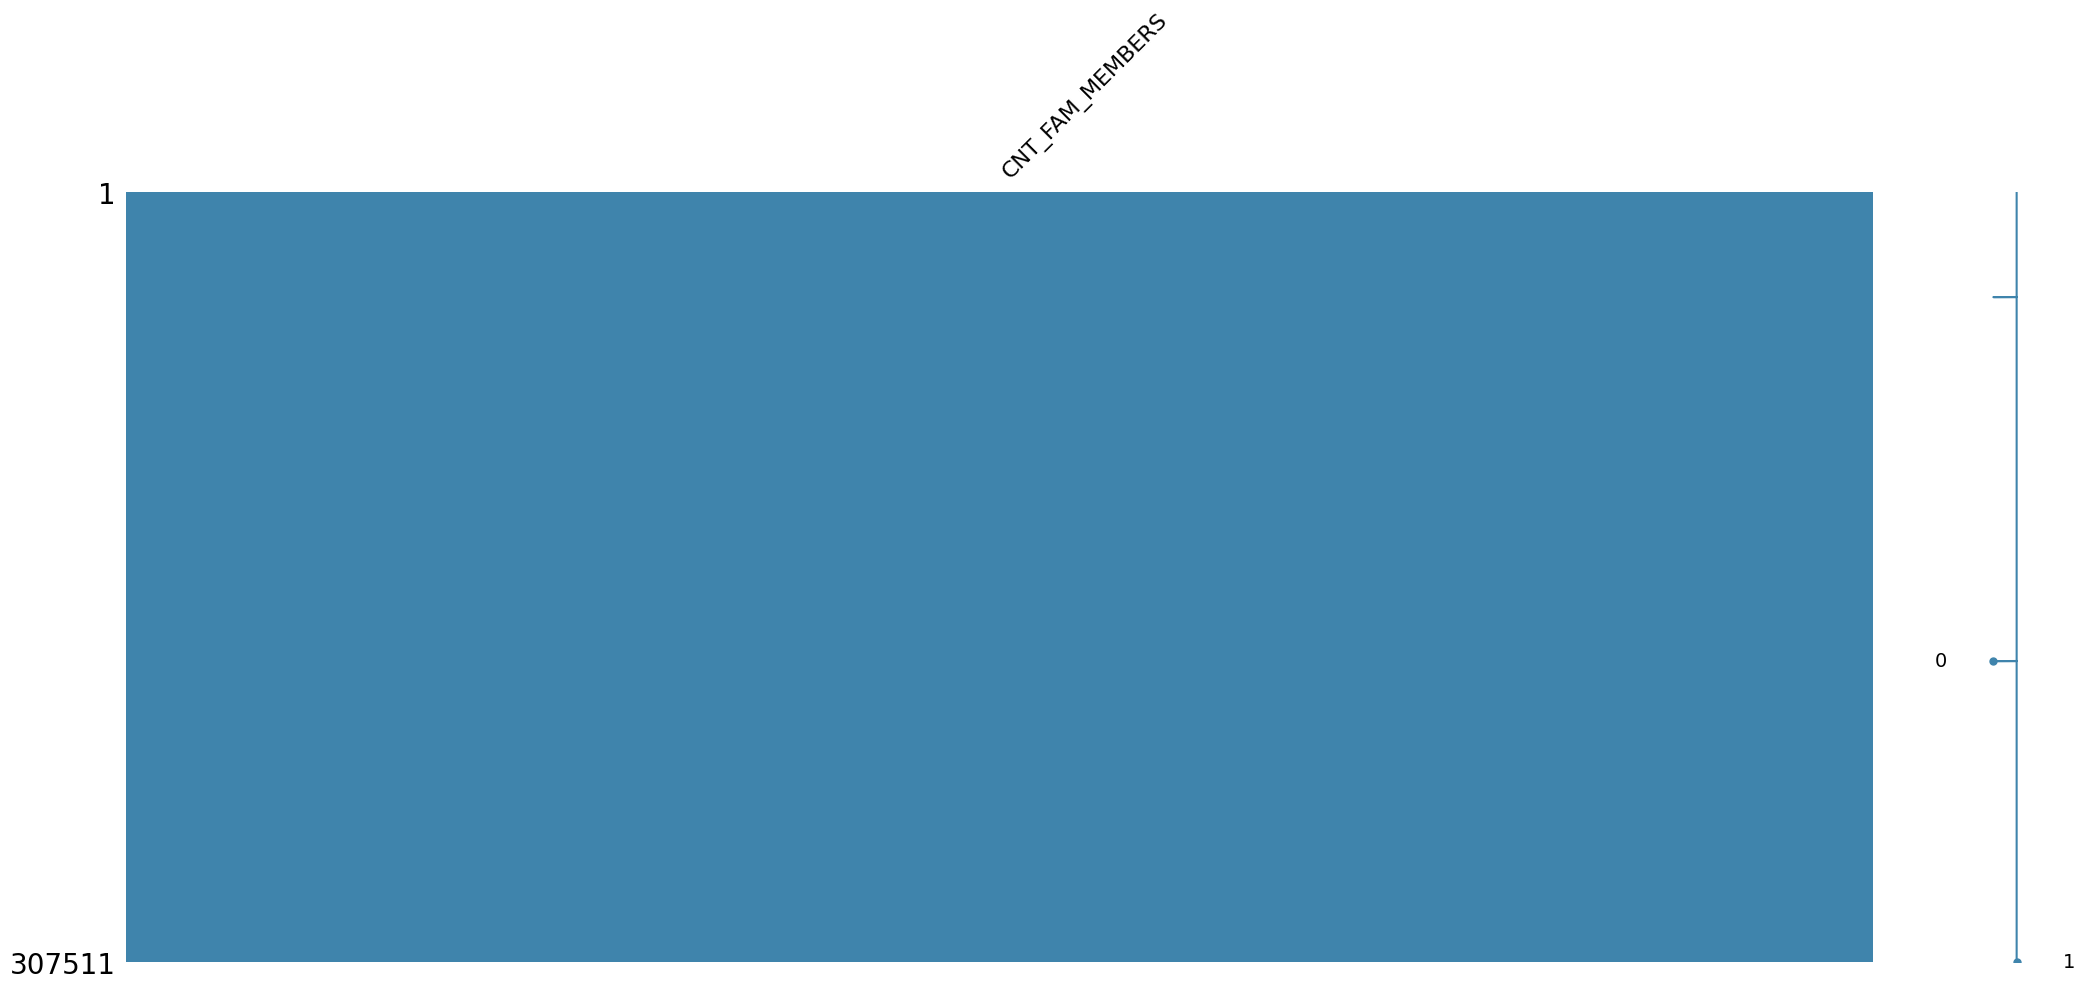

In [36]:
%matplotlib inline
missingno.matrix(third_df, color=(63/255,132/255,172/255))

In [37]:
print(data_descriptions[data_descriptions['Row'] == 'CNT_FAM_MEMBERS']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'CNT_FAM_MEMBERS']['Special'].to_list())

['How many family members does client have']
[nan]


In [38]:
df[df['CNT_FAM_MEMBERS'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
41982       33750.0  ...                 0                0                0   
187348      29250.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
41982                 0                        NaN                       NaN   
187348                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
41982                          NaN                        NaN   
187348                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
41982                         NaN                         NaN  
187348                        0.0                         1.0  

[2 rows x 122 columns]

In [39]:
df[df['CNT_FAM_MEMBERS'] == 0]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

[0 rows x 122 columns]

In [40]:
df[df['CNT_FAM_MEMBERS'] == 1]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
2           100004       0    Revolving loans           M            Y   
4           100007       0         Cash loans           M            N   
9           100012       0    Revolving loans           M            N   
15          100019       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307504      456248       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
2                    Y             0           67500.0    135000.0   
4                    Y             0          121500.0    513000.0   
9                    Y             0          135000.0    405000.0   
15                   Y             0          157500.0    299772.0   
...                ...           ...               ...         ...   
307504               Y             0          153000.0    331920.0   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
9           20250.0  ...                 0                0                0   
15          20160.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307504      16096.5  ...                 0                0                0   
307505      22050.0  ...                 0                0                0   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
4                     0                        0.0                       0.0   
9                     0                        NaN                       NaN   
15                    0                        0.0                       0.0   
...                 ...                        ...                       ...   
307504                0                        NaN                       NaN   
307505                0                        0.0                       0.0   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
2                              0.0                        0.0   
4                              0.0                        0.0   
9                              NaN                        NaN   
15                             

Ci sono esattamente due casi in cui CNT_FAM_MEMBERS risulta pari a NaN, sembrano dei chiari errori di inserimento

<AxesSubplot: >

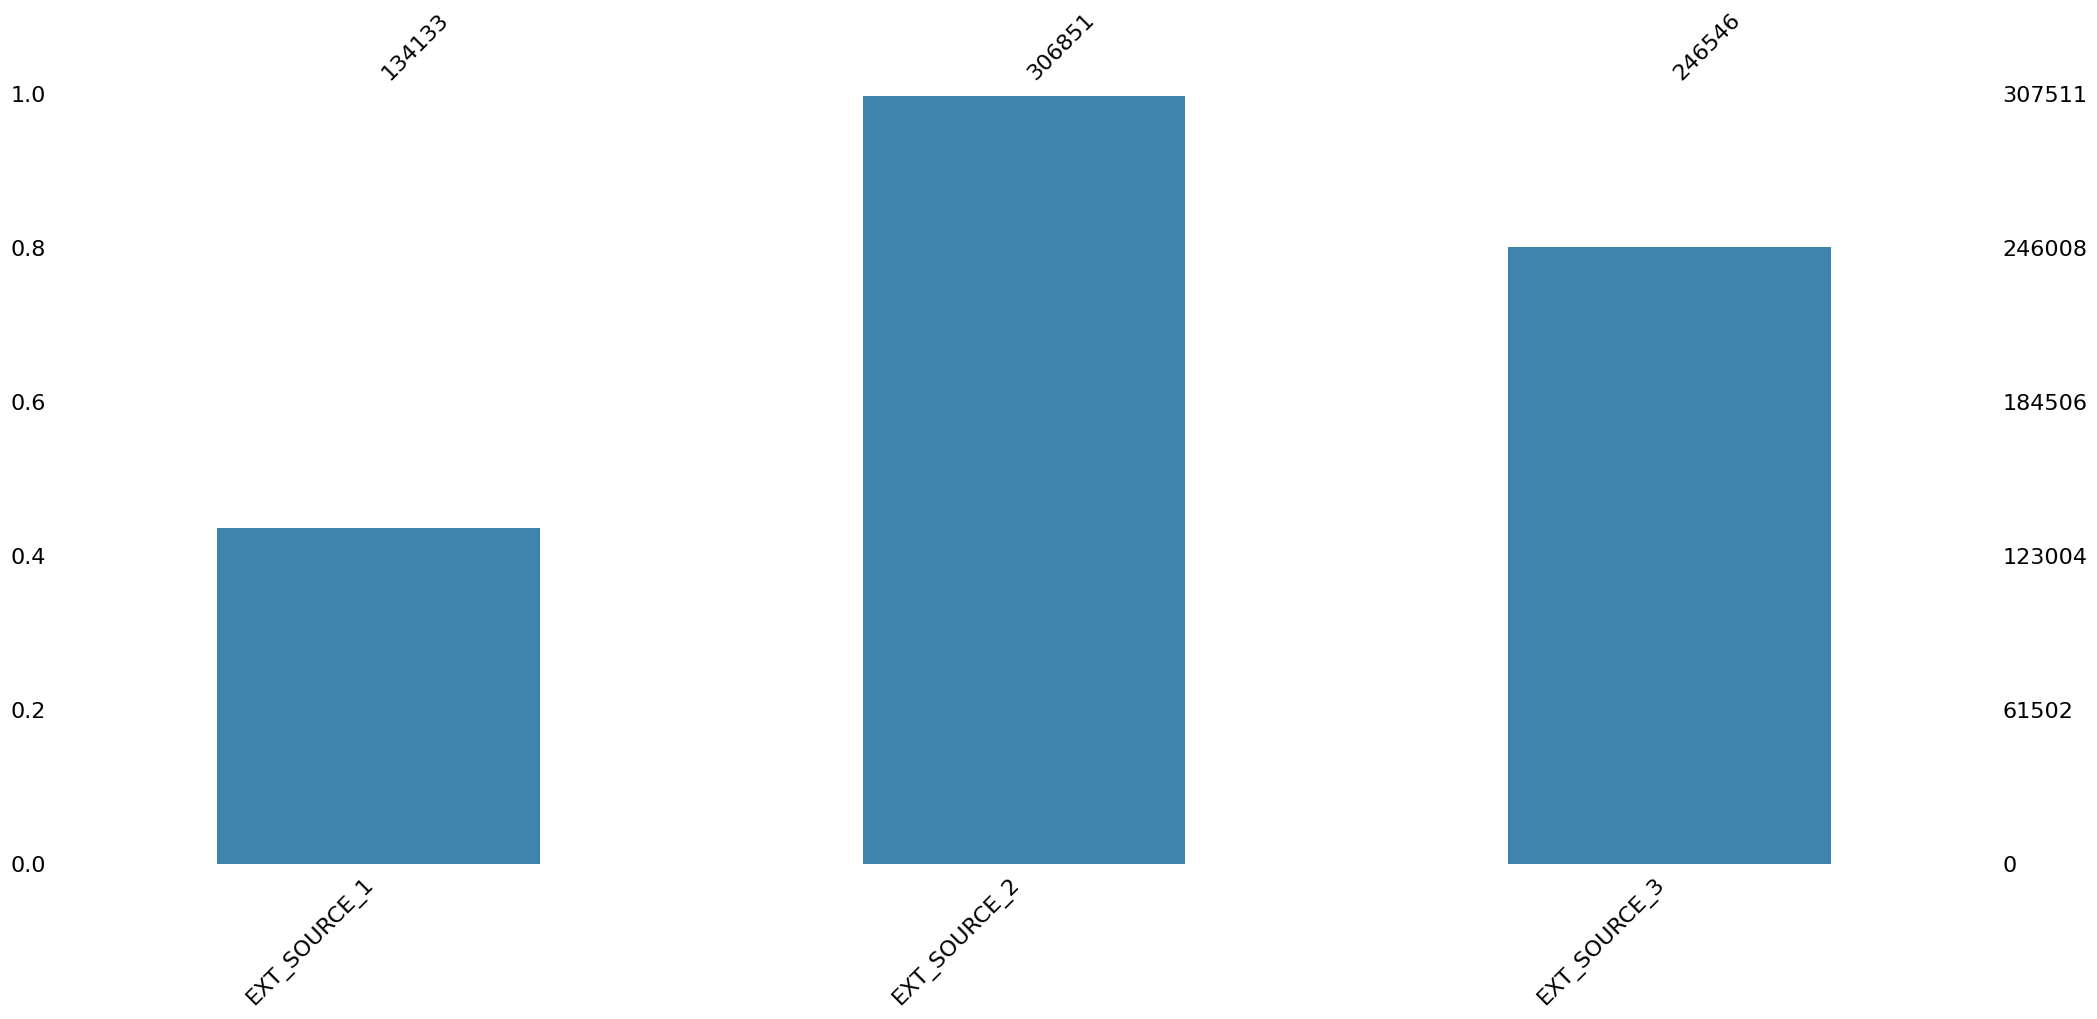

In [41]:
%matplotlib inline
missingno.bar(fourth_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

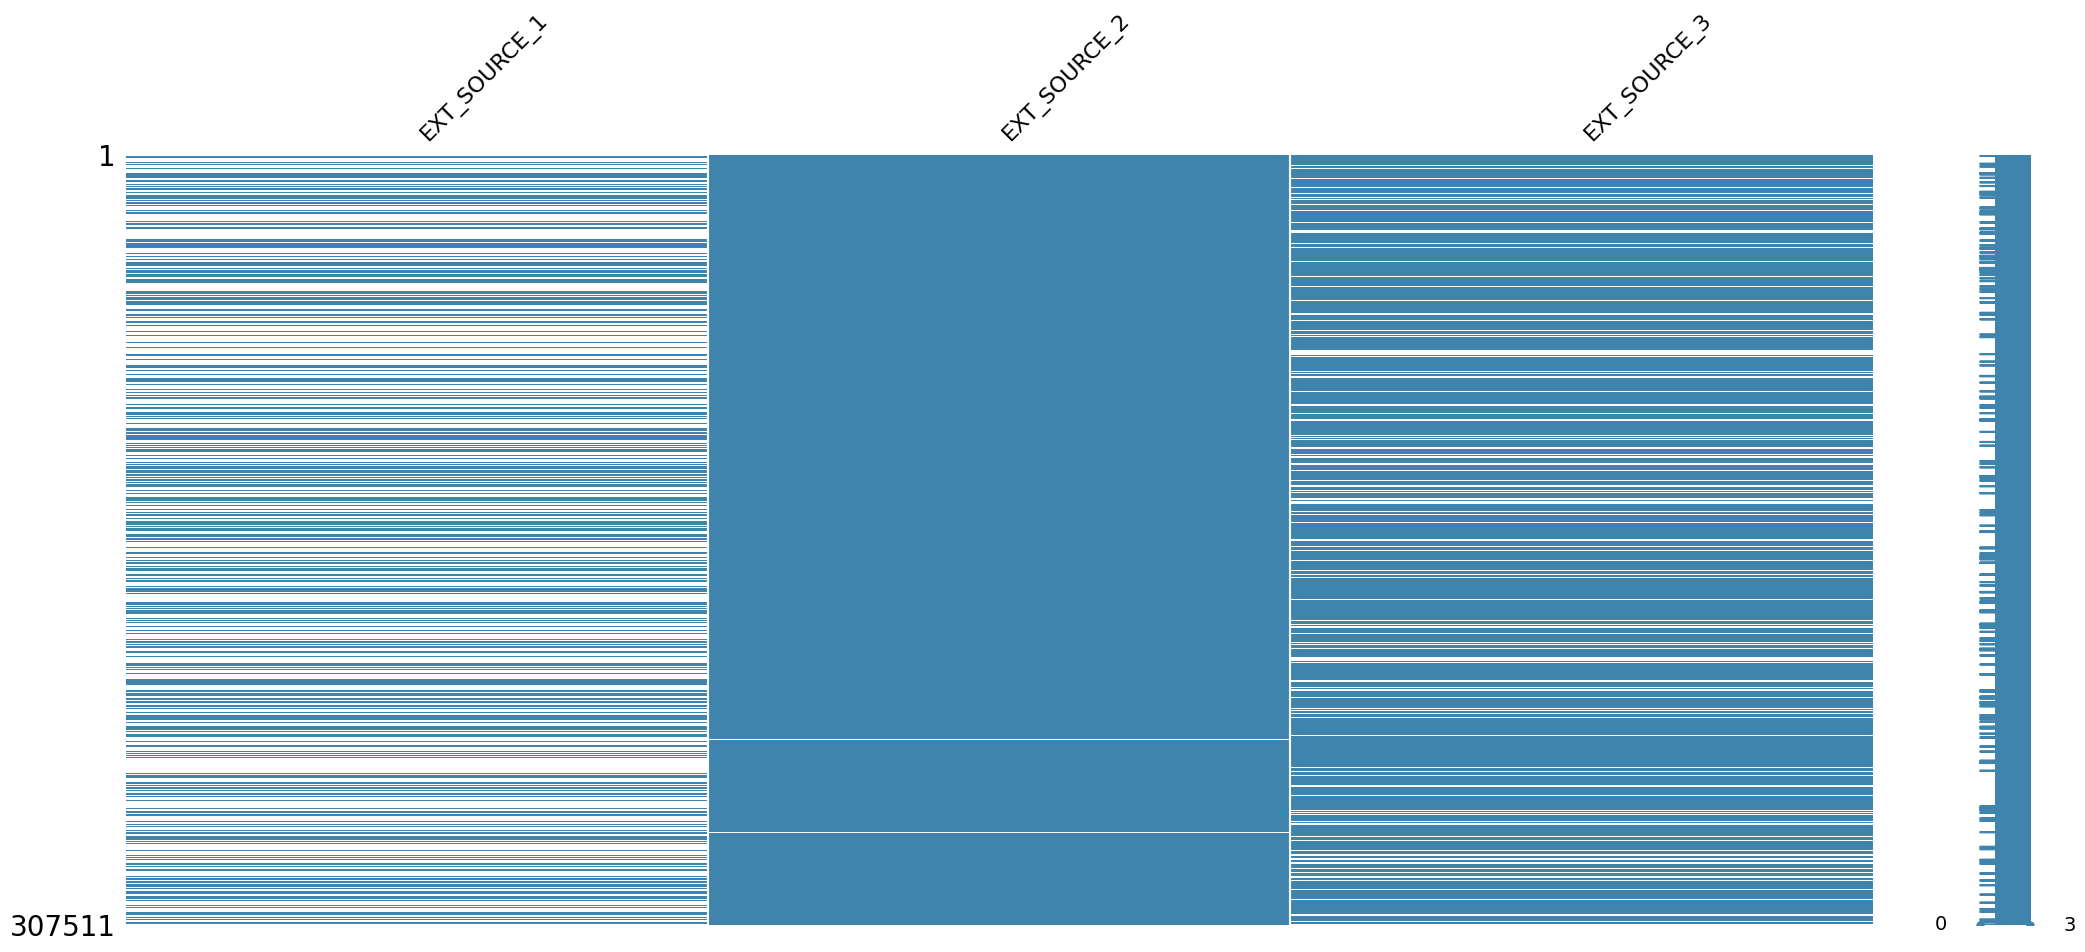

In [42]:
%matplotlib inline
missingno.matrix(fourth_df, color=(63/255,132/255,172/255))

In [43]:
print(data_descriptions[data_descriptions['Row'] == 'EXT_SOURCE_1']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'EXT_SOURCE_1']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'EXT_SOURCE_2']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'EXT_SOURCE_2']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'EXT_SOURCE_3']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'EXT_SOURCE_3']['Special'].to_list())

['Normalized score from external data source']
['normalized']
['Normalized score from external data source']
['normalized']
['Normalized score from external data source']
['normalized']


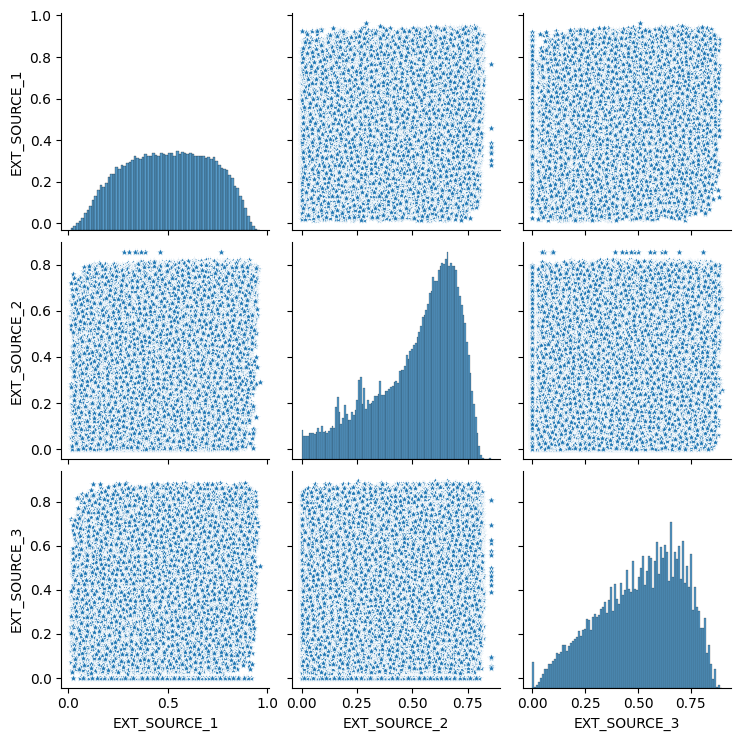

In [44]:
sns.pairplot(df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']], markers='*')

In [45]:
print(len(df[df['EXT_SOURCE_1'].isna()]))
print(len(df[df['EXT_SOURCE_2'].isna()]))
print(len(df[df['EXT_SOURCE_3'].isna()]))
print(len(df[df['EXT_SOURCE_3'] <= 0.0005272653]))
print(len(df[df['EXT_SOURCE_3'] <= 0.0005272652]))

173378
660
60965
886
0


In [46]:
df[df['EXT_SOURCE_3'] <= 0.0005272653][['EXT_SOURCE_3']]

EXT_SOURCE_3
374         0.000527
970         0.000527
991         0.000527
1152        0.000527
1283        0.000527
...              ...
305434      0.000527
305726      0.000527
306408      0.000527
306430      0.000527
306557      0.000527

[886 rows x 1 columns]

Purtroppo non c'è nessuna spiegazione di questi dati, che contengono un sacco di entrate pari a NaN. Inoltre EXT_SOURCE_3 ha 886 sospette entrate molto vicine a 0

<AxesSubplot: >

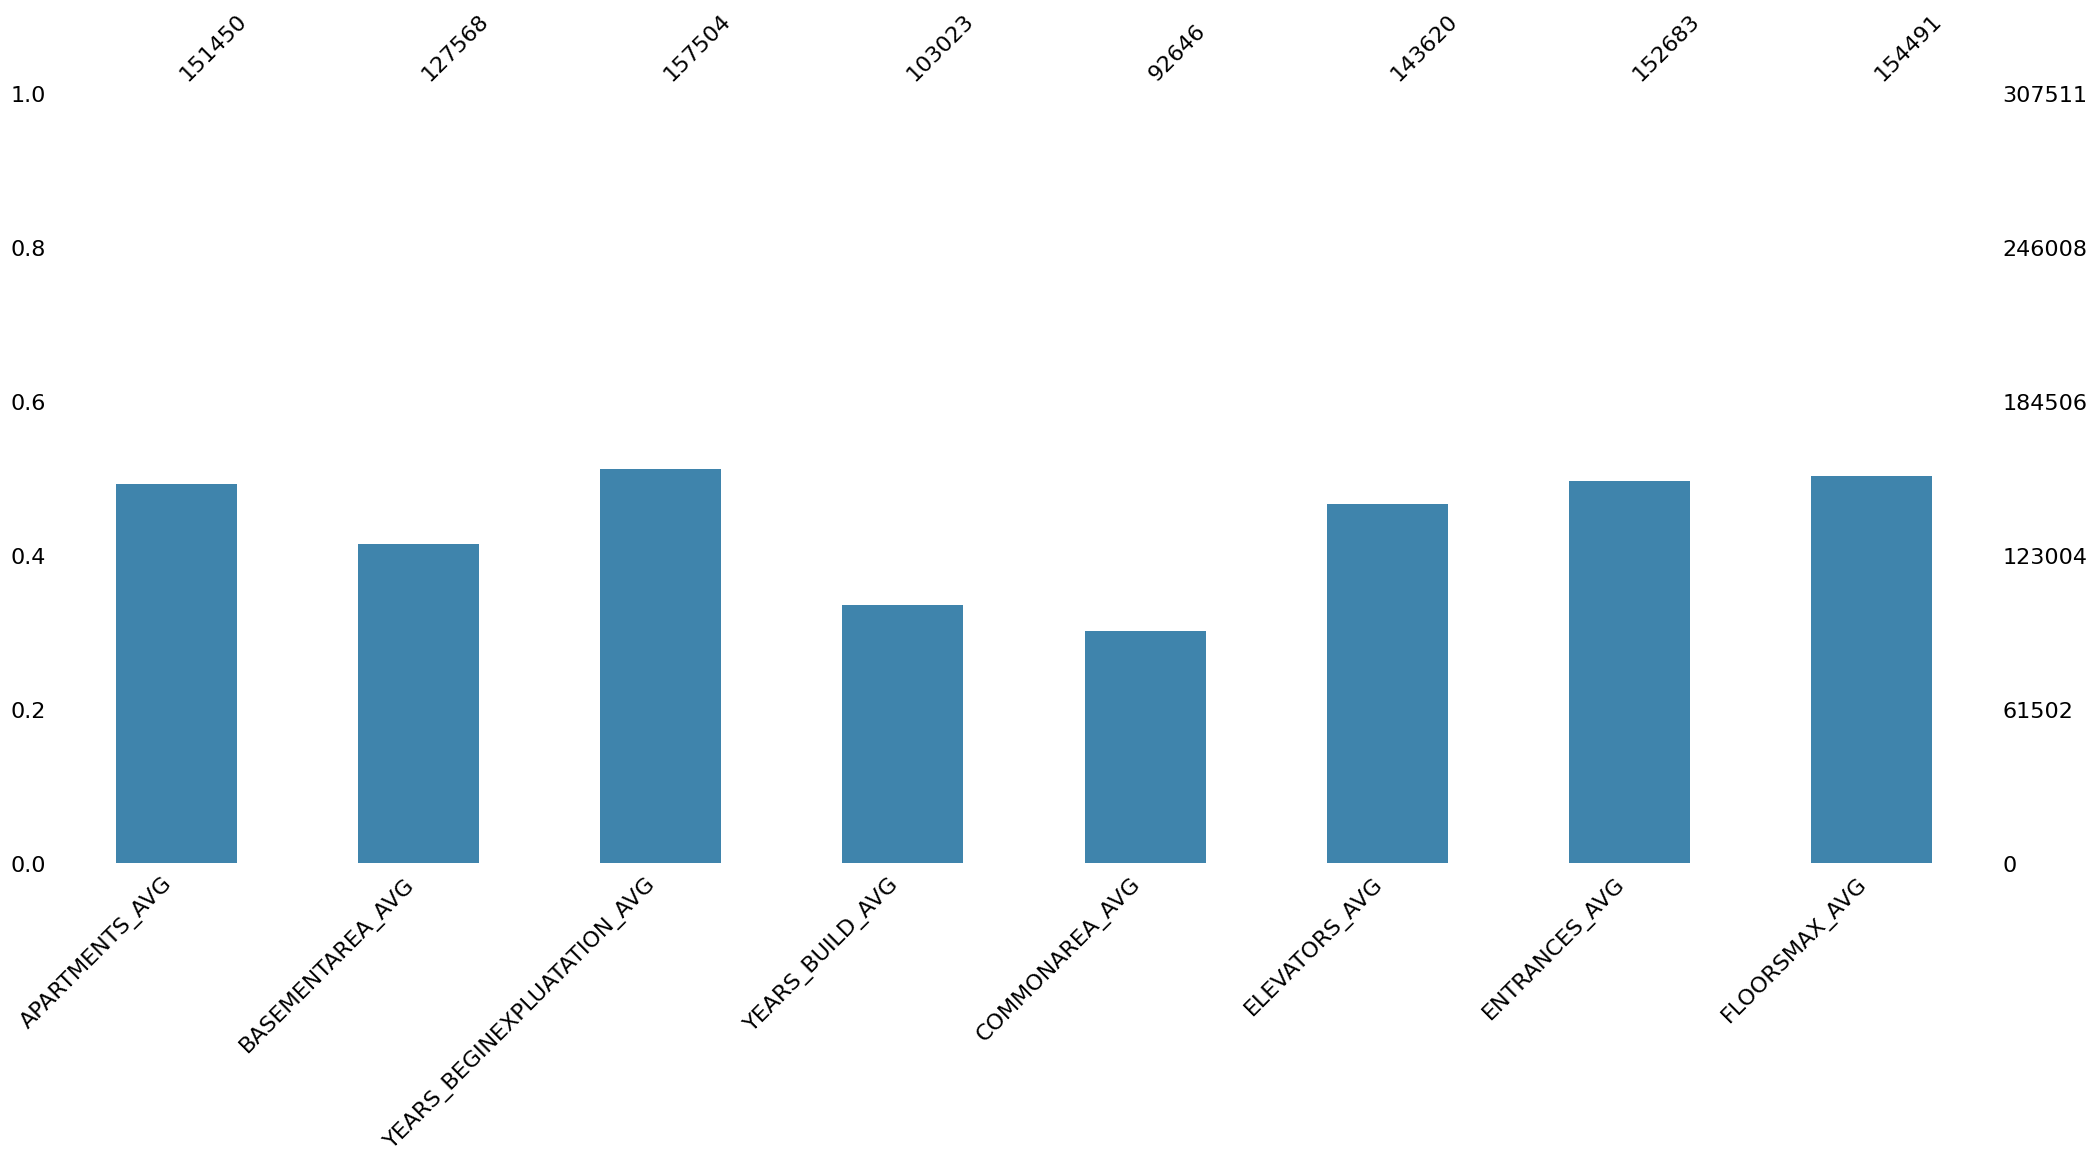

In [47]:
%matplotlib inline
missingno.bar(fifth_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

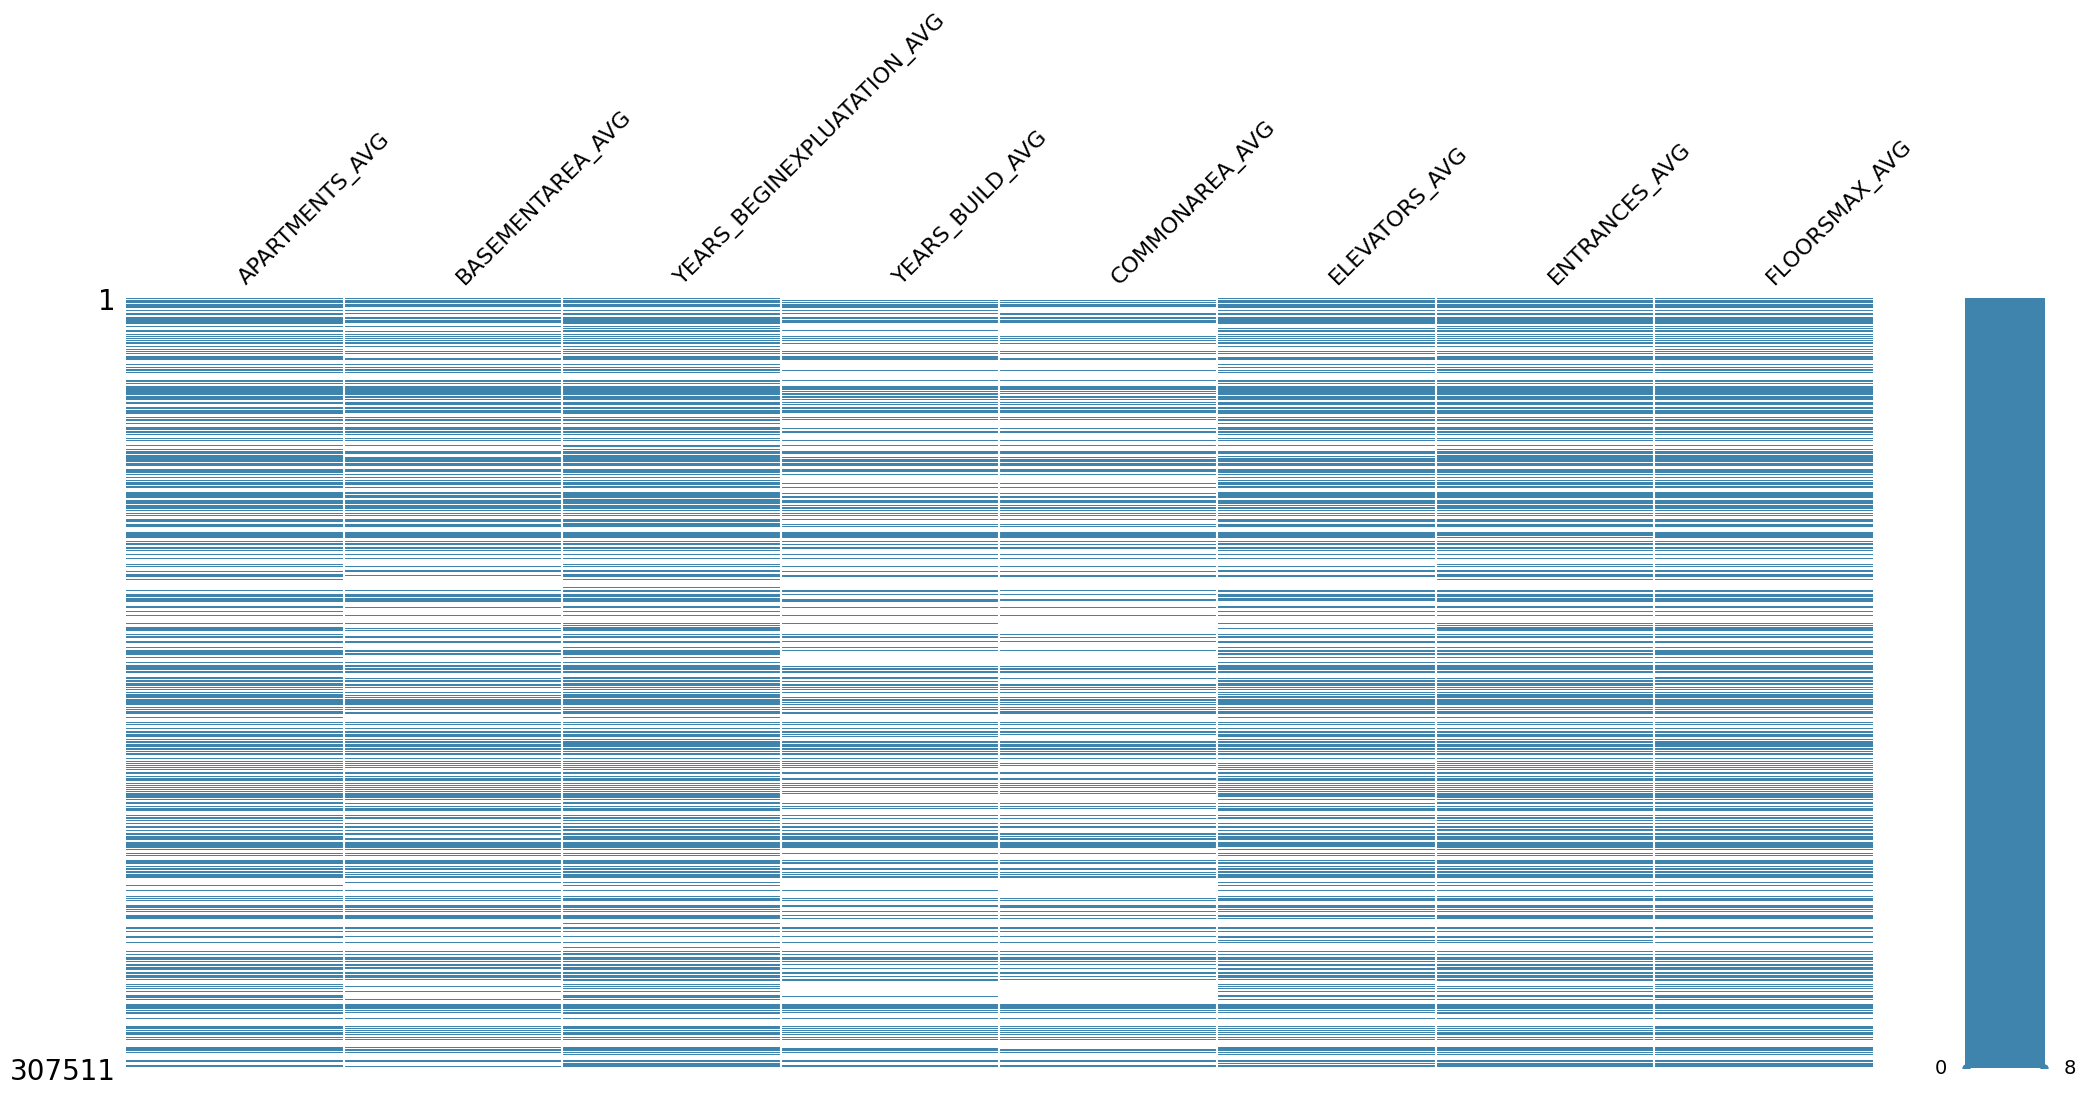

In [48]:
%matplotlib inline
missingno.matrix(fifth_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

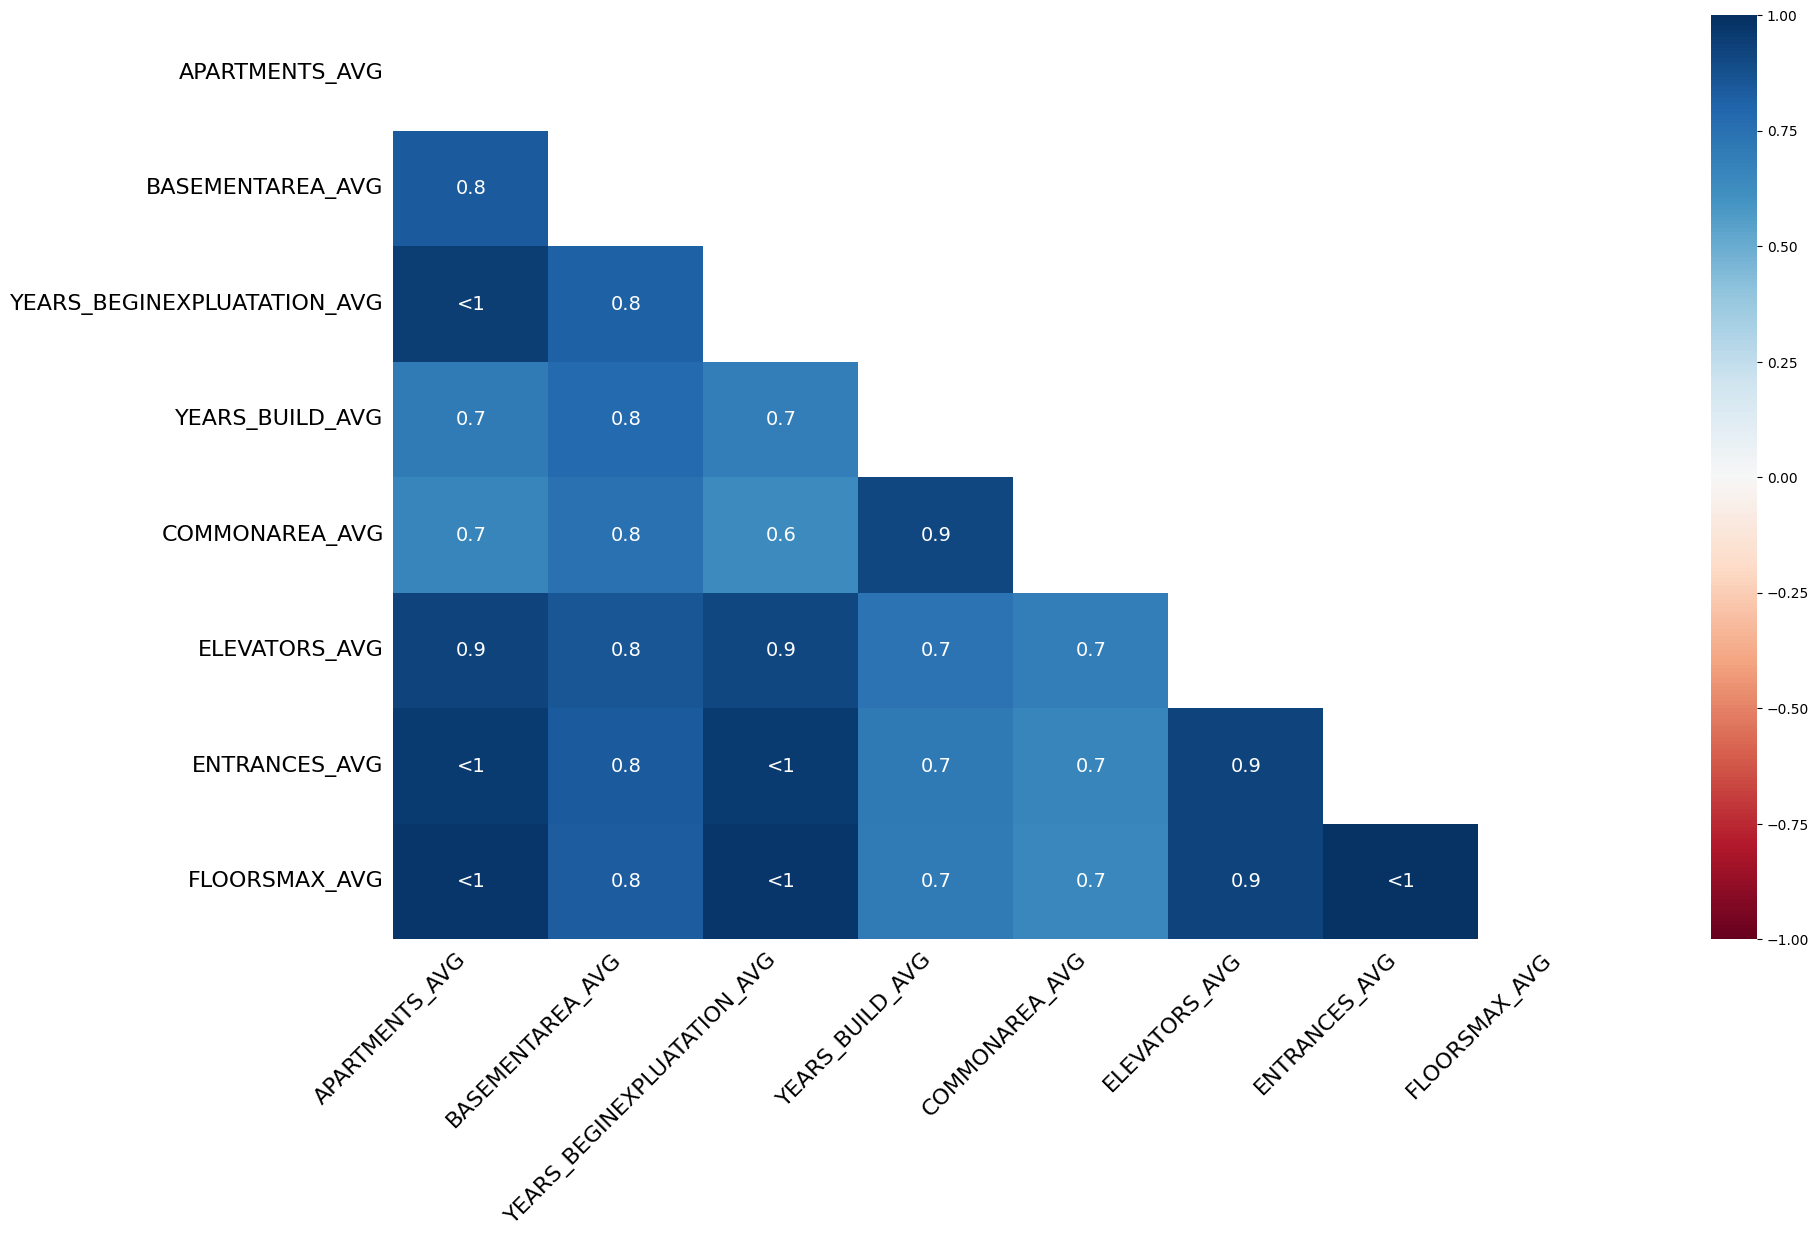

In [49]:
%matplotlib inline
missingno.heatmap(fifth_df)

<AxesSubplot: xlabel='APARTMENTS_AVG', ylabel='Count'>

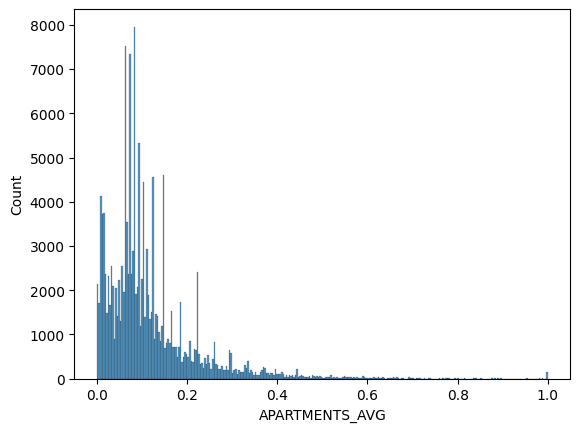

In [50]:
aux = my_vars[my_vars['Category'] == 5]
my_vars_vec = aux['Row'].to_list()
sns.histplot(df[my_vars_vec[0]])

<AxesSubplot: xlabel='BASEMENTAREA_AVG', ylabel='Count'>

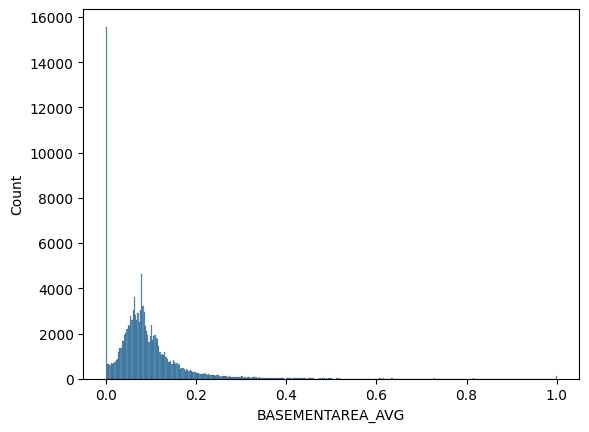

In [51]:
sns.histplot(df[my_vars_vec[1]])

<AxesSubplot: xlabel='YEARS_BEGINEXPLUATATION_AVG', ylabel='Count'>

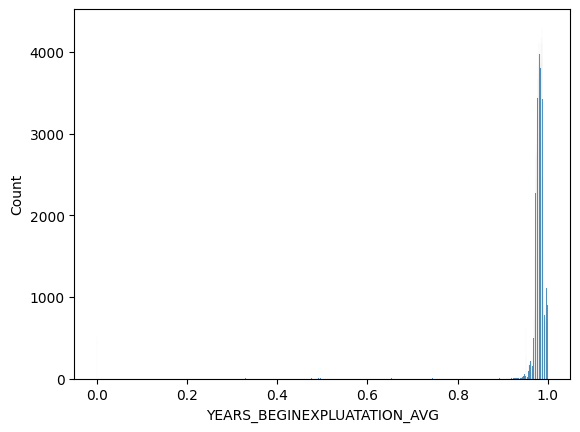

In [52]:
sns.histplot(df[my_vars_vec[2]])

<AxesSubplot: xlabel='YEARS_BUILD_AVG', ylabel='Count'>

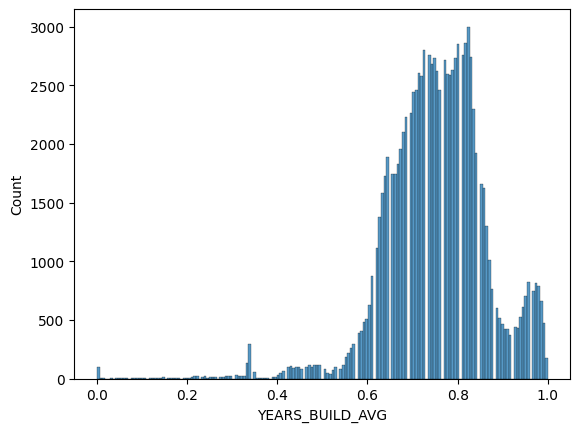

In [53]:
sns.histplot(df[my_vars_vec[3]])

<AxesSubplot: xlabel='COMMONAREA_AVG', ylabel='Count'>

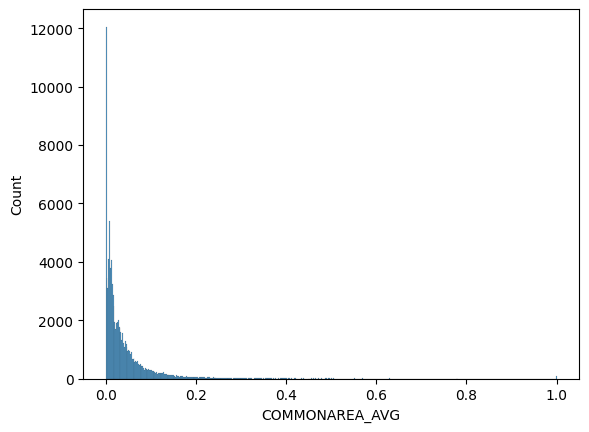

In [54]:
sns.histplot(df[my_vars_vec[4]])

<AxesSubplot: xlabel='ELEVATORS_AVG', ylabel='Count'>

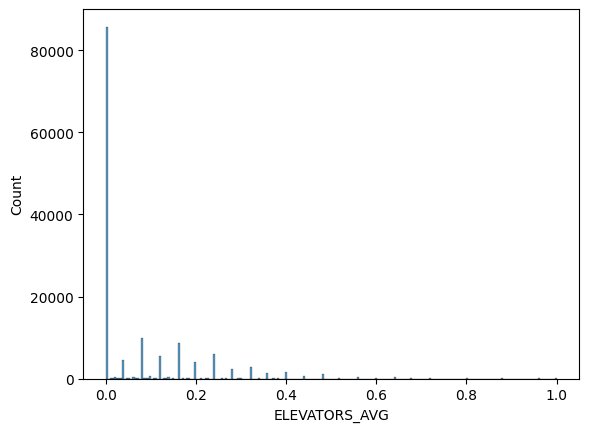

In [55]:
sns.histplot(df[my_vars_vec[5]])

<AxesSubplot: xlabel='ENTRANCES_AVG', ylabel='Count'>

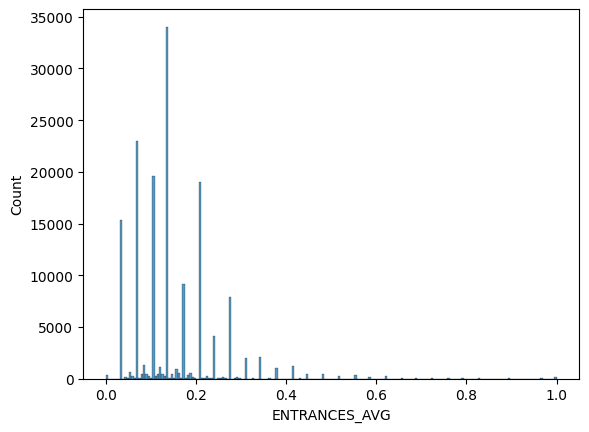

In [56]:
sns.histplot(df[my_vars_vec[6]])

<AxesSubplot: xlabel='FLOORSMAX_AVG', ylabel='Count'>

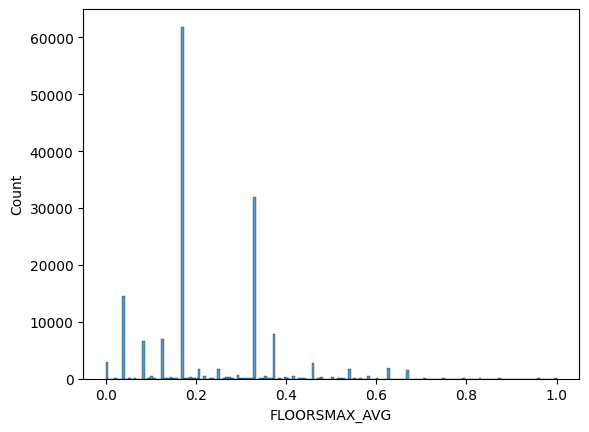

In [57]:
sns.histplot(df[my_vars_vec[7]])

In [58]:
print(data_descriptions[data_descriptions['Row'] == 'APARTMENTS_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'APARTMENTS_AVG']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'BASEMENTAREA_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'BASEMENTAREA_AVG']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'YEARS_BEGINEXPLUATATION_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'YEARS_BEGINEXPLUATATION_AVG']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'YEARS_BUILD_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'YEARS_BUILD_AVG']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'COMMONAREA_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'COMMONAREA_AVG']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'ELEVATORS_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'ELEVATORS_AVG']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'ENTRANCES_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'ENTRANCES_AVG']['Special'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'FLOORSMAX_AVG']['Description'].to_list())
print(data_descriptions[data_descriptions['Row'] == 'FLOORSMAX_AVG']['Special'].to_list())

['Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor']
['normalized']
['Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor']
['normalized']
['Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor']
['normalized']
['Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suff

In [59]:
sixth_df = fifth_df.copy()
sixth_df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].copy()
sixth_df['FLAG_OWN_REALTY'].replace(to_replace='N',value=np.nan, inplace=True)

<AxesSubplot: >

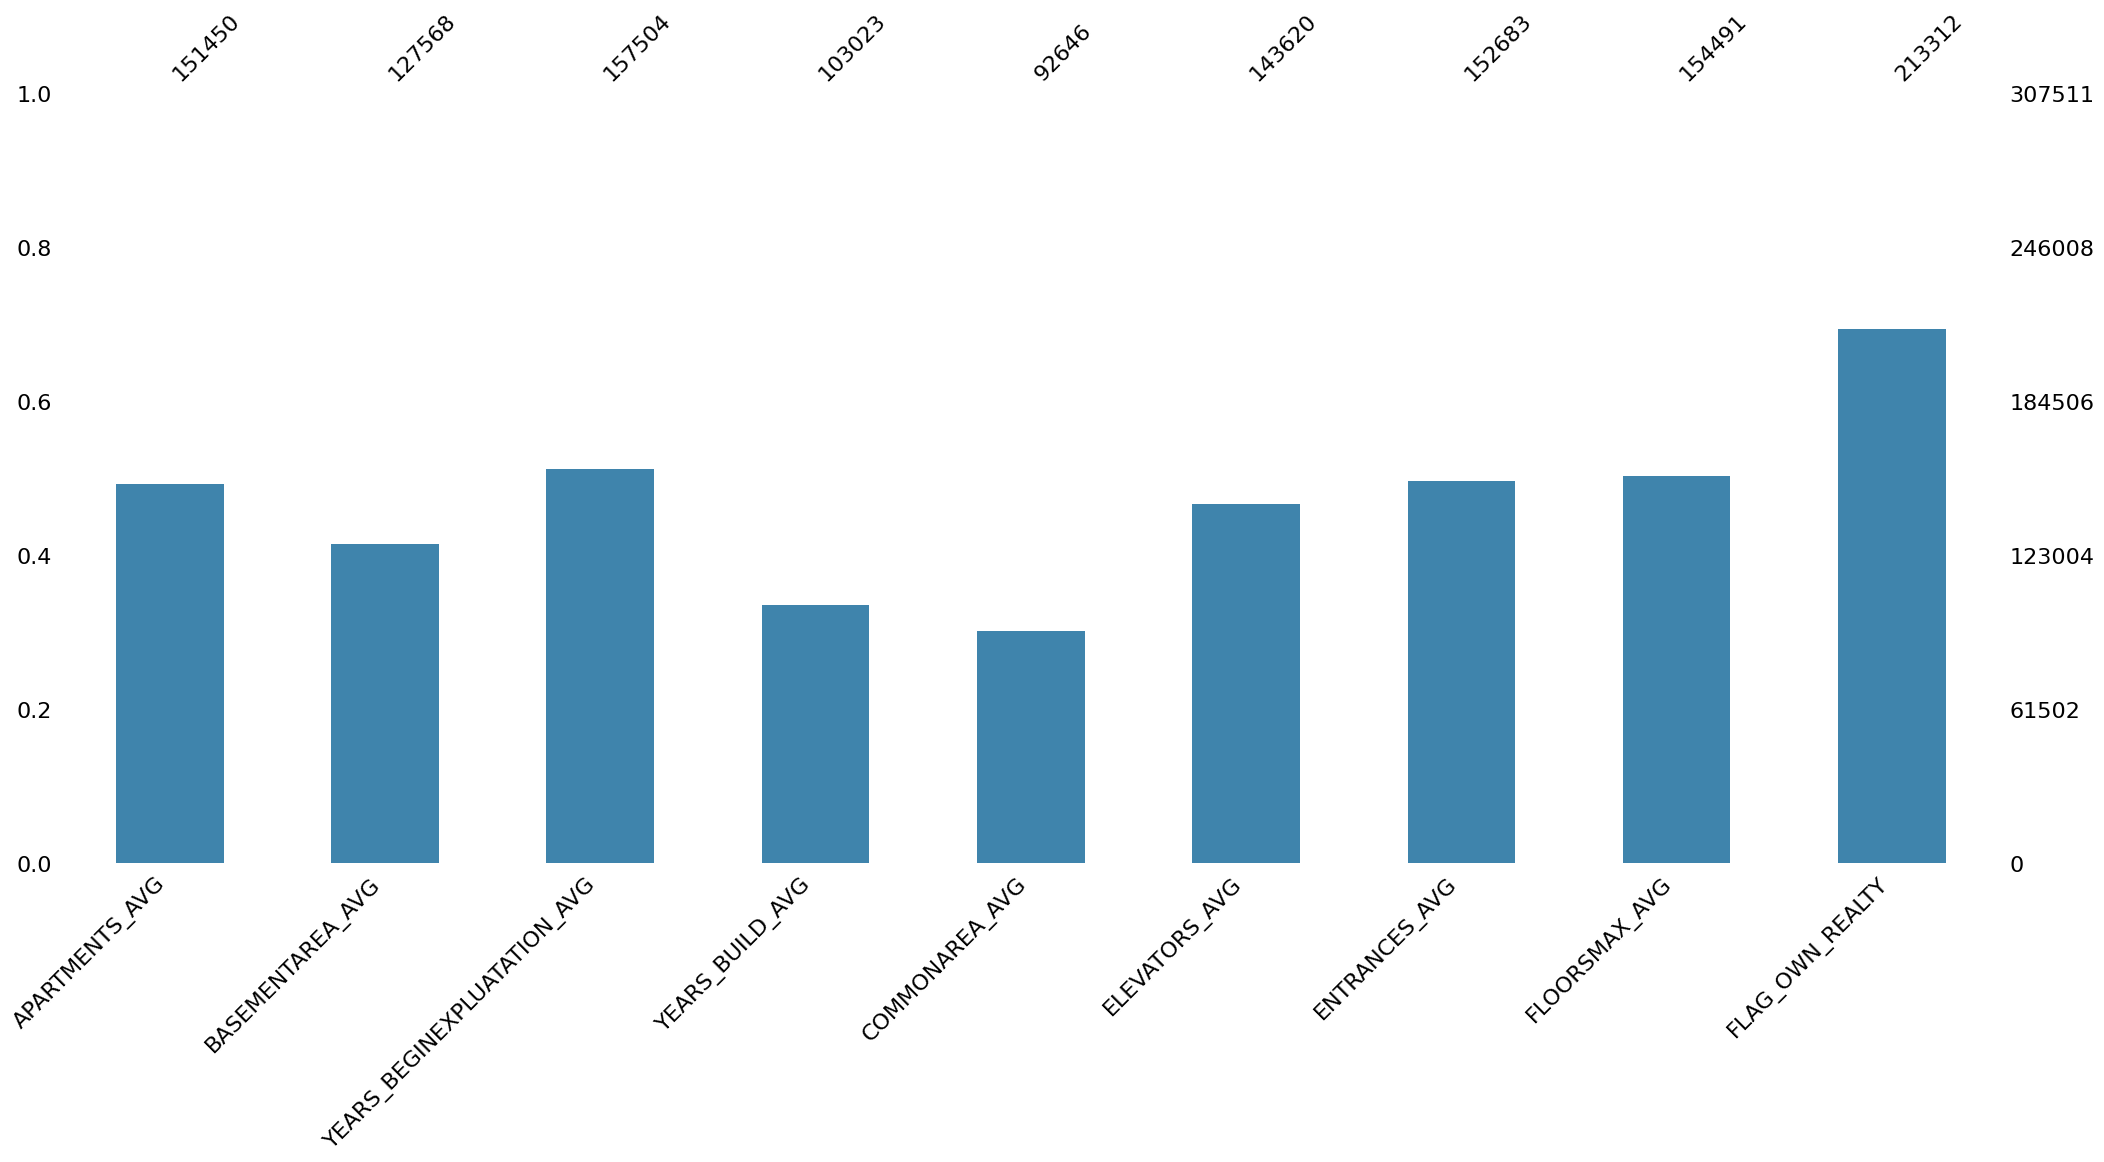

In [60]:
%matplotlib inline
missingno.bar(sixth_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

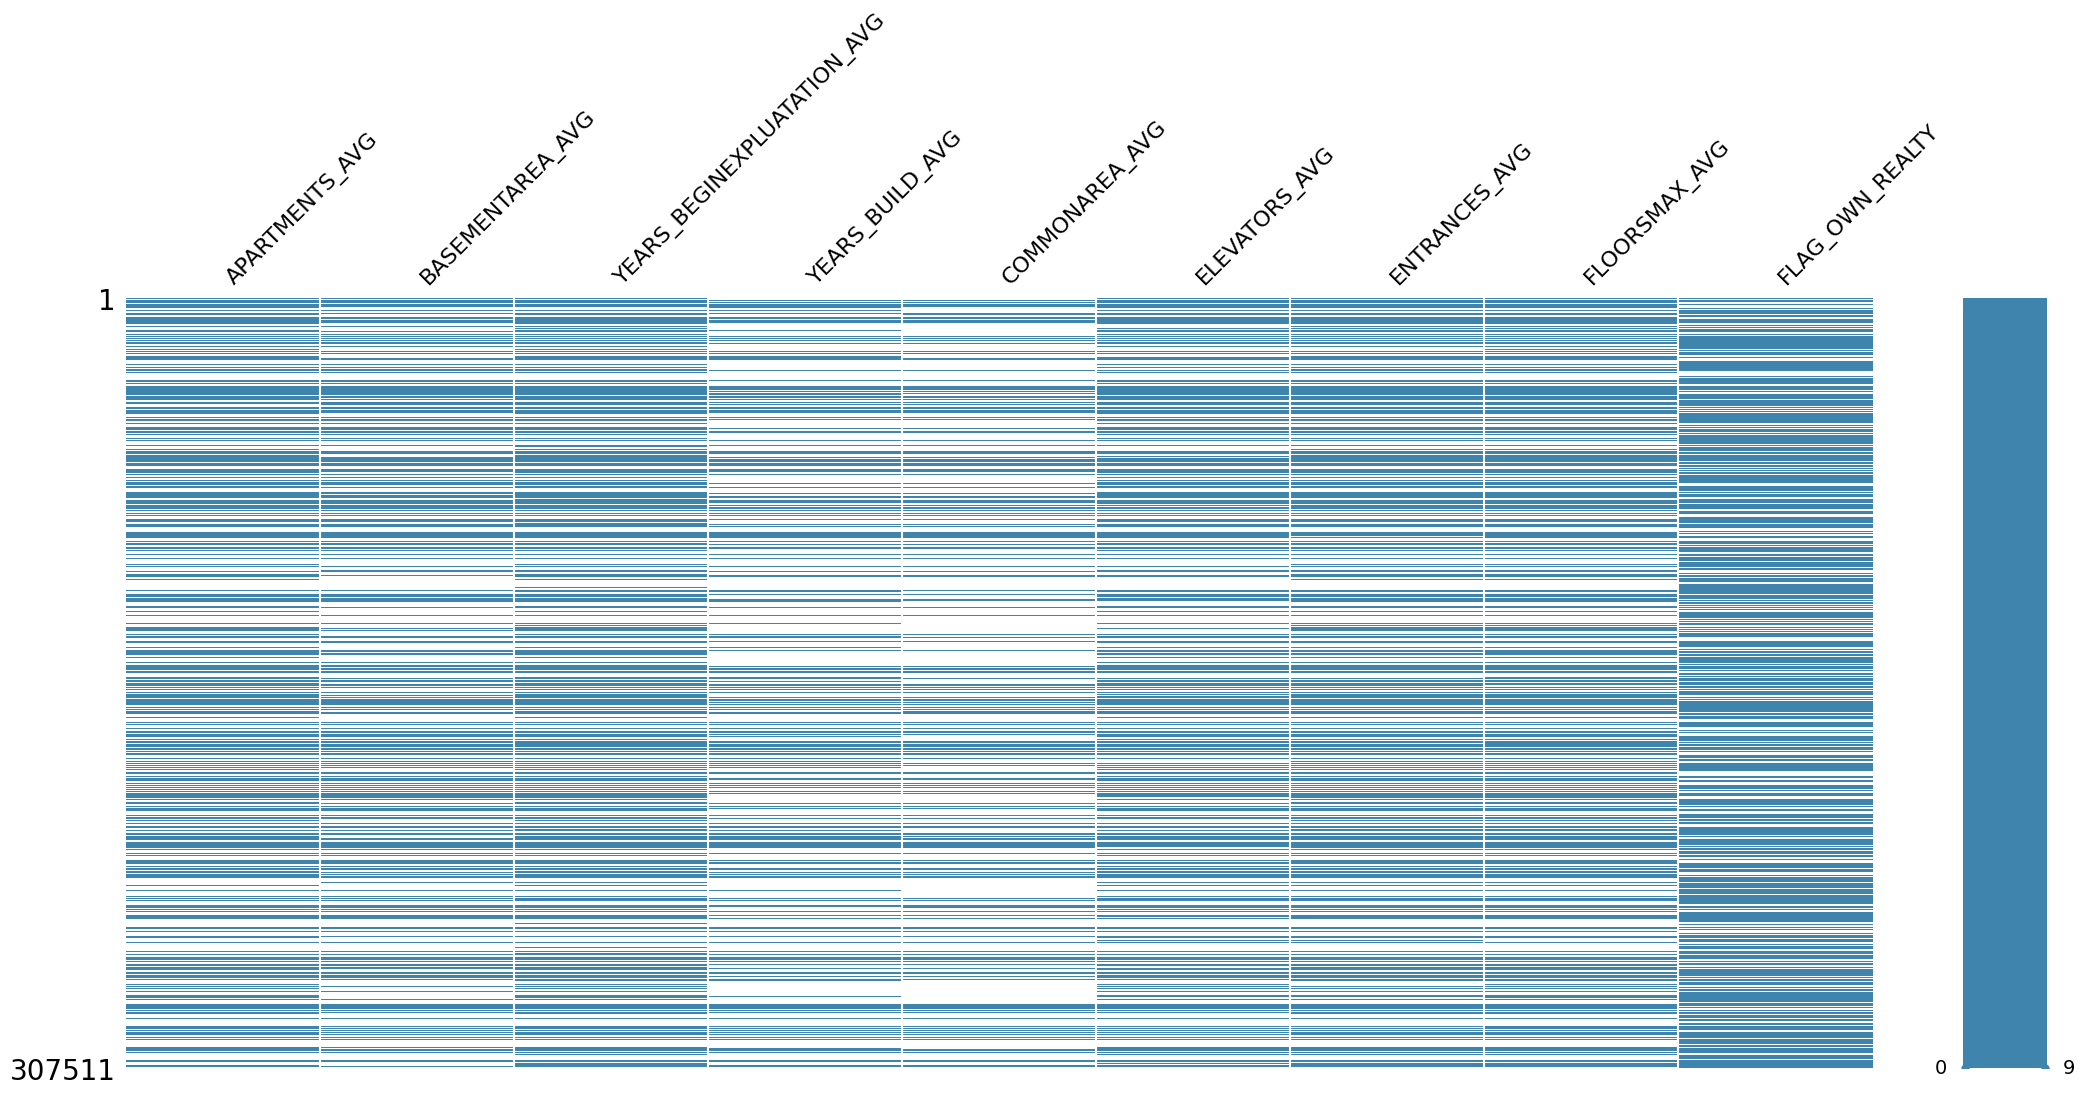

In [61]:
%matplotlib inline
missingno.matrix(sixth_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

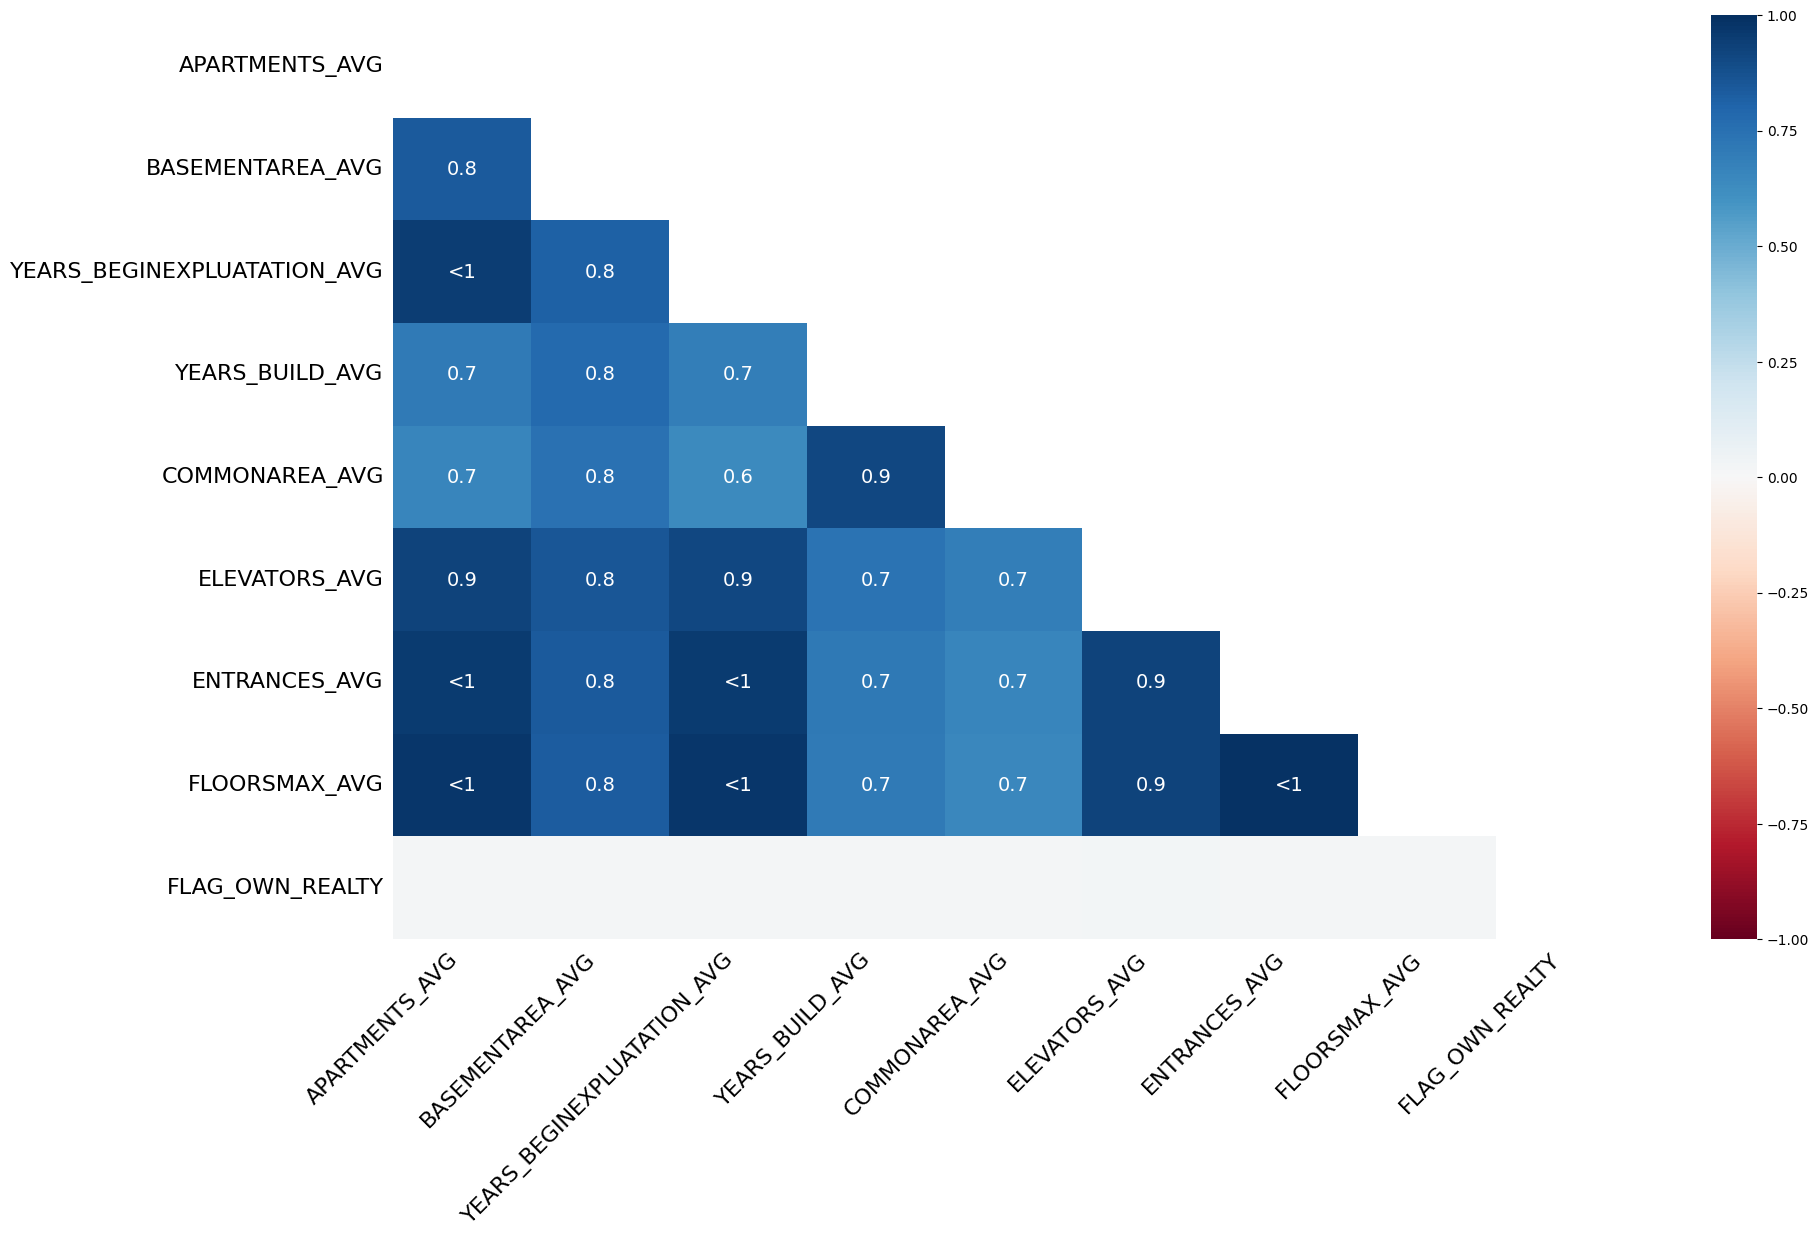

In [62]:
%matplotlib inline
missingno.heatmap(sixth_df)

A quanto pare non c'è legame tra FLAG_OWN_REALTY e queste variabili relative al luogo di abitazione

In [63]:
sixth_df[sixth_df['FLAG_OWN_REALTY'].isna()]

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
1               0.0959            0.0529                       0.9851   
13              0.1474            0.0973                       0.9806   
16                 NaN               NaN                          NaN   
22              0.0907            0.0795                       0.9786   
24              0.1433            0.1455                       0.9861   
...                ...               ...                          ...   
307494             NaN               NaN                          NaN   
307495          0.0742               NaN                       0.9871   
307496             NaN               NaN                          NaN   
307506          0.2021            0.0887                       0.9876   
307510          0.0742            0.0526                       0.9881   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
1                0.7960          0.0605           0.08         0.0345   
13               0.7348          0.0582           0.16         0.1379   
16                  NaN             NaN            NaN            NaN   
22               0.7076          0.0120           0.00         0.2069   
24               0.8096          0.0212           0.00         0.3103   
...                 ...             ...            ...            ...   
307494              NaN             NaN            NaN            NaN   
307495              NaN          0.0136           0.08         0.0690   
307496              NaN             NaN            NaN            NaN   
307506           0.8300          0.0202           0.22         0.1034   
307510              NaN          0.0176           0.08         0.0690   

        FLOORSMAX_AVG FLAG_OWN_REALTY  
1              0.2917             NaN  
13             0.3333             NaN  
16                NaN             NaN  
22             0.1667             NaN  
24             0.1667             NaN  
...               ...             ...  
307494            NaN             NaN  
307495         0.3333             NaN  
307496            NaN             NaN  
307506         0.6042             NaN  
307510         0.3750             NaN  

[94199 rows x 9 columns]

Boh provo intanto a togliere tutte le righe in cui sono presenti tutti NaN relativi alle colonne relative al luogo di abitazione

In [64]:
df_vars_abitazione = data_descriptions[(data_descriptions['Unnamed: 0'] >= 47) & (data_descriptions['Unnamed: 0'] <= 93)]
vars_abitazione = df_vars_abitazione['Row'].to_list()

In [65]:
df_abitazione = df[vars_abitazione]
print(len(df_abitazione[df_abitazione.isna().all(axis=1)]))
df_abitazione = df_abitazione[df_abitazione.notna().any(axis=1)]
aux = my_vars[my_vars['Category'] == 5]
my_vars_vec = aux['Row'].to_list()
seventh_df = df_abitazione[my_vars_vec].copy()
seventh_df

145755


APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0               0.0247            0.0369                       0.9722   
1               0.0959            0.0529                       0.9851   
12              0.0825               NaN                       0.9811   
13              0.1474            0.0973                       0.9806   
14              0.3495            0.1335                       0.9985   
...                ...               ...                          ...   
307506          0.2021            0.0887                       0.9876   
307507          0.0247            0.0435                       0.9727   
307508          0.1031            0.0862                       0.9816   
307509          0.0124               NaN                       0.9771   
307510          0.0742            0.0526                       0.9881   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0                0.6192          0.0143           0.00         0.0690   
1                0.7960          0.0605           0.08         0.0345   
12                  NaN             NaN           0.00         0.2069   
13               0.7348          0.0582           0.16         0.1379   
14               0.9796          0.1143           0.40         0.1724   
...                 ...             ...            ...            ...   
307506           0.8300          0.0202           0.22         0.1034   
307507           0.6260          0.0022           0.00         0.1034   
307508           0.7484          0.0123           0.00         0.2069   
307509              NaN             NaN            NaN         0.0690   
307510              NaN          0.0176           0.08         0.0690   

        FLOORSMAX_AVG  
0              0.0833  
1              0.2917  
12             0.1667  
13             0.3333  
14             0.6667  
...               ...  
307506         0.6042  
307507         0.0833  
307508         0.1667  
307509         0.0417  
307510         0.3750  

[161756 rows x 8 columns]

Ci sono 145755 entrate in cui tutte le variabili relative all'abitazione di residenza (non solo quelle datemi dalla suddivisione) sono NaN

<AxesSubplot: >

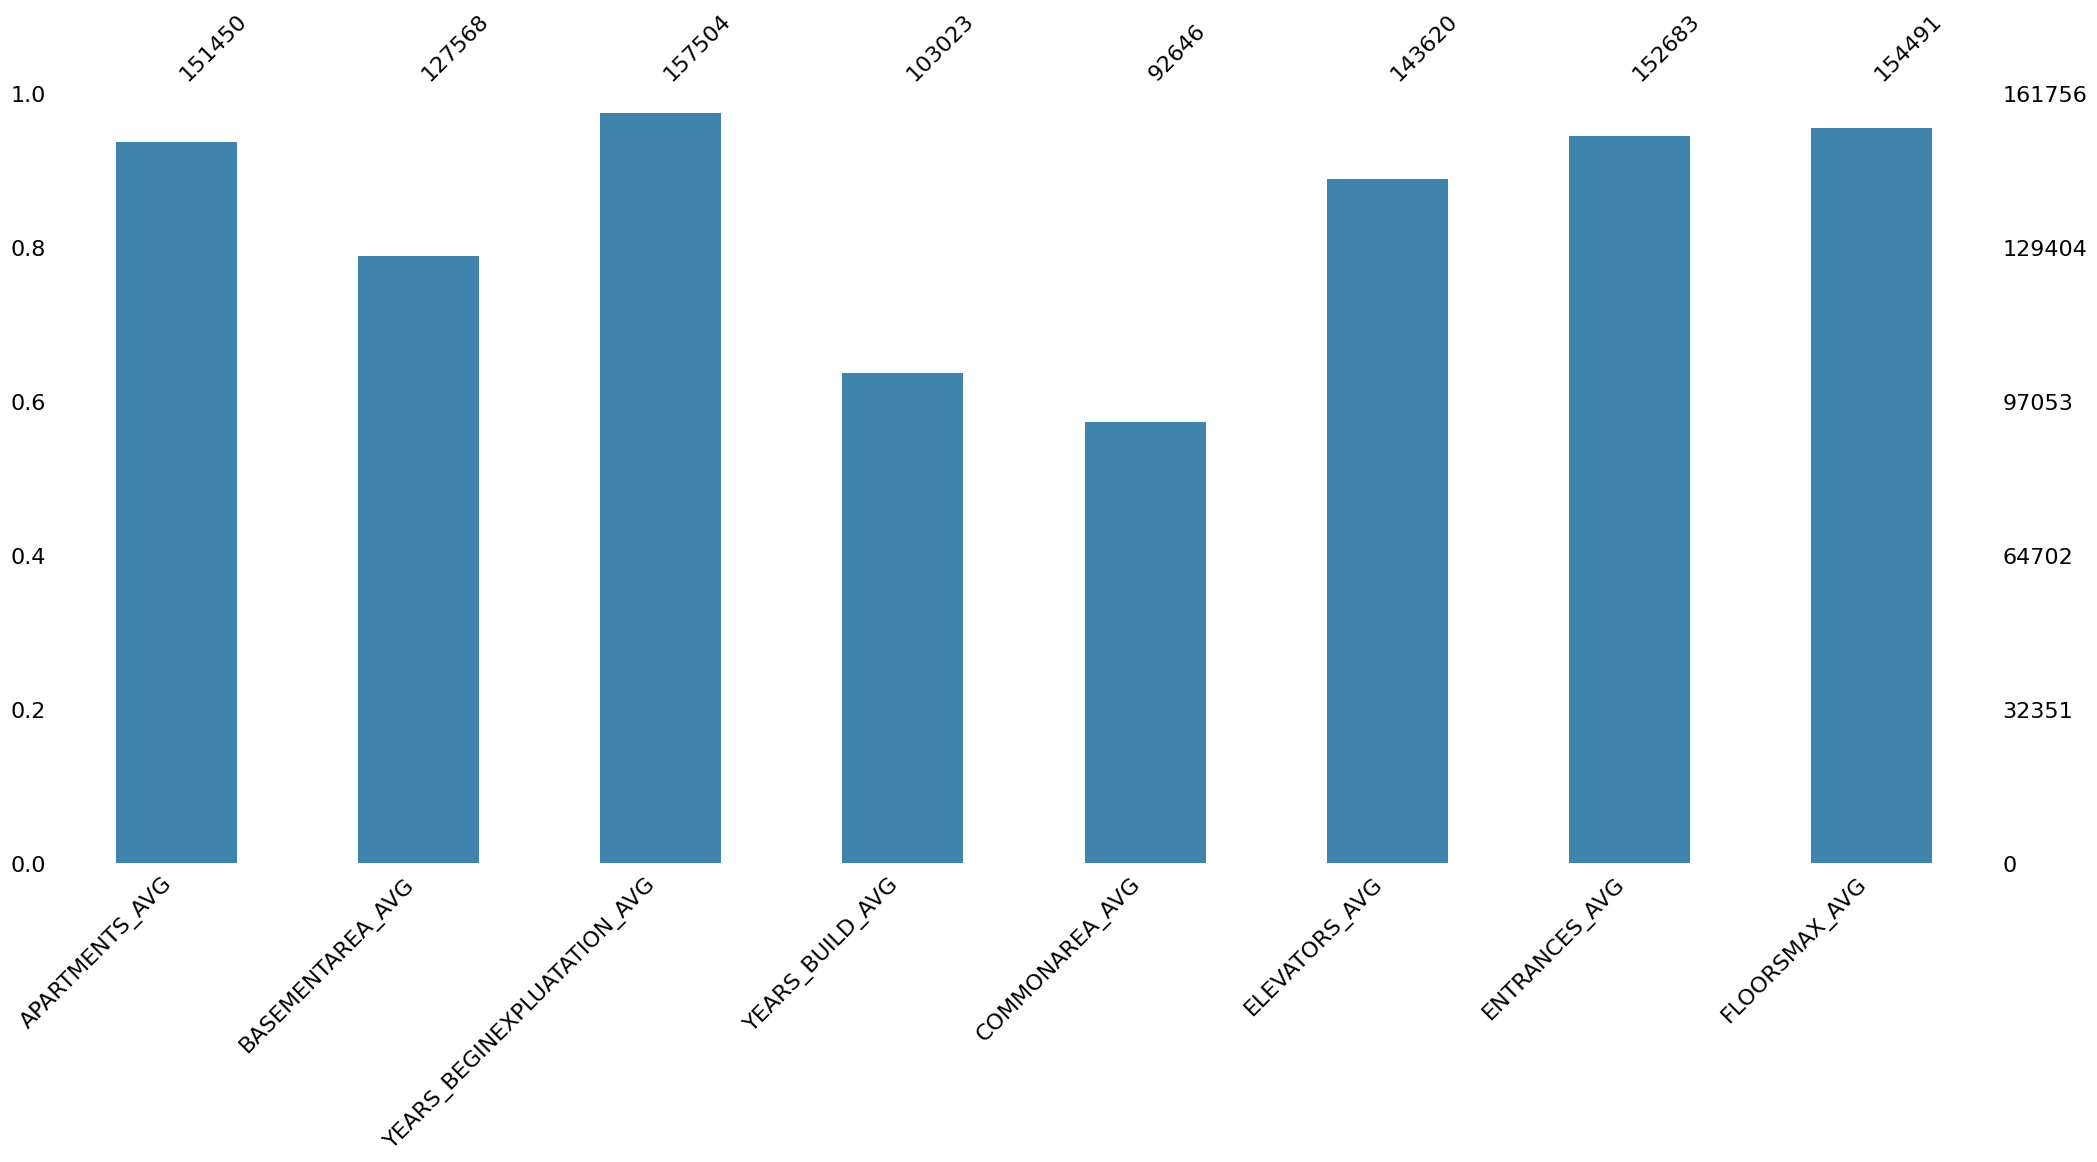

In [66]:
%matplotlib inline
missingno.bar(seventh_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

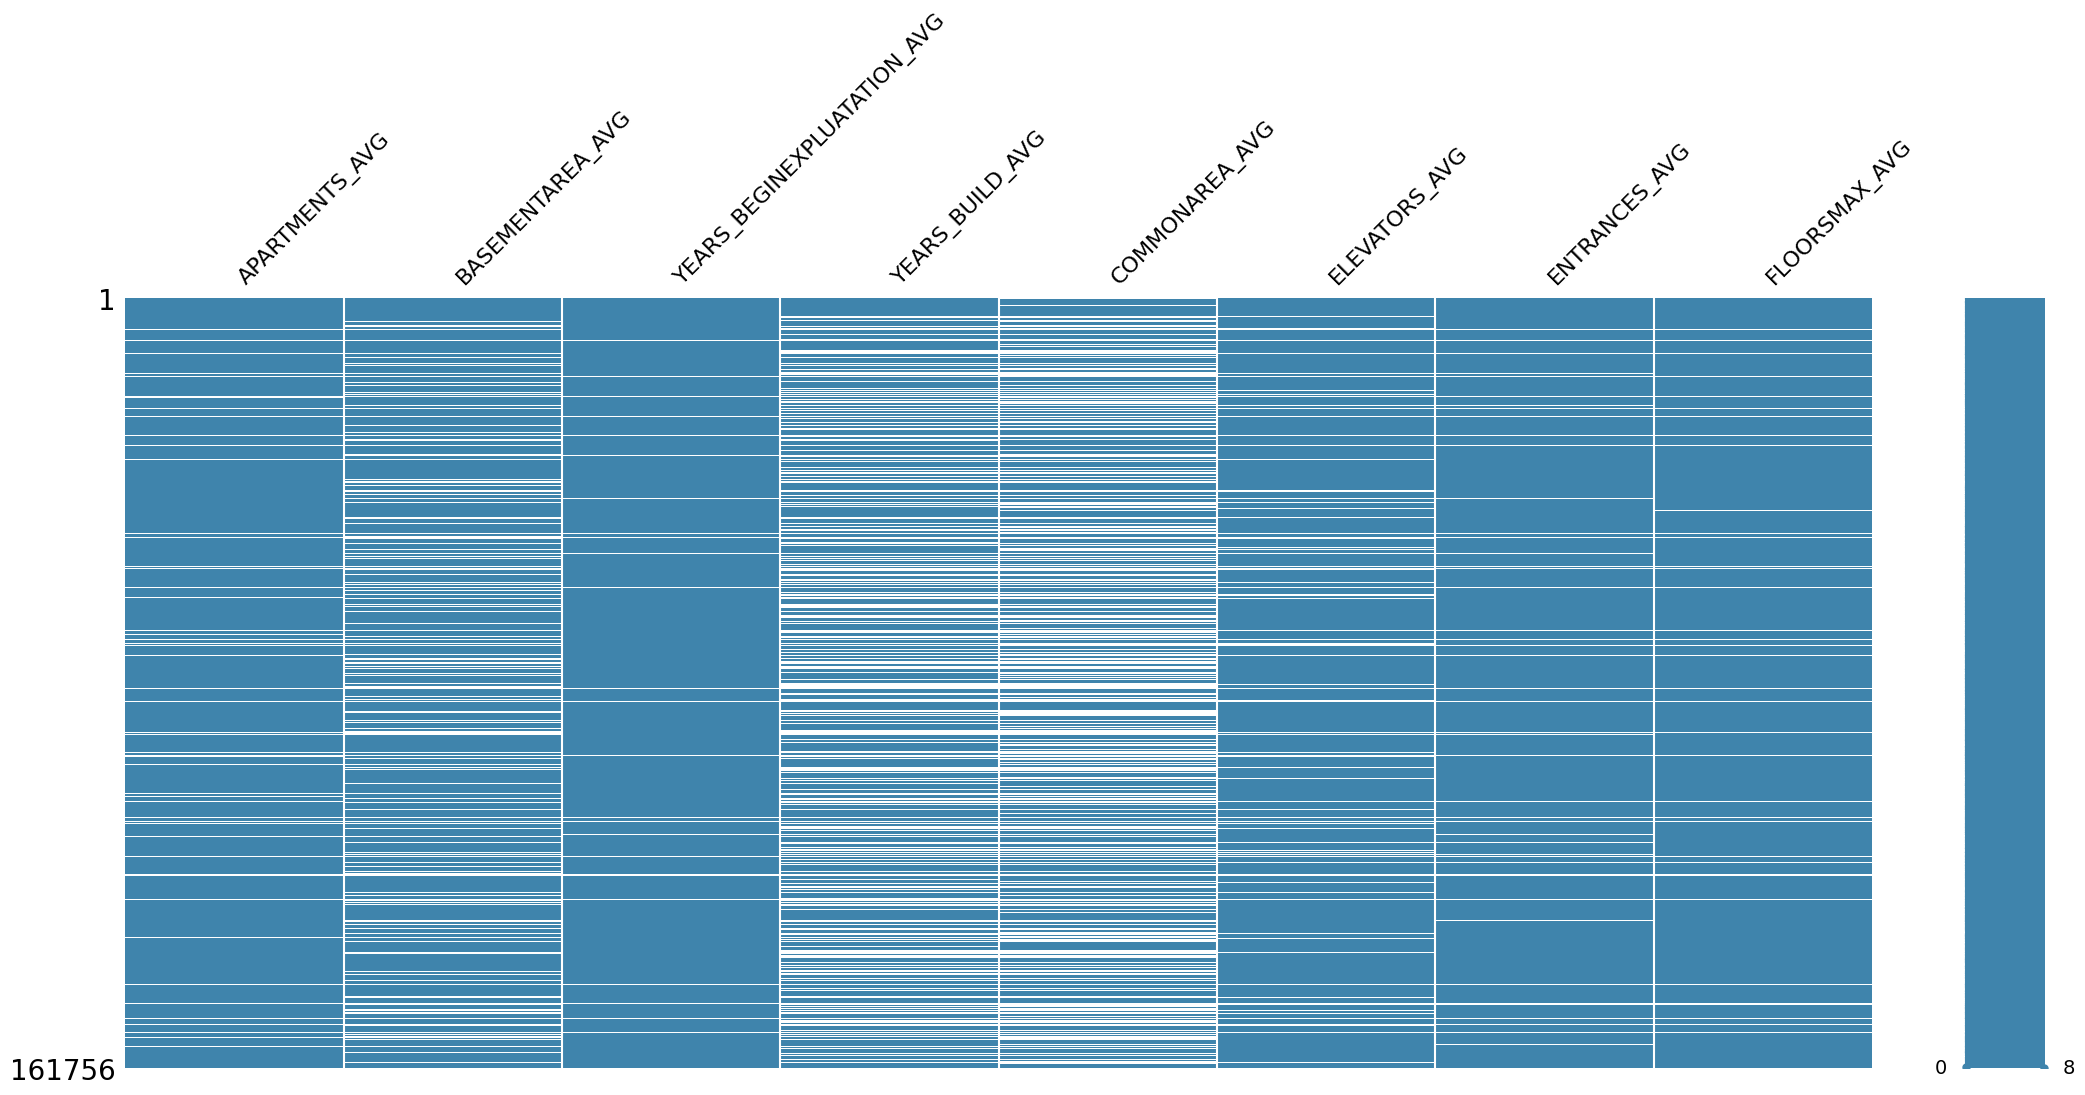

In [67]:
%matplotlib inline
missingno.matrix(seventh_df, color=(63/255,132/255,172/255))

<AxesSubplot: >

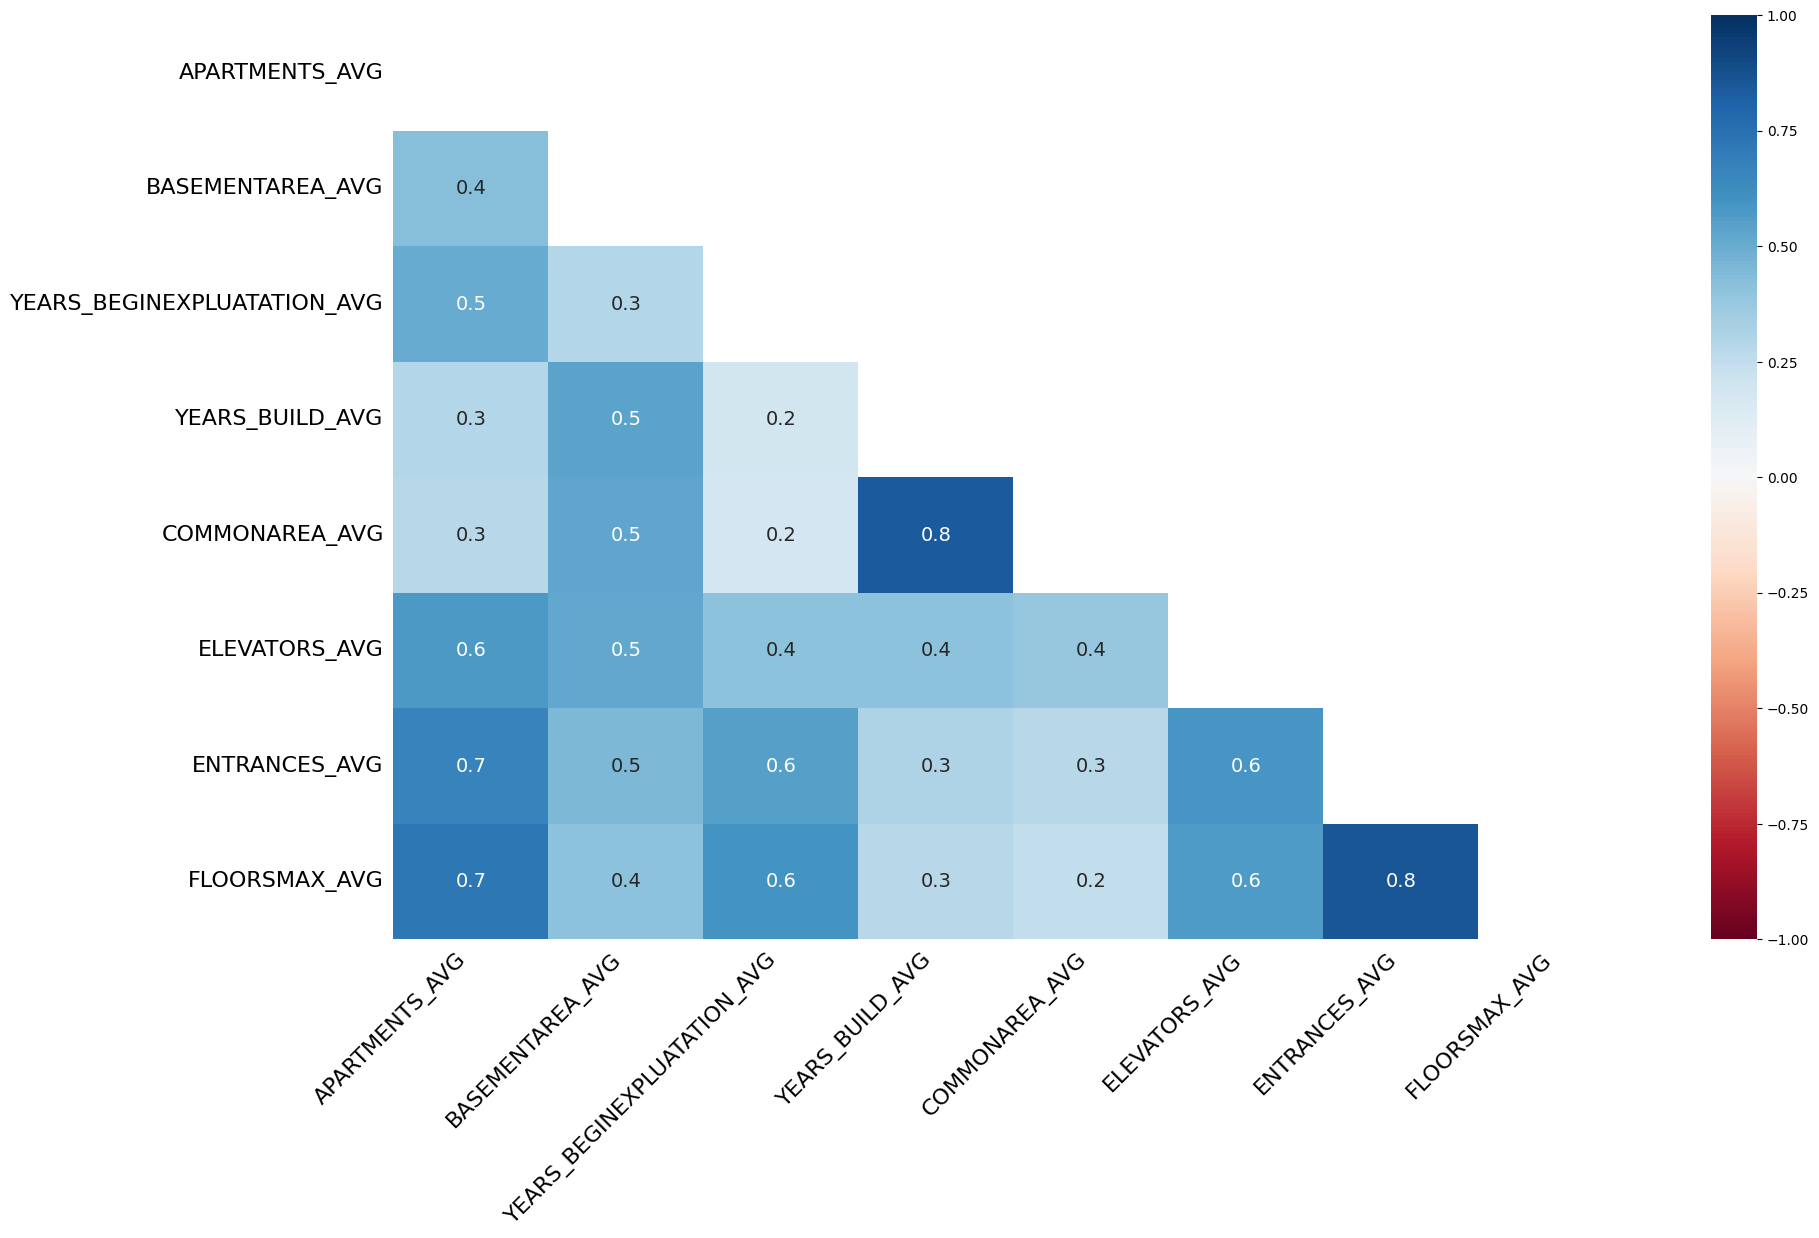

In [68]:
%matplotlib inline
missingno.heatmap(seventh_df)

Francamente ha senso su questo fare i plot anche considerando tutte le altre variabili relative all'abitazione

In [69]:
df_vars_abitazione = data_descriptions[(data_descriptions['Unnamed: 0'] >= 47) & (data_descriptions['Unnamed: 0'] <= 93)]
vars_abitazione = df_vars_abitazione['Row'].to_list()
df_abitazione = df[vars_abitazione]
print(len(df_abitazione[df_abitazione.isna().all(axis=1)]))
df_abitazione = df_abitazione[df_abitazione.notna().any(axis=1)]

145755


<AxesSubplot: >

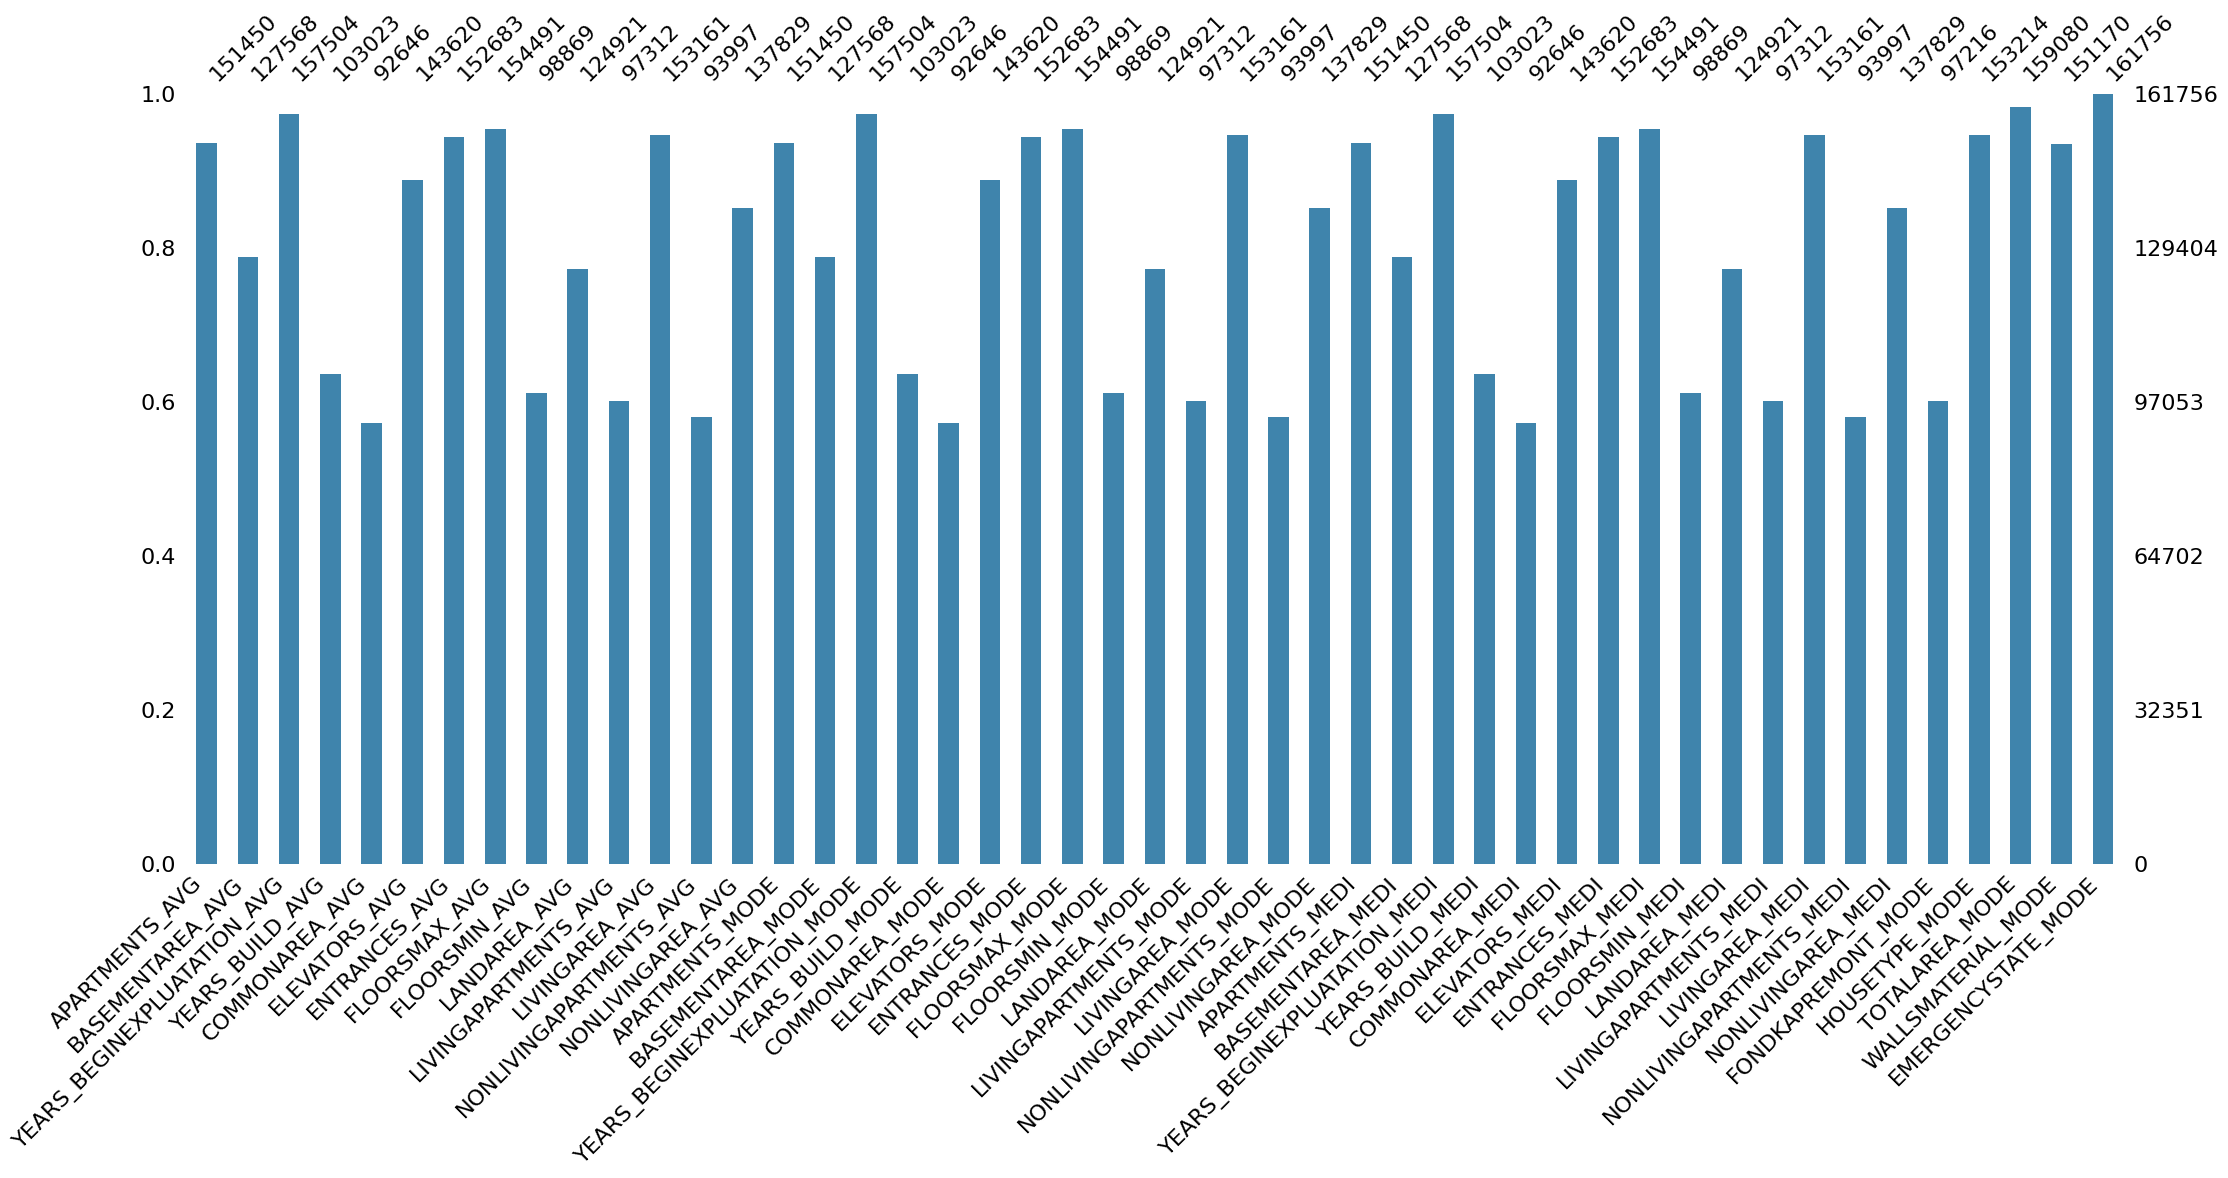

In [70]:
%matplotlib inline
missingno.bar(df_abitazione, color=(63/255,132/255,172/255))

<AxesSubplot: >

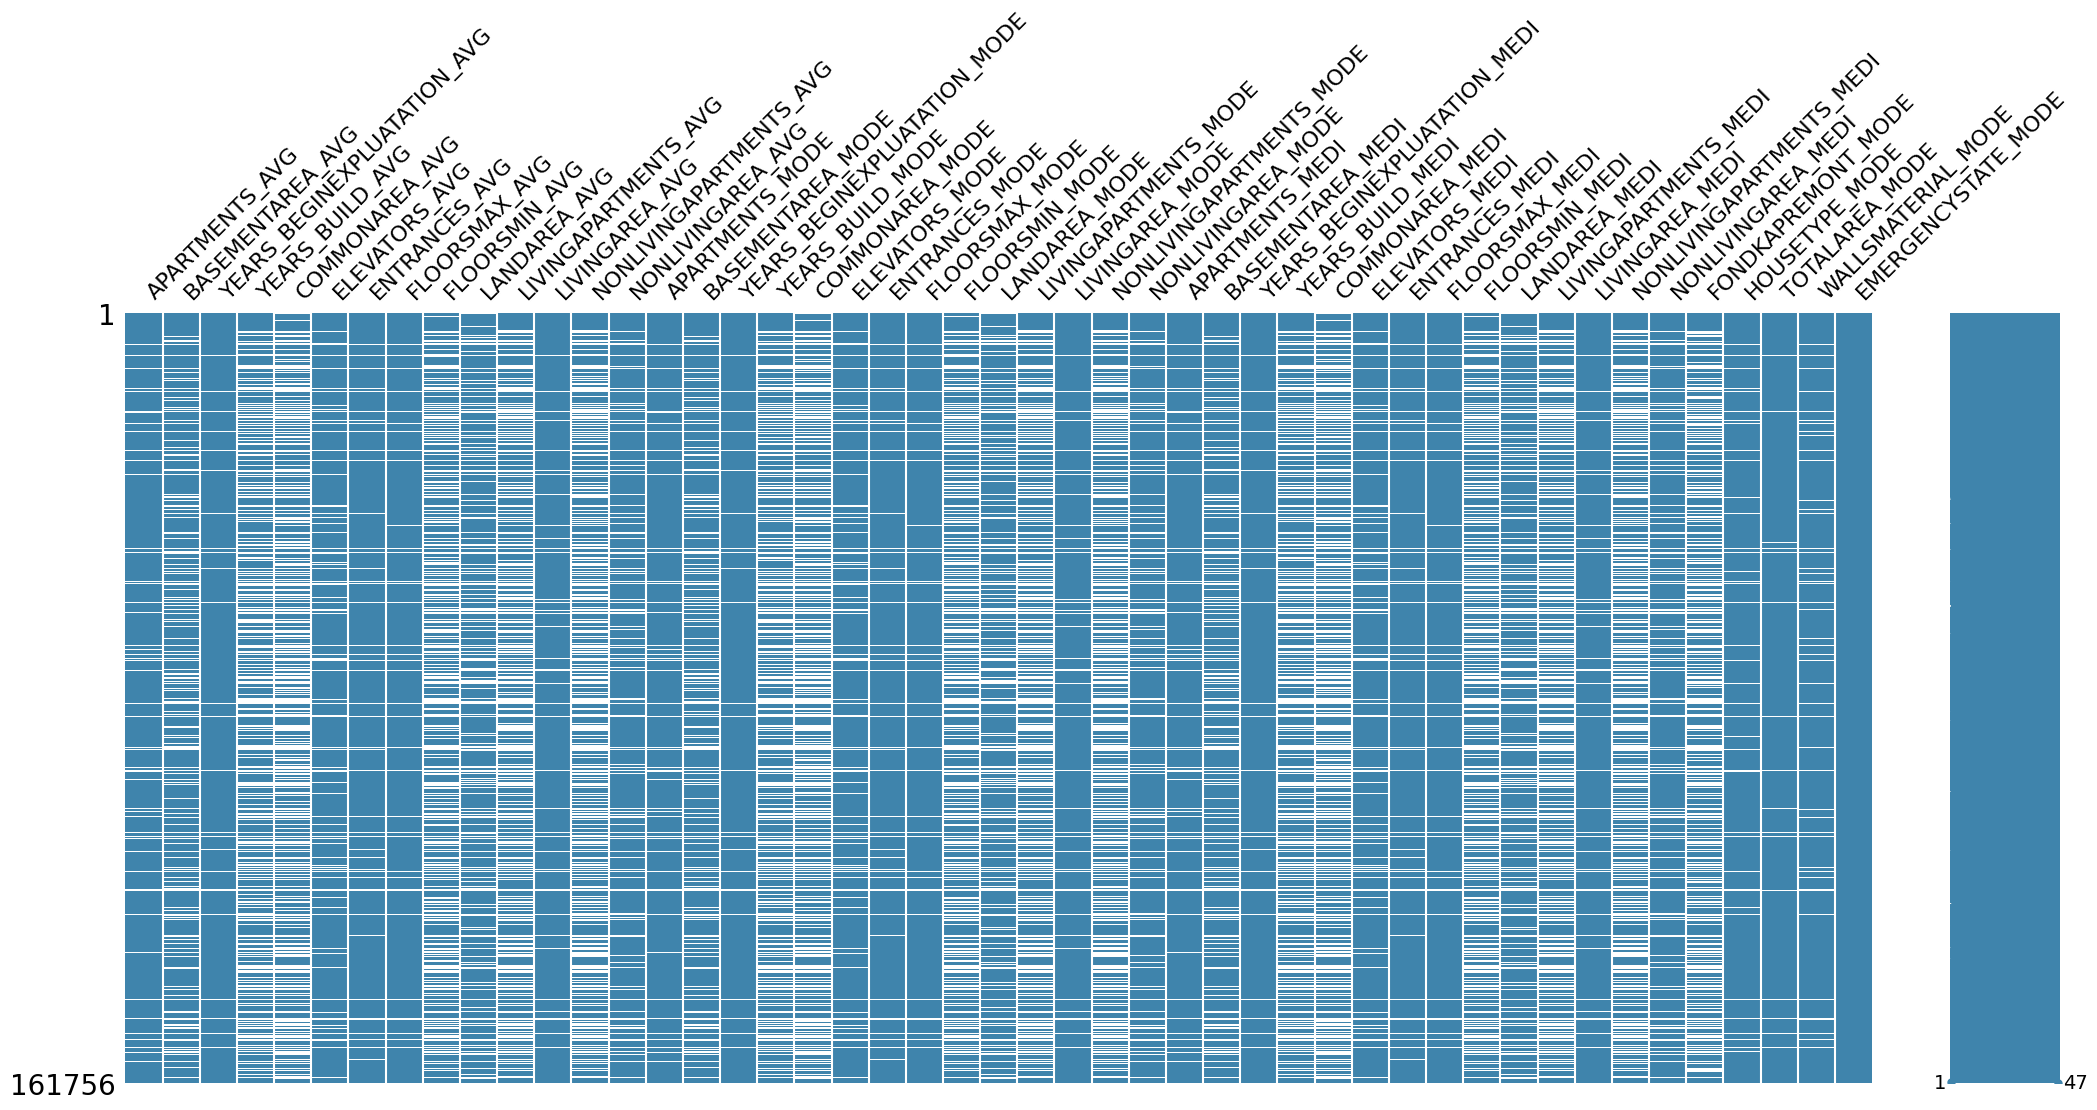

In [71]:
%matplotlib inline
missingno.matrix(df_abitazione, color=(63/255,132/255,172/255))

<AxesSubplot: >

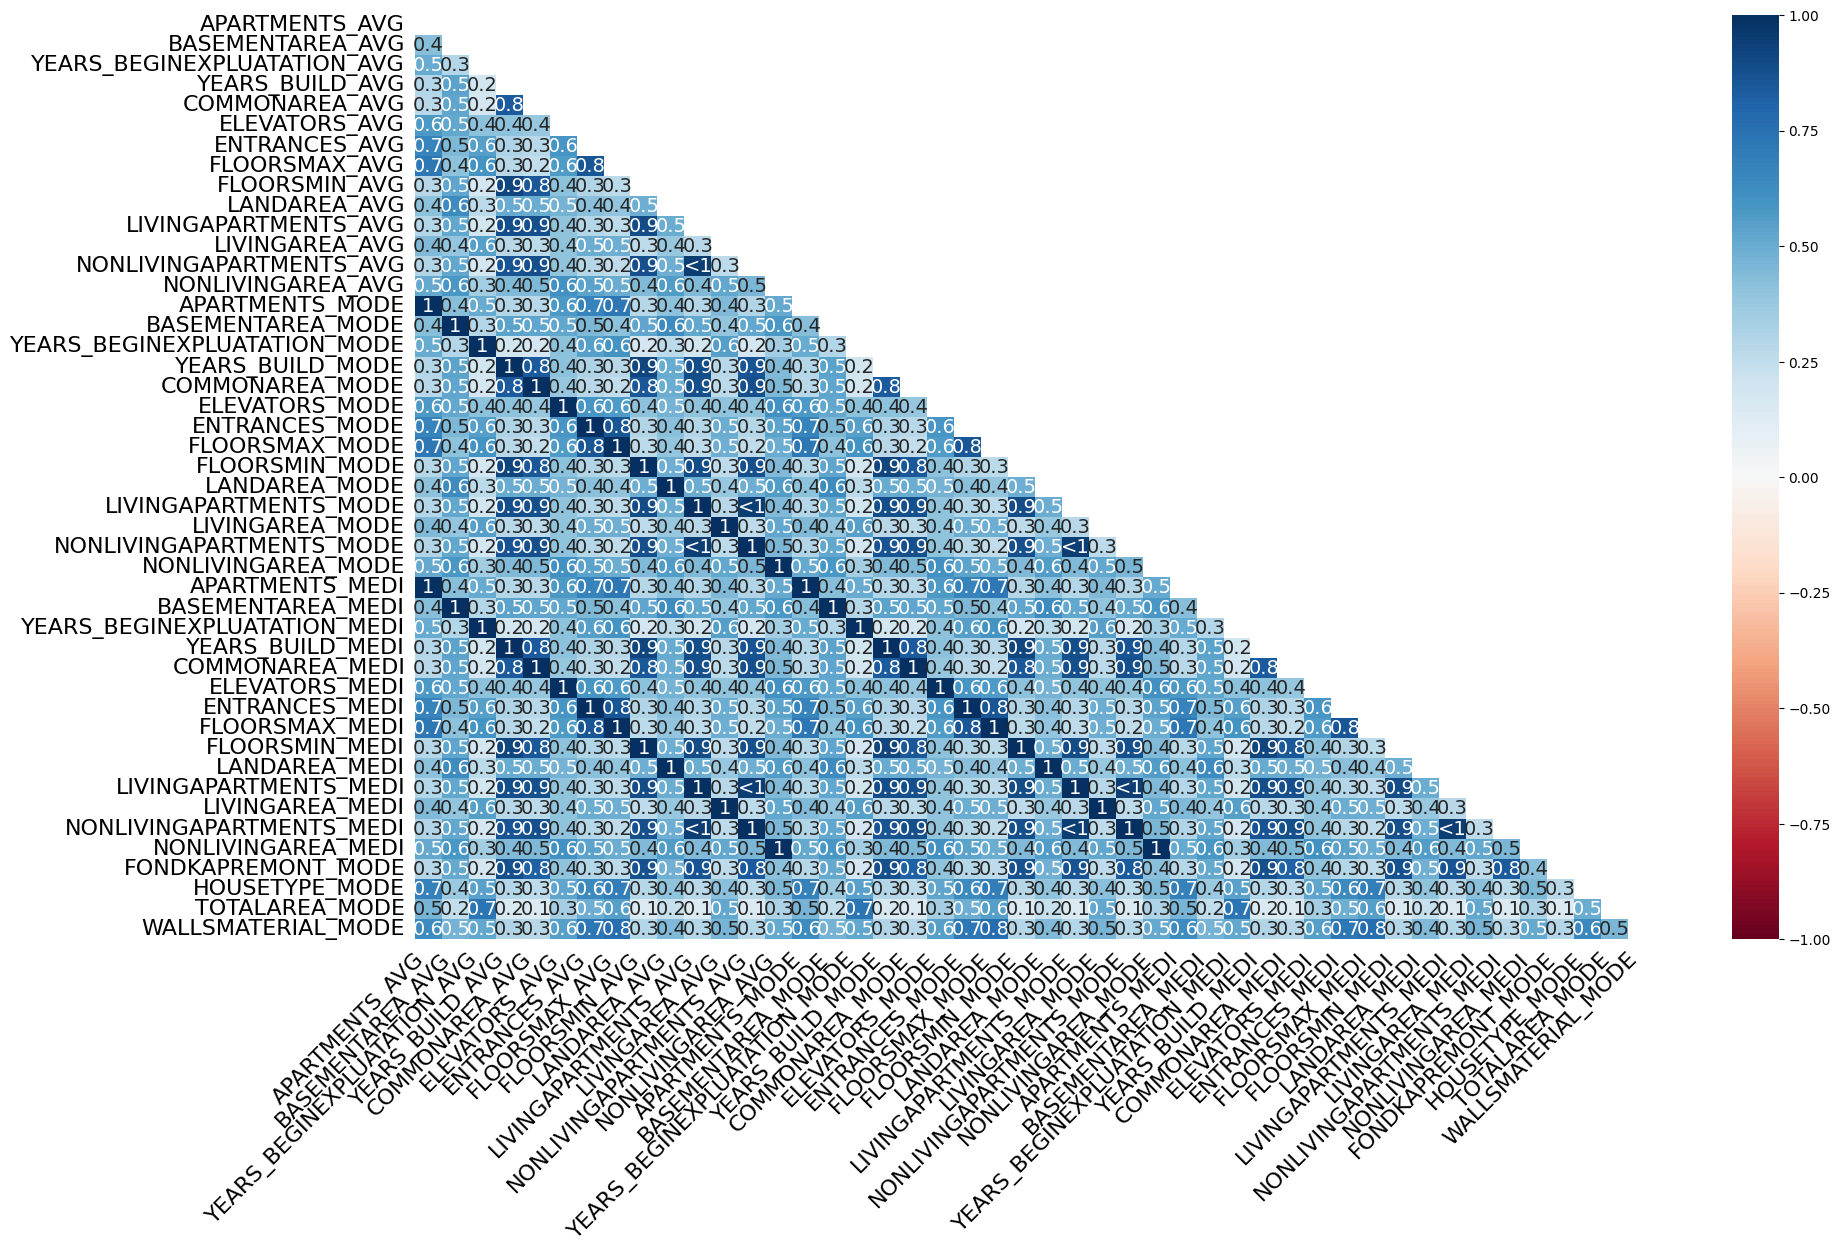

In [72]:
%matplotlib inline
missingno.heatmap(df_abitazione)

Vista la forte correlazione ha senso tenenere in considerazione unicamente le variabili AVG

In [73]:
df_vars_abitazione = data_descriptions[(data_descriptions['Unnamed: 0'] >= 47) & (data_descriptions['Unnamed: 0'] <= 60)]
vars_abitazione = df_vars_abitazione['Row'].to_list()
df_abitazione = df[vars_abitazione]
print(len(df_abitazione[df_abitazione.isna().all(axis=1)]))
df_abitazione = df_abitazione[df_abitazione.notna().any(axis=1)]

148810


<AxesSubplot: >

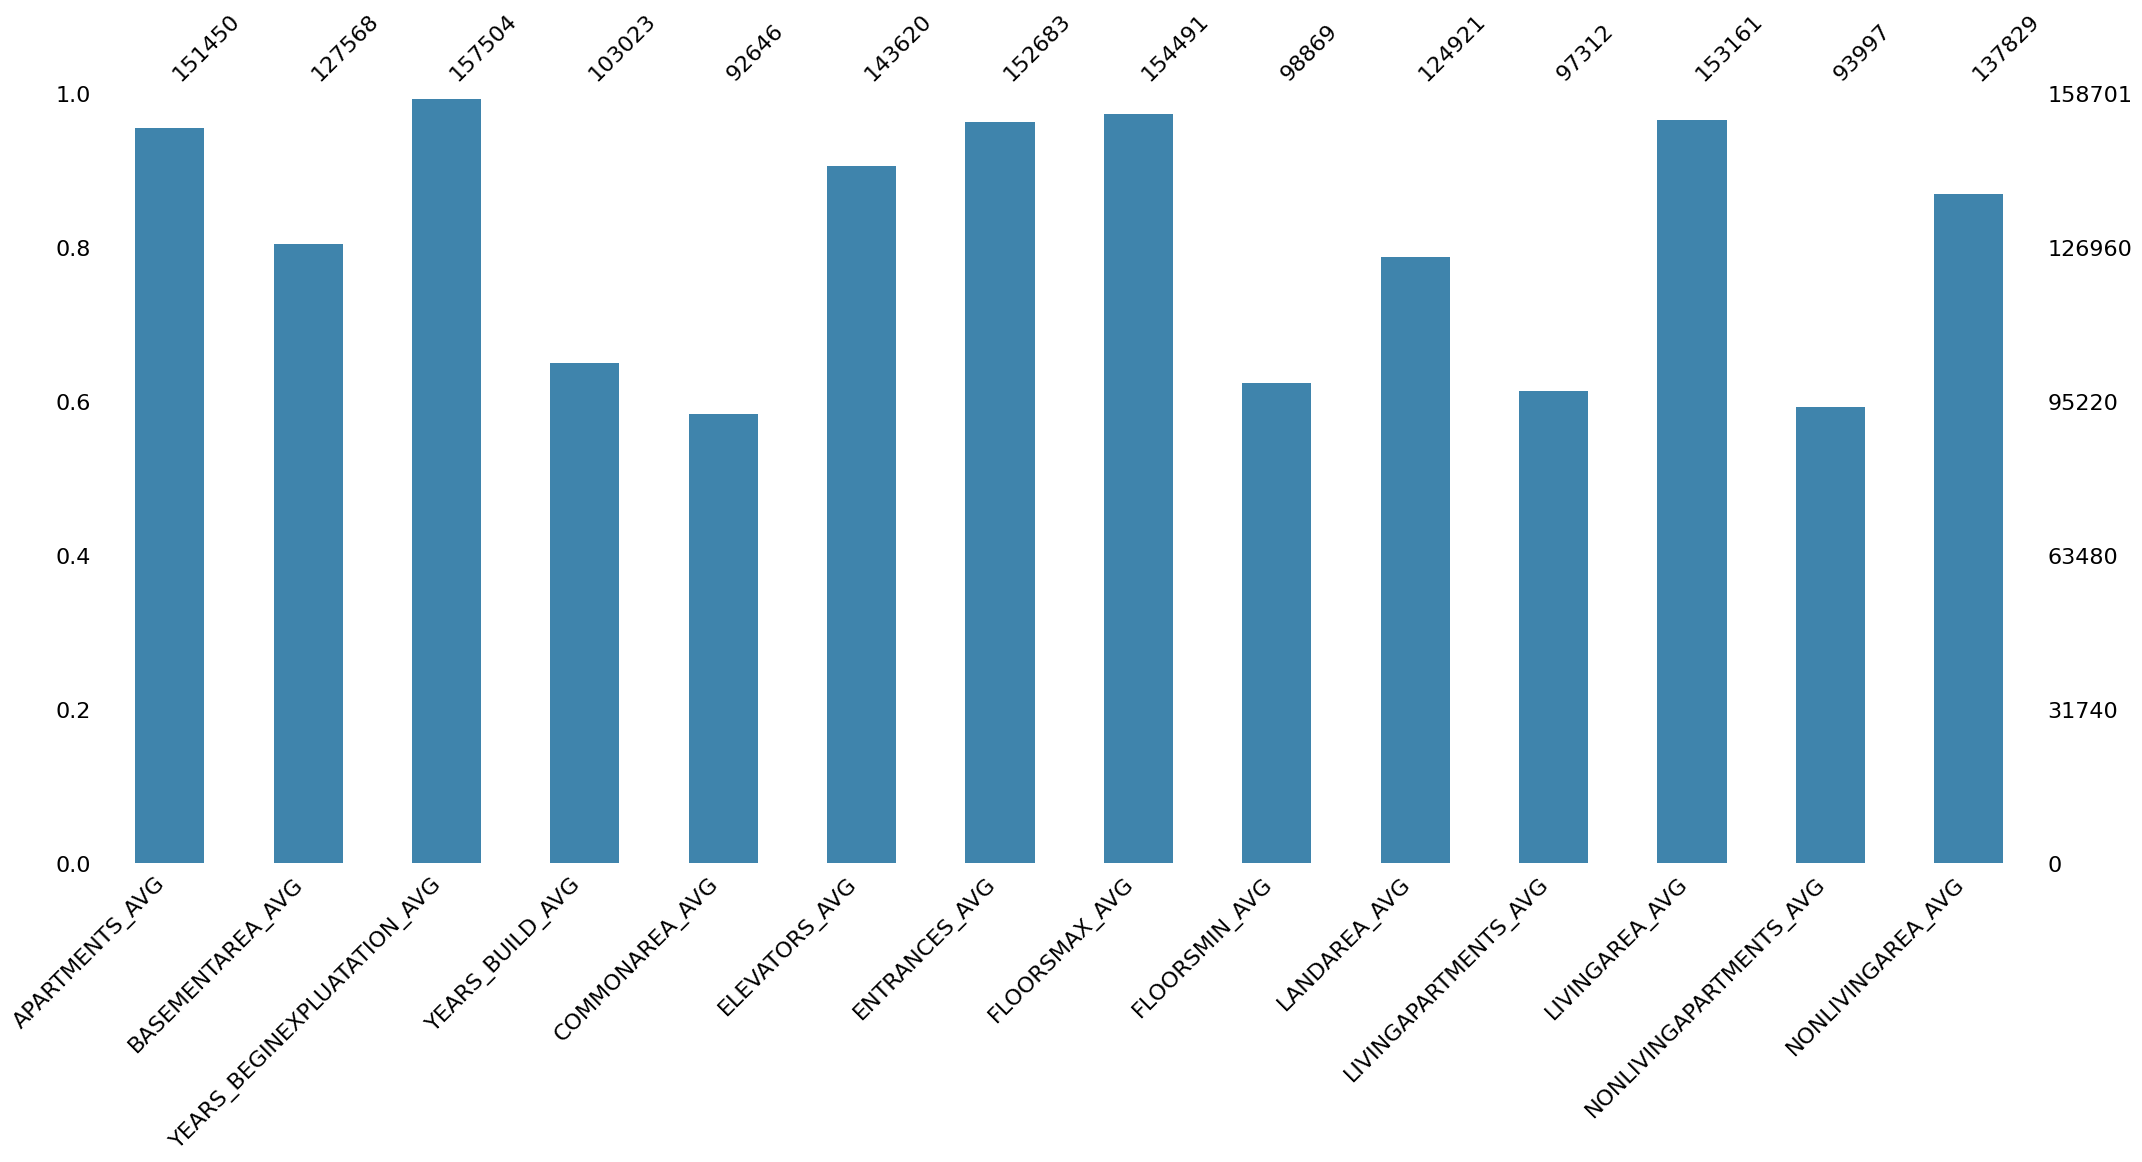

In [74]:
%matplotlib inline
missingno.bar(df_abitazione, color=(63/255,132/255,172/255))

<AxesSubplot: >

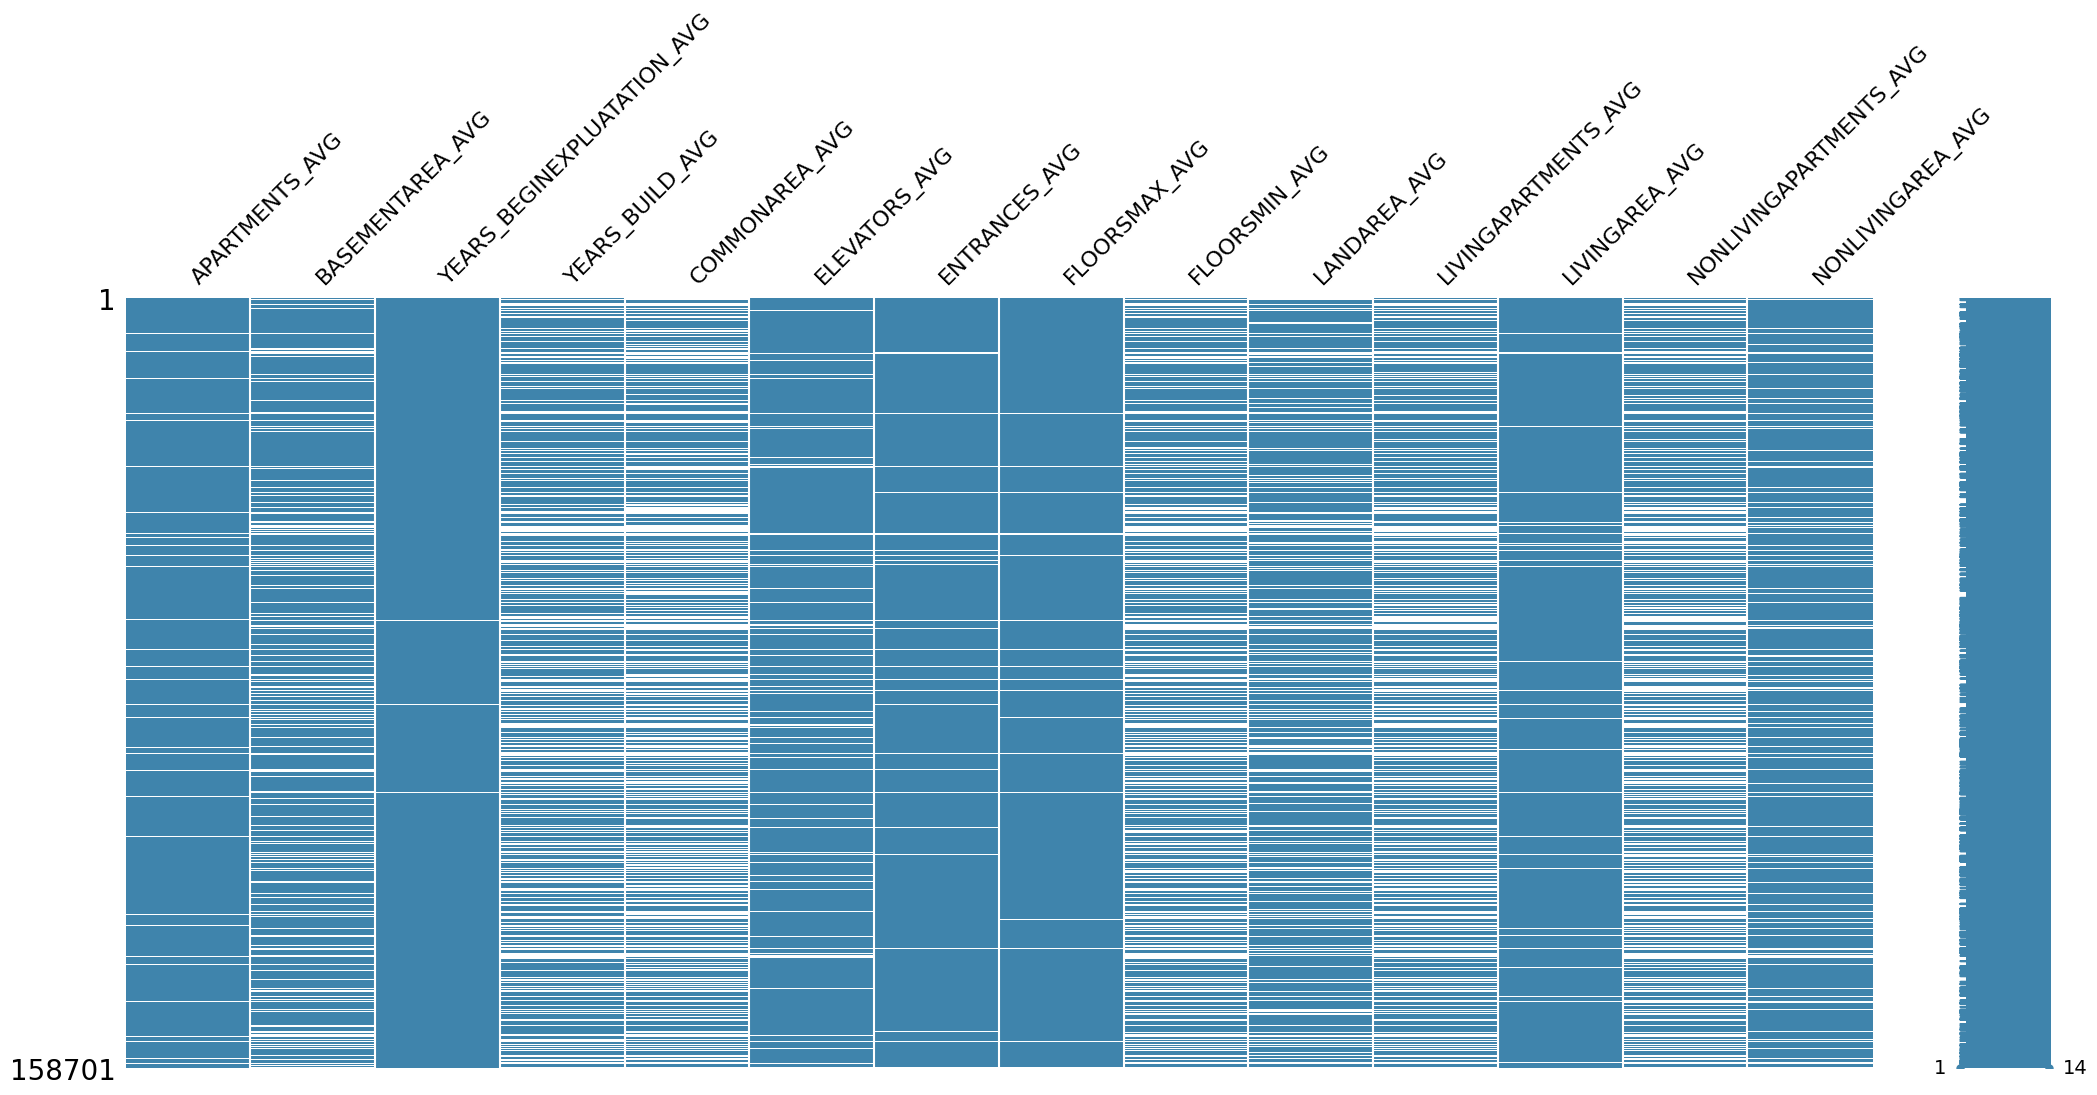

In [75]:
%matplotlib inline
missingno.matrix(df_abitazione, color=(63/255,132/255,172/255))

<AxesSubplot: >

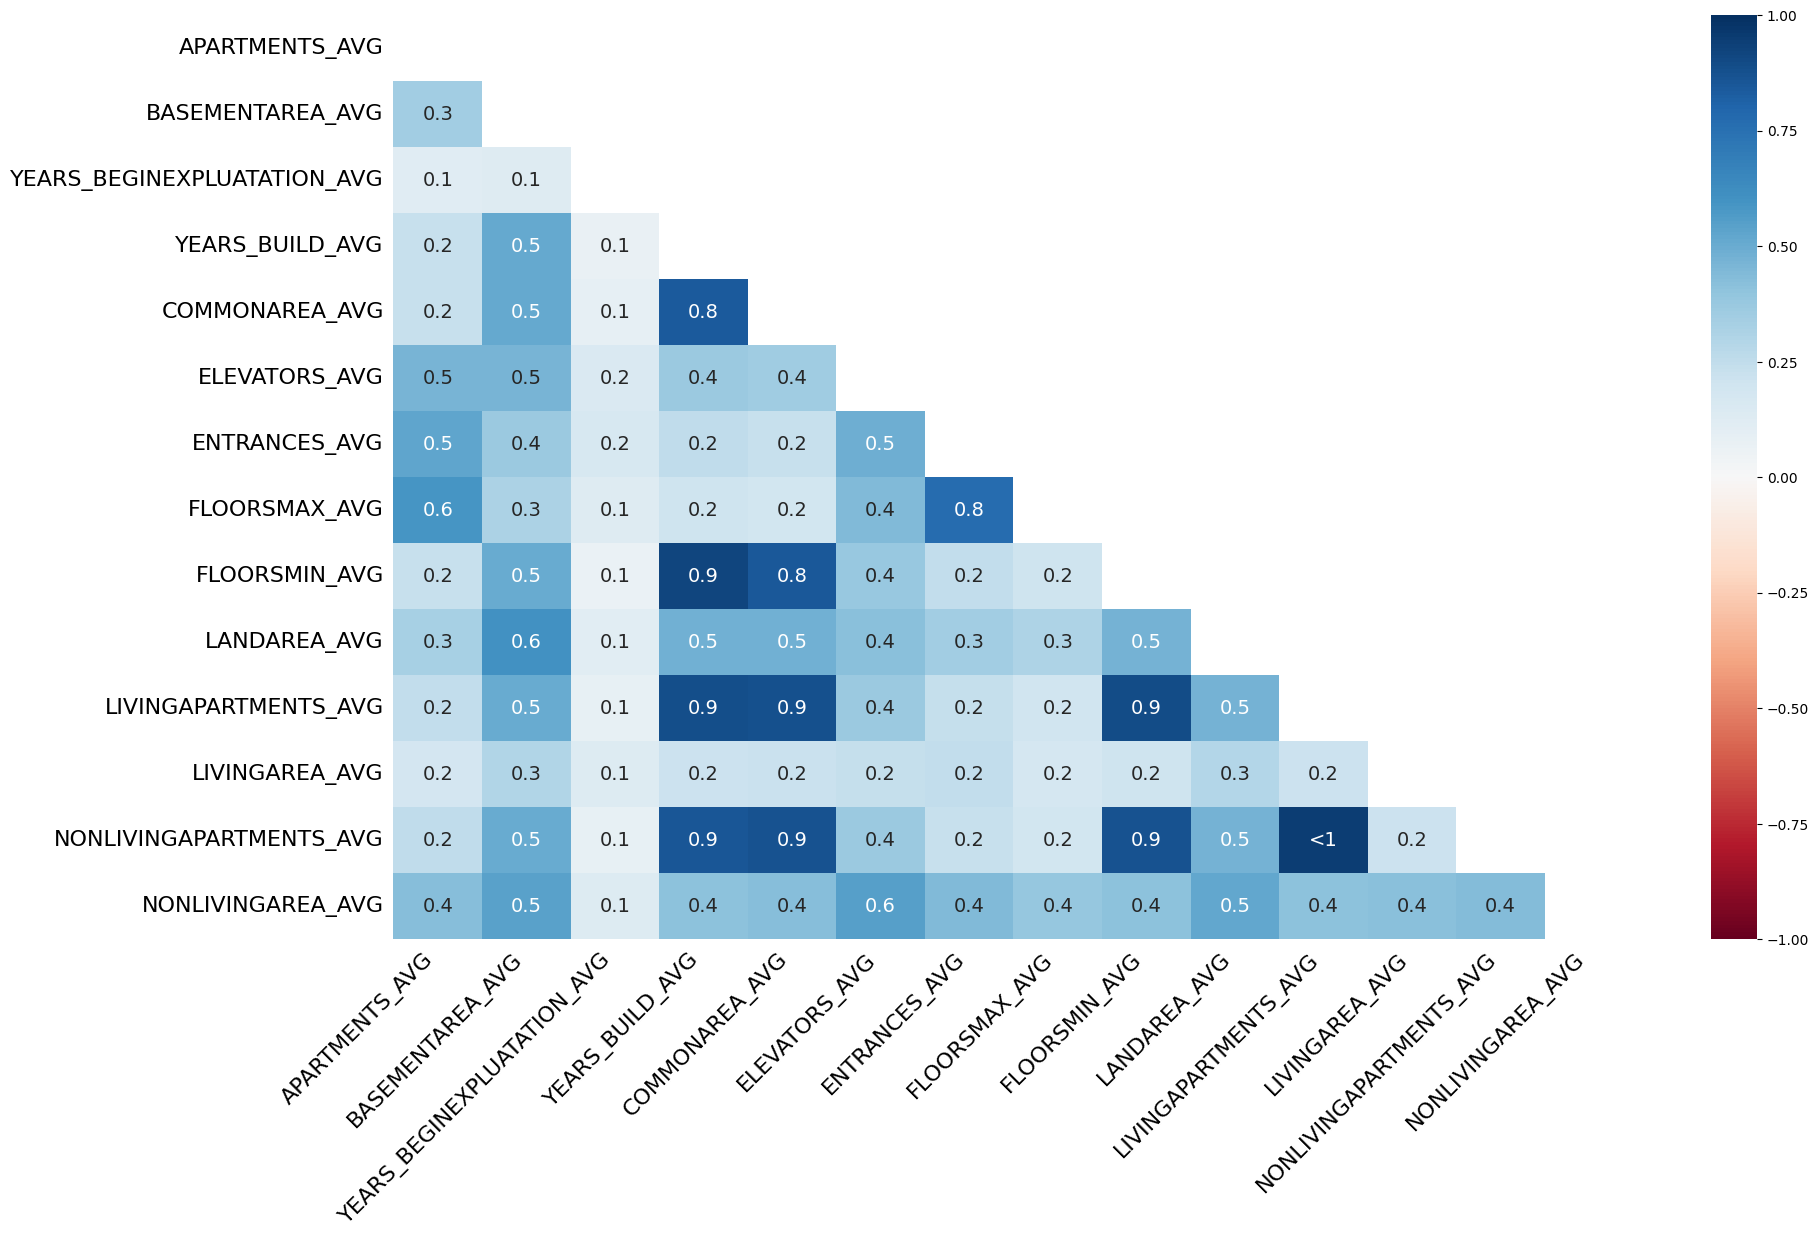

In [76]:
%matplotlib inline
missingno.heatmap(df_abitazione)

<AxesSubplot: ylabel='Count'>

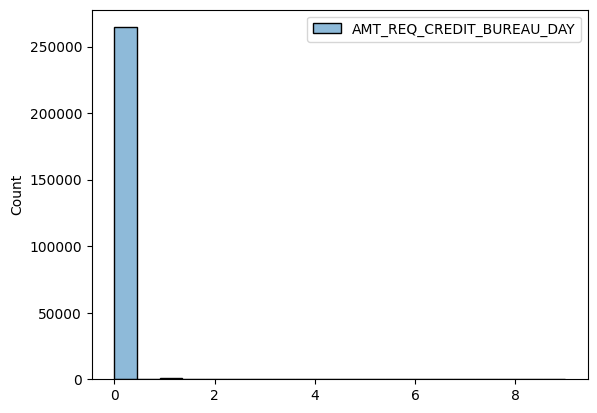

In [77]:
sns.histplot(df[['AMT_REQ_CREDIT_BUREAU_DAY']])

<AxesSubplot: xlabel='AMT_REQ_CREDIT_BUREAU_HOUR', ylabel='Count'>

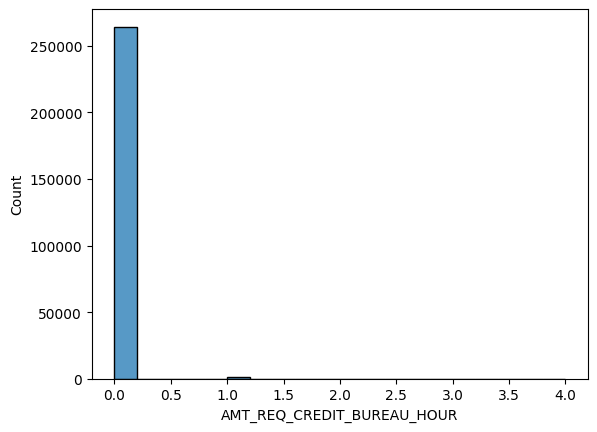

In [78]:
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_HOUR'])

<AxesSubplot: xlabel='AMT_REQ_CREDIT_BUREAU_MON', ylabel='Count'>

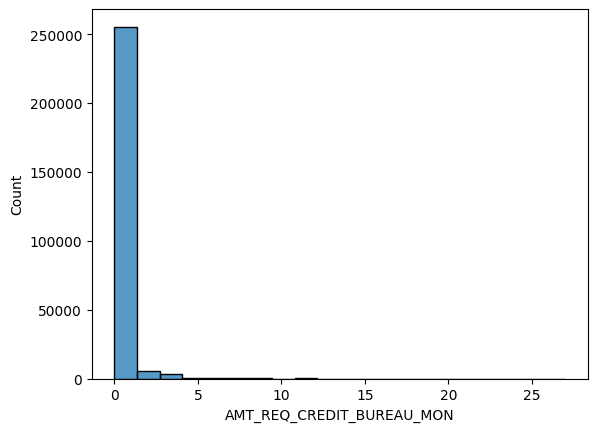

In [79]:
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_MON'])

<AxesSubplot: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR', ylabel='Count'>

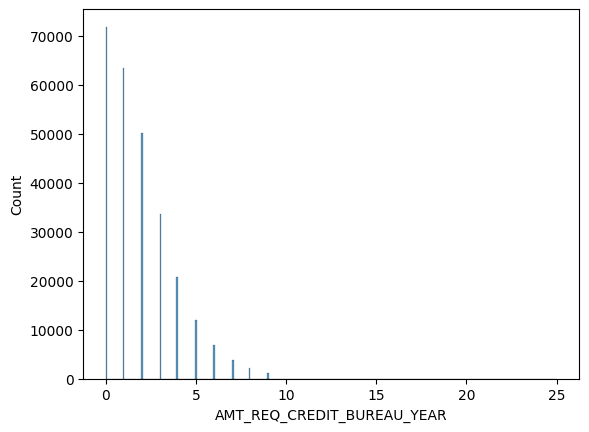

In [80]:
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [81]:
helper_df = df[['OCCUPATION_TYPE']].copy()
helper_df.drop_duplicates(inplace=True)
helper_df

OCCUPATION_TYPE
0                 Laborers
1               Core staff
6              Accountants
7                 Managers
8                      NaN
13                 Drivers
21             Sales staff
25          Cleaning staff
26           Cooking staff
31   Private service staff
47          Medicine staff
57          Security staff
86   High skill tech staff
89    Waiters/barmen staff
95      Low-skill Laborers
111          Realty agents
114            Secretaries
416               IT staff
753               HR staff